# Trabalho Prático 2
**Desenvolvido pelos alunos:** André Góis, Luís Santos, Rafael Balinha.

**Curso**: Inteligência Artificial e Ciência de Dados

Este trabalho também está presente neste [repositório Github](https://github.com/rafabalinha/Assignment-2).

## Índice

1. [Introdução](#Introdução)

2. [Bibliotecas necessárias](#Bibliotecas-necessárias)

3. [Readme](#Readme)

4. [O Problema](#O-Problema)

5. [Passo 1: Exploração de Dados](#Passo-1:-Exploração-de-Dados)

6. [Passo 2: Pré-processamento](#Passo-2:-Pré-processamento)

7. [Passo 3: Modelagem de Dados](#Passo-3:-Modelagem-de-Dados)

8. [Passo 4: Avaliação de Dados](#Passo-4:-Avaliação-de-Dados)

9. [Passo 5: Interpretação de Resultados](#Passo-5:-Interpretação-de-Resultados)

10. [Conclusão](#Conclusão)


## Introdução

[[ Voltar ao topo ]](#Índice)

No âmbito da disciplina de Elementos de Inteligência Artifical e Ciência de Dados, desenvolvemos este projeto que tem o objetivo de abordar um caso real da Ciência de Dados, usando um conjunto de dados do Carcinoma Hepatocelular recolhido no Centro Hospitalar e Universitário de Coimbra.

Iremos desenvolver várias técnicas desde a limpeza de dados e o seu pré-processamento até o uso de aprendizagem supervisionada e a comunicação de resultados.

Por outro lado, a principal finalidade deste projeto é desenvolver um pipeline de aprendizado de máquina capaz de determinar a capacidade de sobrevivência dos pacientes em 1 ano após o diagnóstico (por exemplo, "vive" ou "morre"). 

## Bibliotecas necessárias

[[ Voltar ao topo ]](#Índice)

Caso não tenha Python no seu computador, pode usar [Anaconda Python distribution](https://www.anaconda.com/download) para instalar a maioria dos pacotes Python que precisa pois esta é uma ferramenta gratuita, fornecendo um processo de instalação simples, sendo desta forma muito usada para Ciência de Dados e Machine Learning.

Este notebook usa vários pacotes Python que vêm inicialmente com a distruibuição Anaconda Python. As principais bibliotecas que usamos são:

* **NumPy**: Fornece uma estrutura de matriz multidimensional rápida e funções matemáticas auxiliares.
* **pandas**: Fornece uma estrutura DataFrame para armazenar dados na memória e trabalhar com eles de forma fácil e eficiente.
* **scikit-learn**: O pacote essencial de Machine Learning em Python, fornecendo algoritmos de classificação, regressão, clustering e redução de dimensionalidade.
* **matplotlib**: Biblioteca básica de criação de gráficos e visualizações estáticas e interativas em Python.
* **Seaborn**: Biblioteca avançada de criação de gráficos estatísticos atraentes e informativos.

Para ter a certeza de que você tem todos os pacotes que você precisa, instale-os com `conda`, usando o terminal:

    conda install numpy pandas scikit-learn matplotlib seaborn
    
    conda install -c conda-forge watermark

`conda` deve perdir-lhe para atualizar alguns deles, caso não possua a versão mais recente. Permitam-lhe que o faça.

**Nota:** Este notebook deve ser executado no âmbito da distribuição Anaconda Python. Fora deste contexto não será fornecido apoio para a execução do programa.

## Readme

[[ Voltar ao topo ]](#Índice)

Visite [repository README file](https://github.com/rafabalinha/Assignment-2/blob/main/README.md) para saber como utilizar e usar o programa.

## O Problema

[[ Voltar ao topo ]](#Índice)

A medicina moderna depende cada vez mais de dados para prever resultados e tomar decisões informadas, tendo este projeto implicações significativas para o tratamento e planejamento do paciente.

>Questão principal do projeto.

A questão principal que estamos tentando responder é: “Dado um conjunto de dados sobre um paciente no momento do diagnóstico, esse paciente sobreviverá um ano após o diagnóstico?” Esta é uma pergunta binária - as respostas possíveis são “sobrevive” ou “morre”.

>Métrica de sucesso.

A métrica de sucesso para este projeto é a acurácia da previsão. Queremos minimizar tanto os falsos positivos (prever que um paciente sobreviverá quando não sobreviverá) quanto os falsos negativos (prever que um paciente morrerá quando sobreviverá). Ambos os tipos de erros têm implicações significativas na vida real e devem ser minimizados.

>Disponibilidade dos dados.

Precisamos de dados abrangentes e precisos sobre os pacientes no momento do diagnóstico, incluindo idade, sexo, histórico médico, resultados de exames, tipo e estágio do câncer, entre outros. Se esses dados estiverem disponíveis e forem de alta qualidade, acreditamos que a questão pode ser respondida com um grau razoável de precisão.

Agora que refletimos sobre alguns aspetos importantes para o desenvolvimento do projeto, vamos começar a trabalhar nele...

## Passo 1: Exploração de Dados


[[ Voltar ao topo ]](#Índice)

Primeiro, vamos carregar o conjunto de dados:

In [67]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
import warnings

# Omitir Warnings
warnings.filterwarnings('ignore')

# Carregar o conjunto de dados
dados = pd.read_csv(r"C:\Users\Rafael\Downloads\hcc_dataset.csv")

Agora que já temos os dados, vamos analisá-los inicialmente de uma forma superficial.

In [68]:
# Visualizar as primeiras linhas do conjunto de dados
print(dados.head())

   Gender Symptoms Alcohol HBsAg HBeAg HBcAb HCVAb Cirrhosis Endemic Smoking  \
0    Male       No     Yes    No    No    No    No       Yes      No     Yes   
1  Female        ?      No    No    No    No   Yes       Yes       ?       ?   
2    Male       No     Yes   Yes    No   Yes    No       Yes      No     Yes   
3    Male      Yes     Yes    No    No    No    No       Yes      No     Yes   
4    Male      Yes     Yes   Yes    No   Yes    No       Yes      No     Yes   

   ...  ALP   TP Creatinine Nodules Major_Dim Dir_Bil Iron Sat Ferritin  Class  
0  ...  150  7.1        0.7       1       3.5     0.5    ?   ?        ?  Lives  
1  ...    ?    ?          ?       1       1.8       ?    ?   ?        ?  Lives  
2  ...  109    7        2.1       5        13     0.1   28   6       16  Lives  
3  ...  174  8.1       1.11       2      15.7     0.2    ?   ?        ?   Dies  
4  ...  109  6.9        1.8       1         9       ?   59  15       22  Lives  

[5 rows x 50 columns]


In [69]:
# Obter informações sobre os tipos de dados e a contagem de valores não ausentes
print(dados.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 50 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Gender          165 non-null    object
 1   Symptoms        165 non-null    object
 2   Alcohol         165 non-null    object
 3   HBsAg           165 non-null    object
 4   HBeAg           165 non-null    object
 5   HBcAb           165 non-null    object
 6   HCVAb           165 non-null    object
 7   Cirrhosis       165 non-null    object
 8   Endemic         165 non-null    object
 9   Smoking         165 non-null    object
 10  Diabetes        165 non-null    object
 11  Obesity         165 non-null    object
 12  Hemochro        165 non-null    object
 13  AHT             165 non-null    object
 14  CRI             165 non-null    object
 15  HIV             165 non-null    object
 16  NASH            165 non-null    object
 17  Varices         165 non-null    object
 18  Spleno    

In [70]:
# Resumo estatístico dos dados numéricos
print(dados.describe())

              Age
count  165.000000
mean    64.690909
std     13.319534
min     20.000000
25%     57.000000
50%     66.000000
75%     74.000000
max     93.000000


In [71]:
# Verificar a contagem de valores na classe alvo
print(dados['Class'].value_counts())

Class
Lives    102
Dies      63
Name: count, dtype: int64


Fazendo uma análise dos valores ausentes mais a fundo, temos que:

In [72]:
# Contagem de valores ausentes por coluna
missing_values = dados.isnull().sum()
print("Valores ausentes por coluna:")
print(missing_values)

Valores ausentes por coluna:
Gender              0
Symptoms            0
Alcohol             0
HBsAg               0
HBeAg               0
HBcAb               0
HCVAb               0
Cirrhosis           0
Endemic             0
Smoking             0
Diabetes            0
Obesity             0
Hemochro            0
AHT                 0
CRI                 0
HIV                 0
NASH                0
Varices             0
Spleno              0
PHT                 0
PVT                 0
Metastasis          0
Hallmark            0
Age                 0
Grams_day           0
Packs_year          0
PS                  0
Encephalopathy    142
Ascites           109
INR                 0
AFP                 0
Hemoglobin          0
MCV                 0
Leucocytes          0
Platelets           0
 Albumin            0
Total_Bil           0
ALT                 0
AST                 0
GGT                 0
ALP                 0
TP                  0
Creatinine          0
Nodules             0
Maj

Nesta etapa já podemos tirar algumas conclusões da forma como os dados estão distribuidos no Dataset. 

Desta forma, podemos verificar que quando executamos a primeira linha(.head()) esta mostra-nos a parte inicial(primeiras 5 linhas) do conjunto de dados, e verificamos que em muitos espaços temos '?', que nos indica valores que não foram dados.

Por outro lado, a variável missing_values diz-nos que só duas colunas possuem valores ausentes, o que seria impossível pois bastaria apenas fazer uma breve e simples análise do output da primeira linha.

Assim, temos de fazer com que o computador trate '?' como um valor ausente, para evitar futuros erros e permitir uma melhor análise dos dados e resultados com maior credibilidade e sucesso. Sendo assim:

In [73]:
# Substituir '?' por NaN em todo o DataFrame
dados.replace('?', np.nan, inplace=True)

Após a substituição, vamos verificar a presença dos valores ausentes corretamente:

In [74]:
# Contagem de valores ausentes por coluna
missing_values = dados.isnull().sum()
print("Valores ausentes por coluna:")
print(missing_values)

Valores ausentes por coluna:
Gender              0
Symptoms           18
Alcohol             0
HBsAg              17
HBeAg              39
HBcAb              24
HCVAb               9
Cirrhosis           0
Endemic            39
Smoking            41
Diabetes            3
Obesity            10
Hemochro           23
AHT                 3
CRI                 2
HIV                14
NASH               22
Varices            52
Spleno             15
PHT                11
PVT                 3
Metastasis          4
Hallmark            2
Age                 0
Grams_day          48
Packs_year         53
PS                  0
Encephalopathy    143
Ascites           111
INR                 4
AFP                 8
Hemoglobin          3
MCV                 3
Leucocytes          3
Platelets           3
 Albumin            6
Total_Bil           5
ALT                 4
AST                 3
GGT                 3
ALP                 3
TP                 11
Creatinine          7
Nodules             2
Maj

Agora podemos tomar outra visão destes valores e para isso vamos os tentar analisar graficamente:

#### Distribuição de valores ausentes

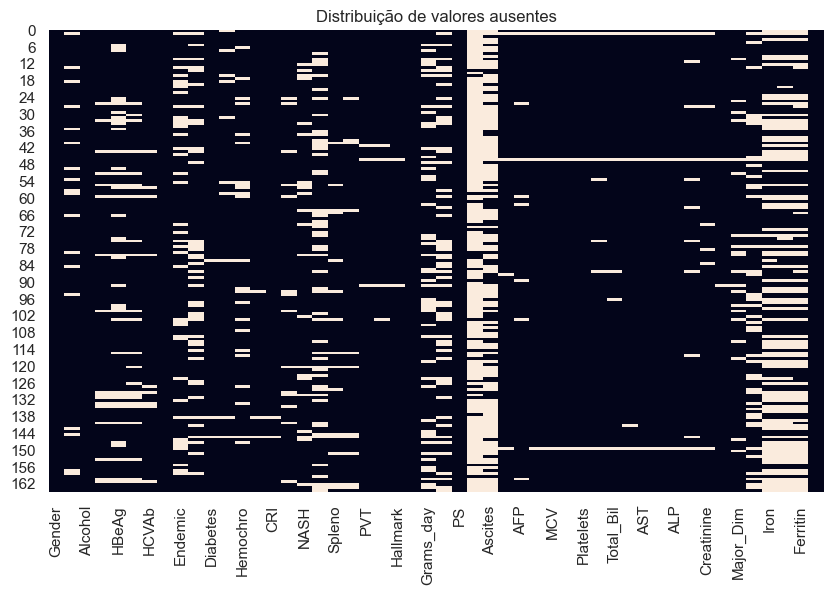

In [75]:
# Visualização da distribuição de valores ausentes
plt.figure(figsize=(10, 6))
sns.heatmap(dados.isnull(), cbar=False)
plt.title('Distribuição de valores ausentes')
plt.show()

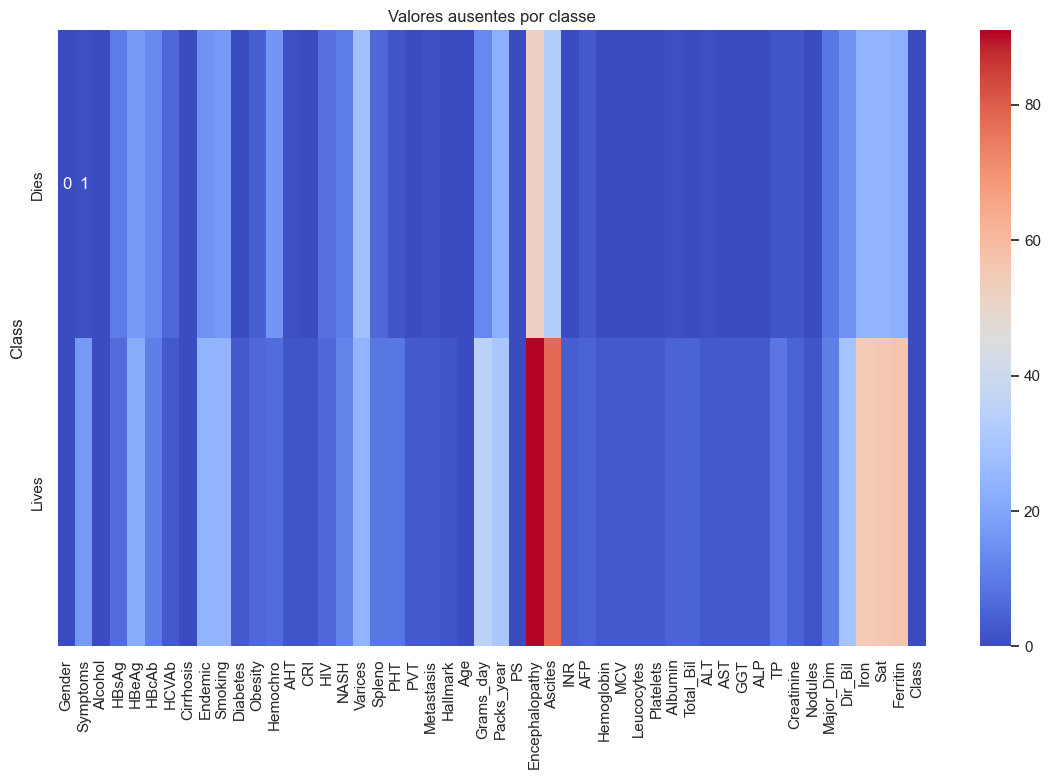

In [76]:
# Análise de padrões nos valores ausentes (em relação a uma variável alvo)
plt.figure(figsize=(14, 8))
sns.heatmap(dados.groupby('Class').apply(lambda x: x.isnull().sum()), annot=True, cmap='coolwarm')
plt.title('Valores ausentes por classe')
plt.show()

Já que já temos uma ideia básica dos dados, vamos começar a visualizar algumas distribuições e relações entre variáveis:

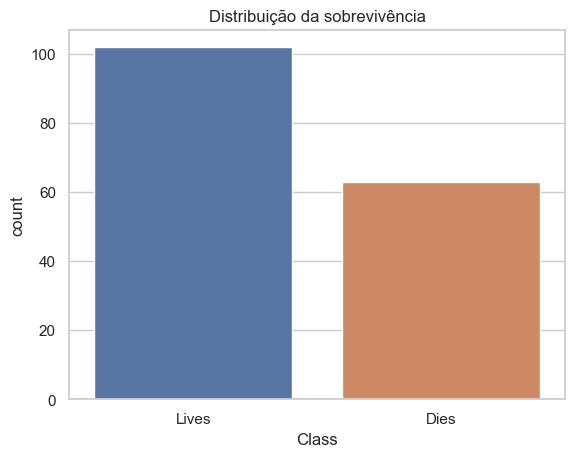

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribuição da variável de destino 
sns.countplot(x='Class', data=dados)
plt.title('Distribuição da sobrevivência')
plt.show()

In [78]:
"""# Gráfico de correlação entre as características numéricas
sns.heatmap(dados.corr(), annot=True, cmap='coolwarm')
plt.title('Correlação entre características numéricas')
plt.show()"""

"# Gráfico de correlação entre as características numéricas\nsns.heatmap(dados.corr(), annot=True, cmap='coolwarm')\nplt.title('Correlação entre características numéricas')\nplt.show()"

Como podemos ver, o gráfico anterior dá erro, e isto será explicado posteriormente. No entanto, este encontra-se dentro de aspas triplas para não interferir na execução de todas as células.

Passemos a analisar as variáveis numéricas:

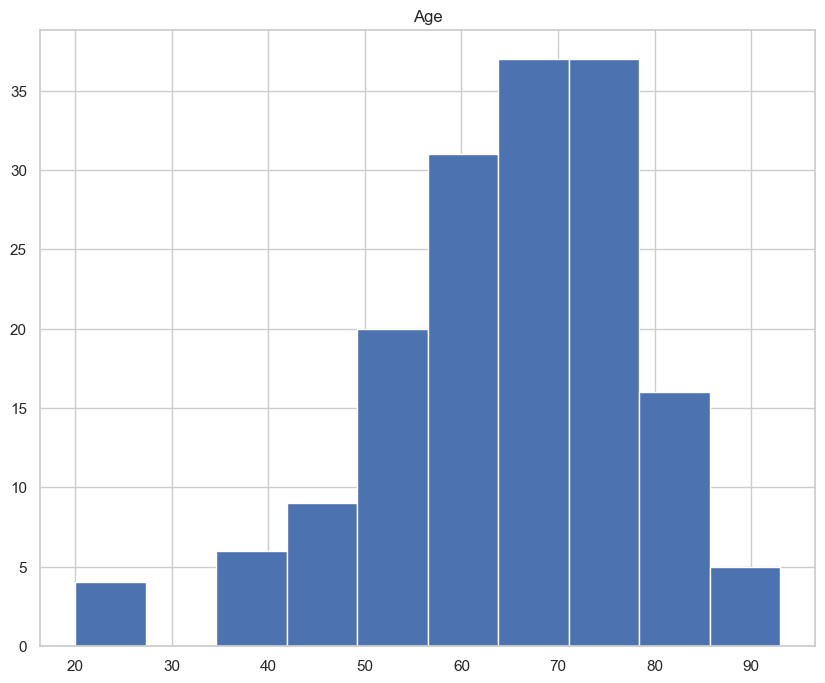

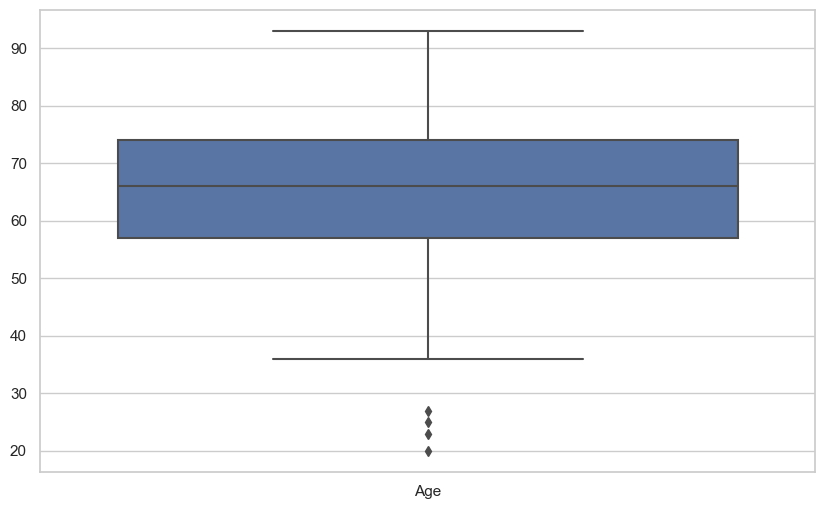

In [79]:
# Histograma para variáveis numéricas
dados.hist(figsize=(10, 8))
plt.show()

# Boxplot para identificar outliers em variáveis numéricas
plt.figure(figsize=(10, 6))
sns.boxplot(data=dados)
plt.show()

Para uma melhor compreensão geral de todas as colunas, vamos explorar cada variável de forma individual para entender a sua distribuição e comportamento:

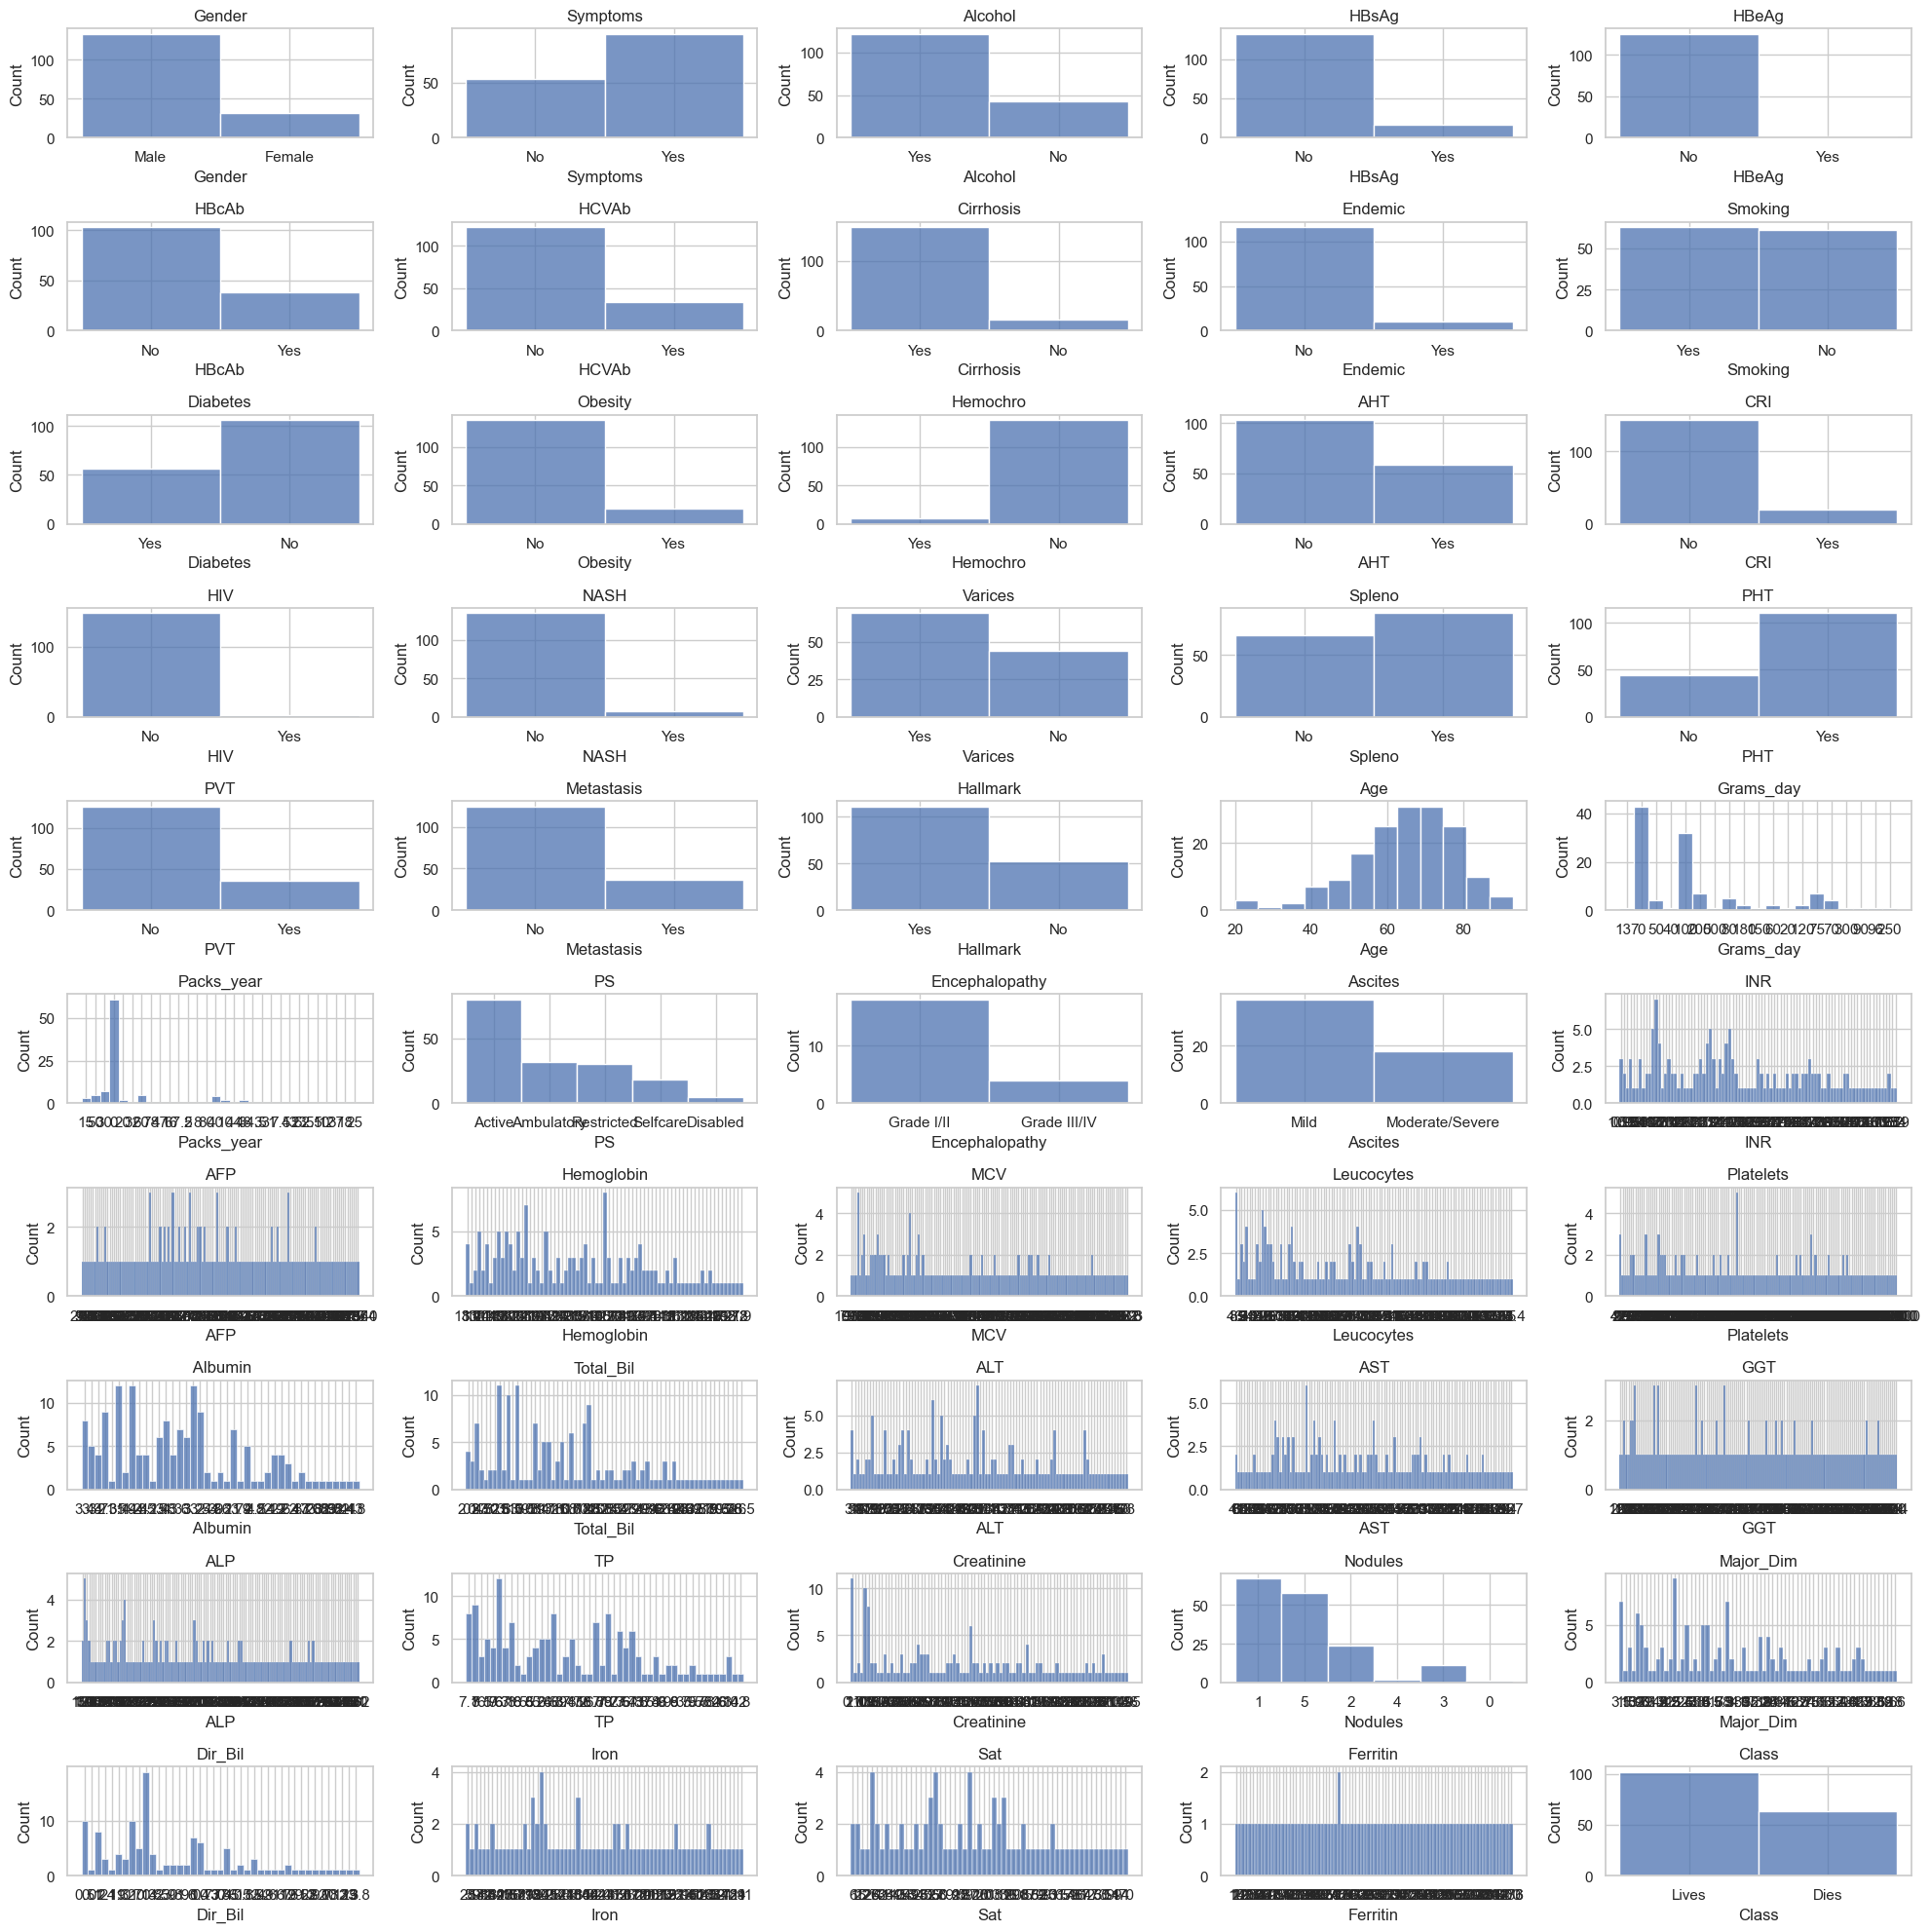

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definir o tamanho da figura e o número de colunas na matriz
fig, axs = plt.subplots(10, 5, figsize=(20, 20))

# Iterar sobre cada coluna e criar um gráfico para ela
for i, col_name in enumerate(dados.columns):
    # Calcular o índice da linha e da coluna para o subplot
    row = i // 5
    col = i % 5
    
    # Criar o gráfico na posição correta na matriz de subplots
    sns.histplot(dados[col_name], ax=axs[row, col])
    axs[row, col].set_title(col_name)  # Adicionar o nome da coluna como título
    
# Ajustar o layout para evitar sobreposição de rótulos
plt.tight_layout()
plt.show()



<Figure size 1200x800 with 0 Axes>

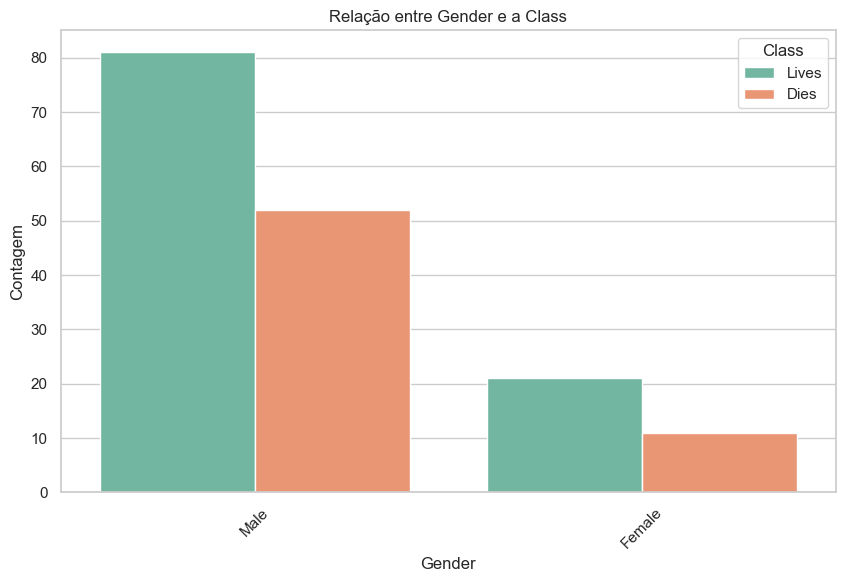

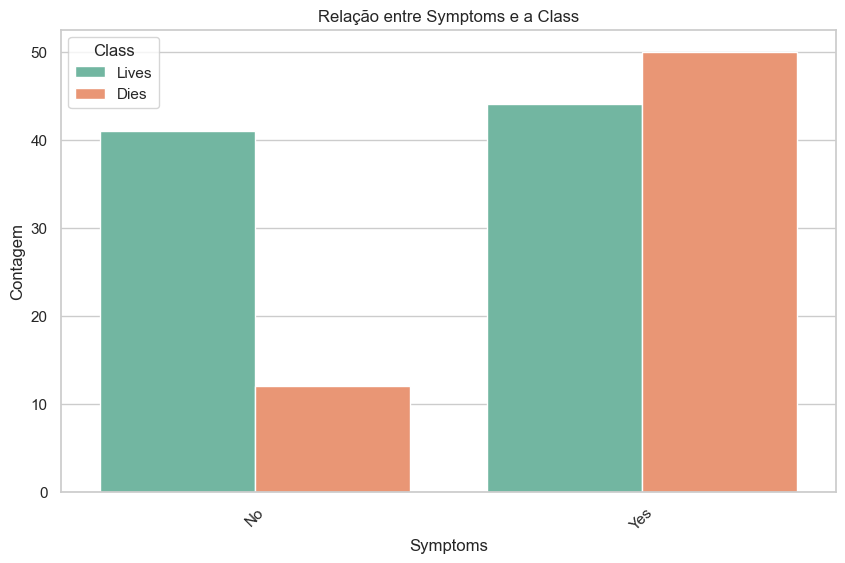

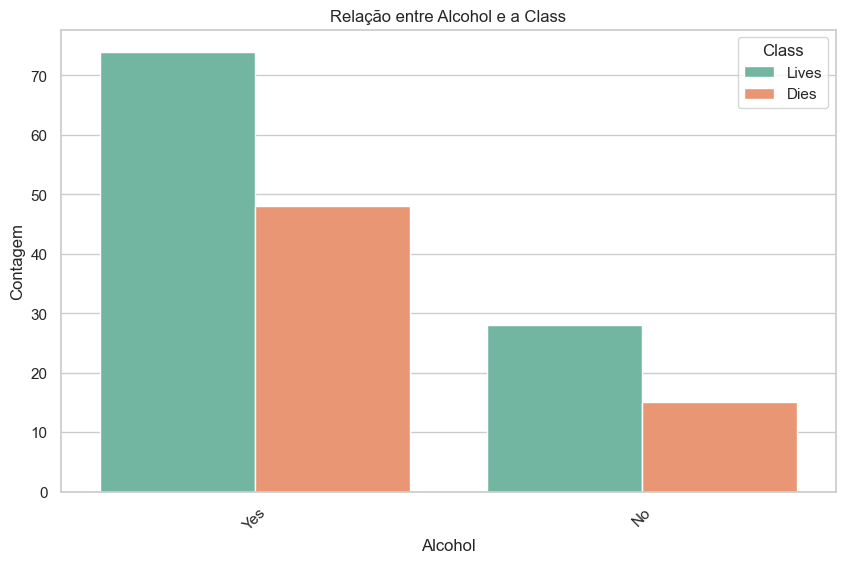

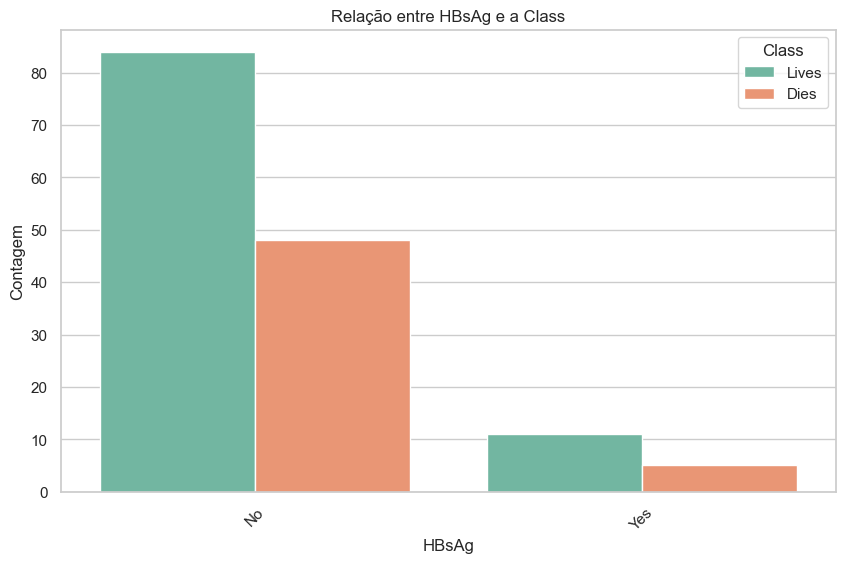

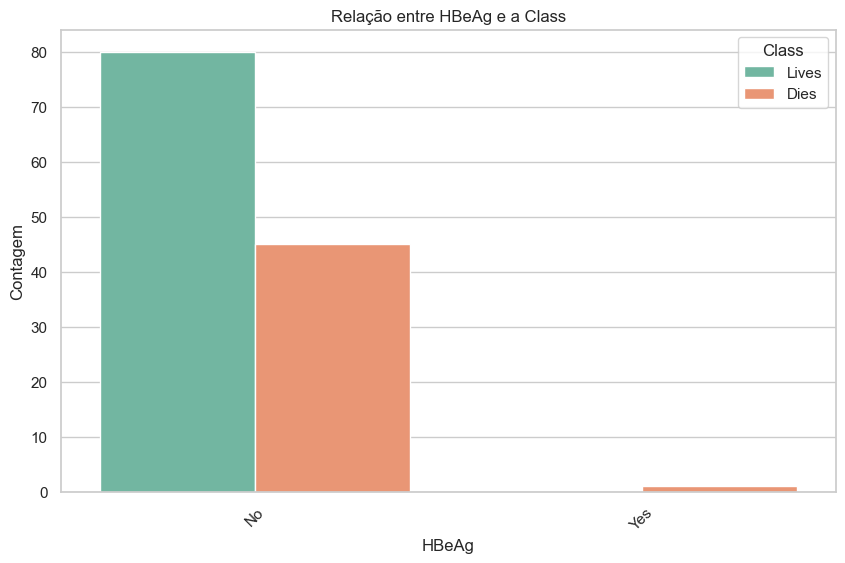

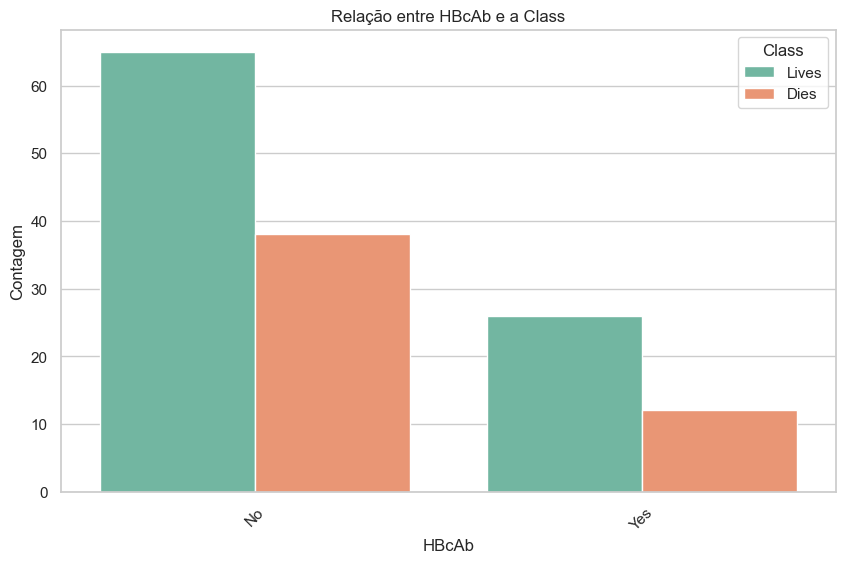

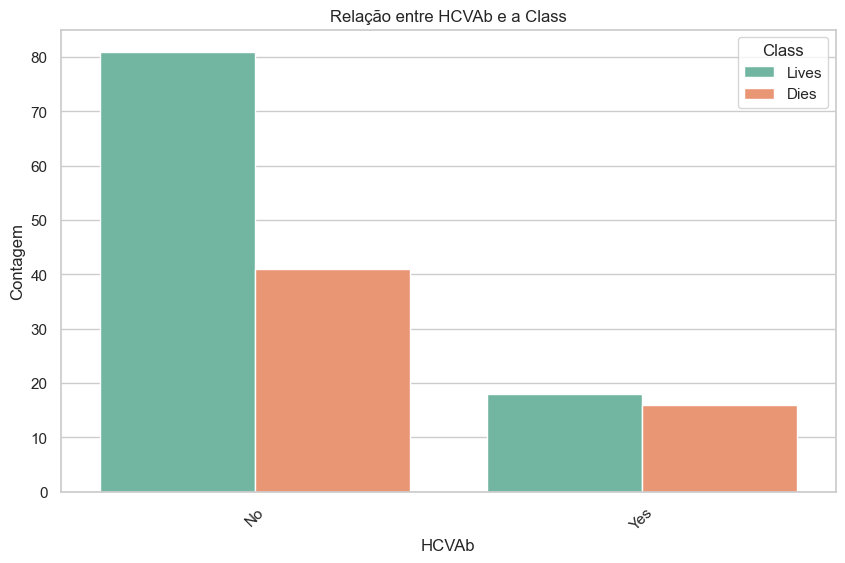

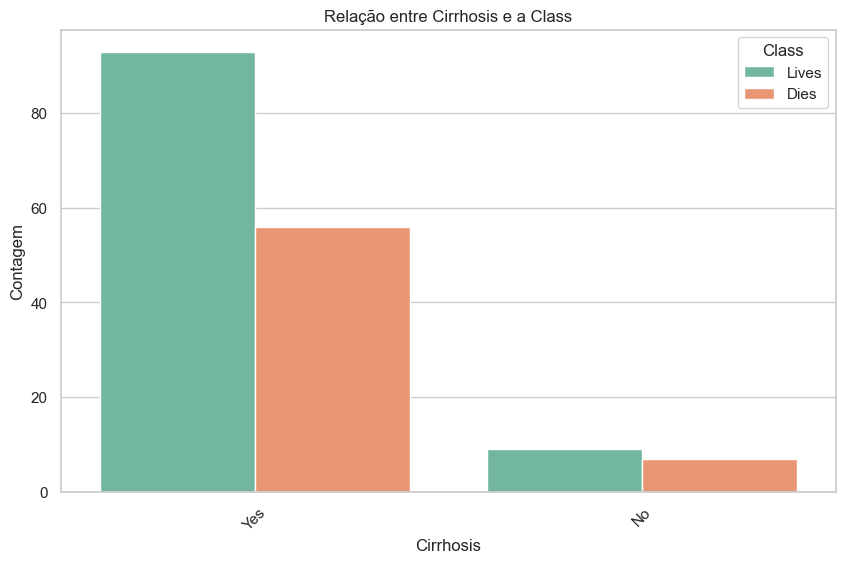

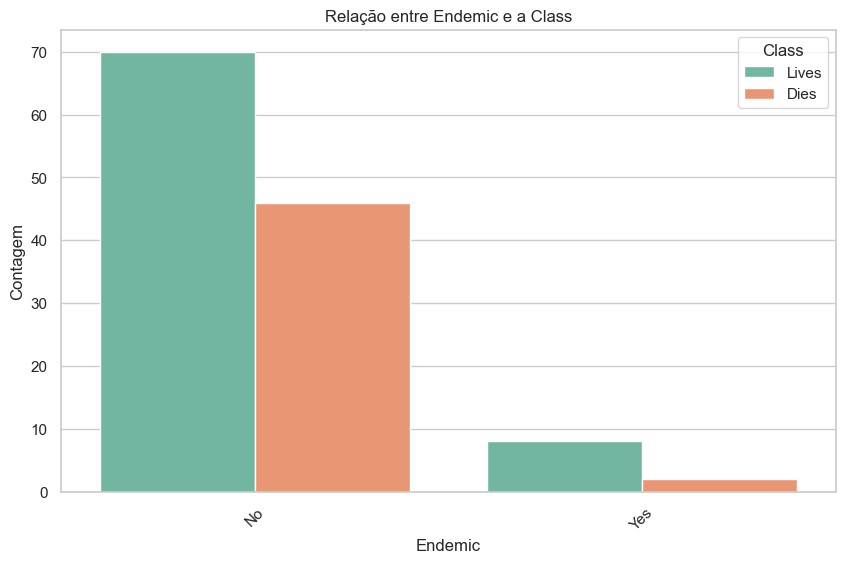

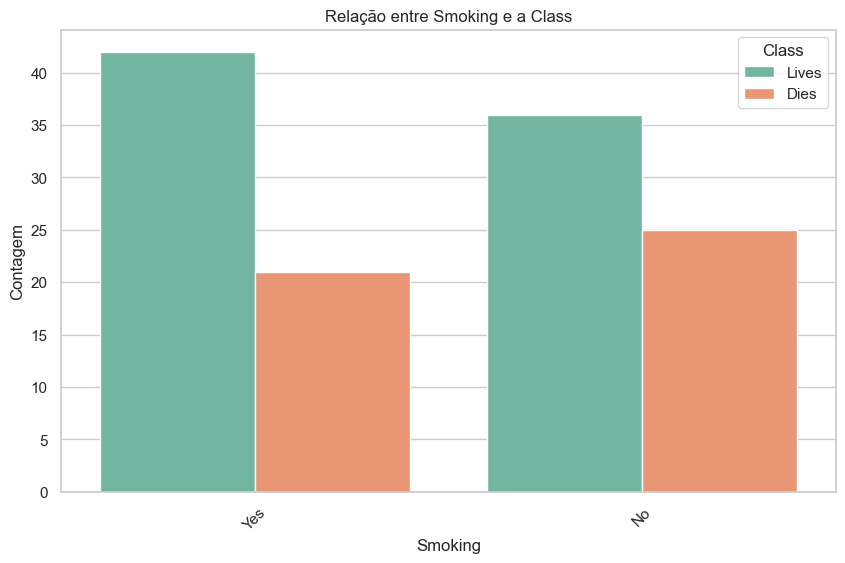

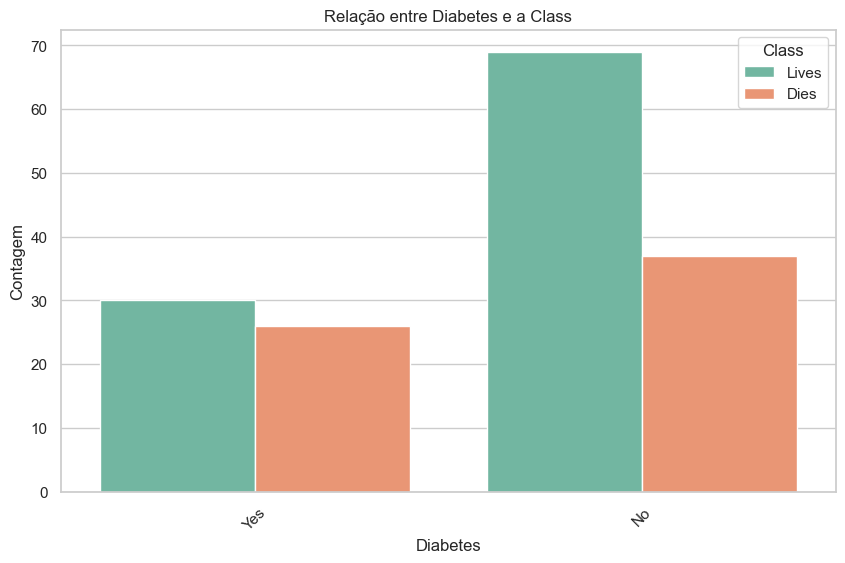

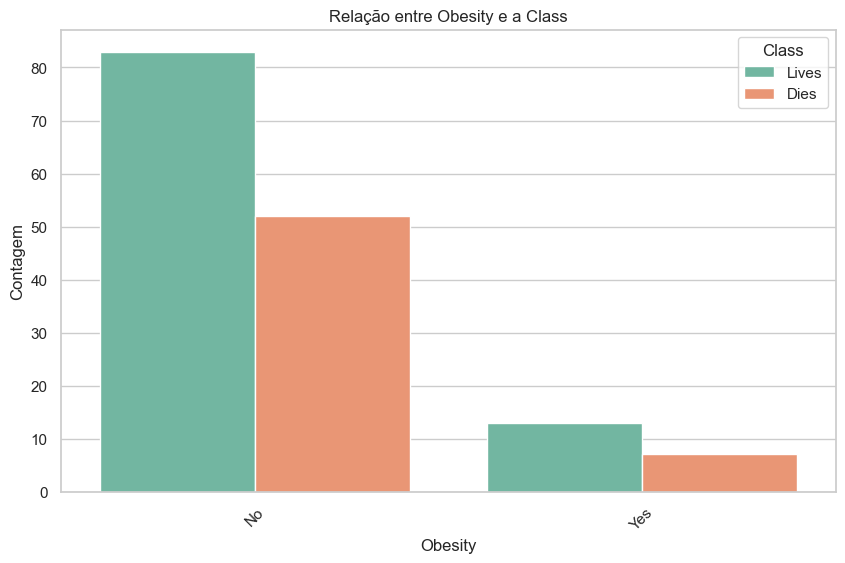

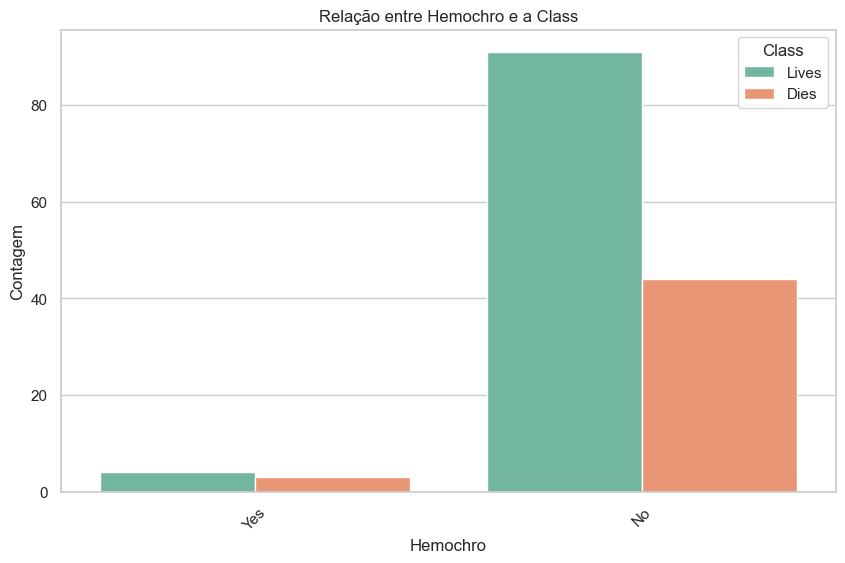

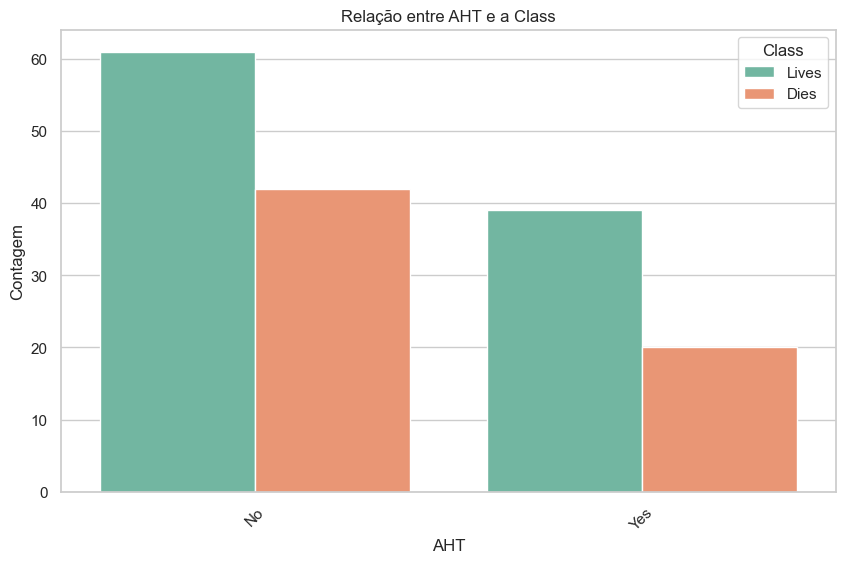

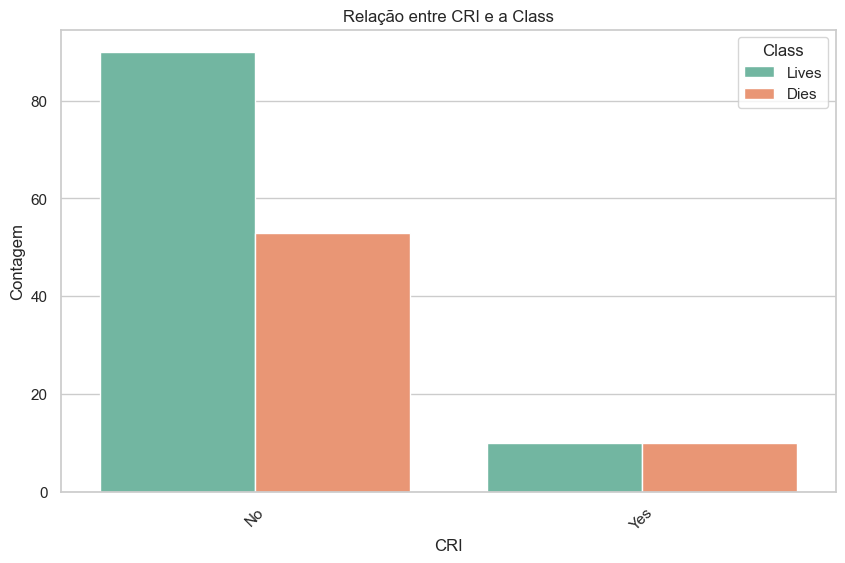

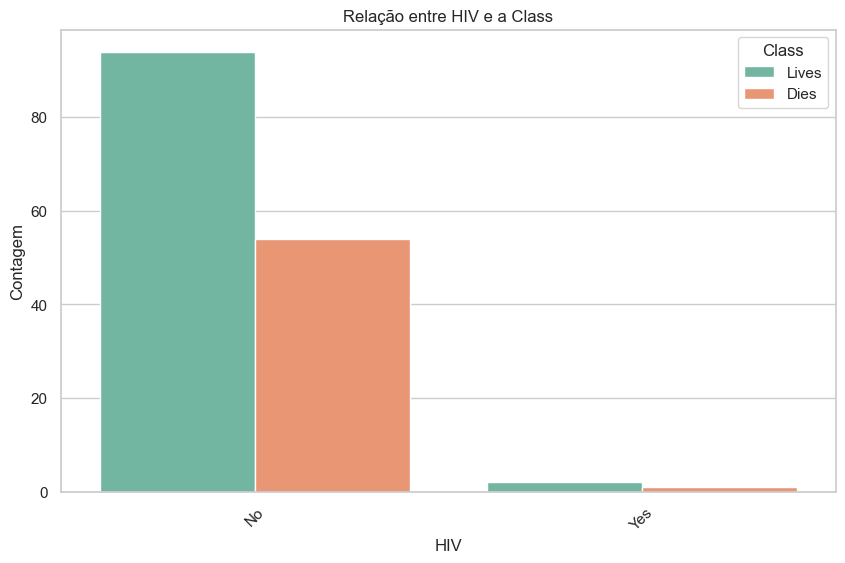

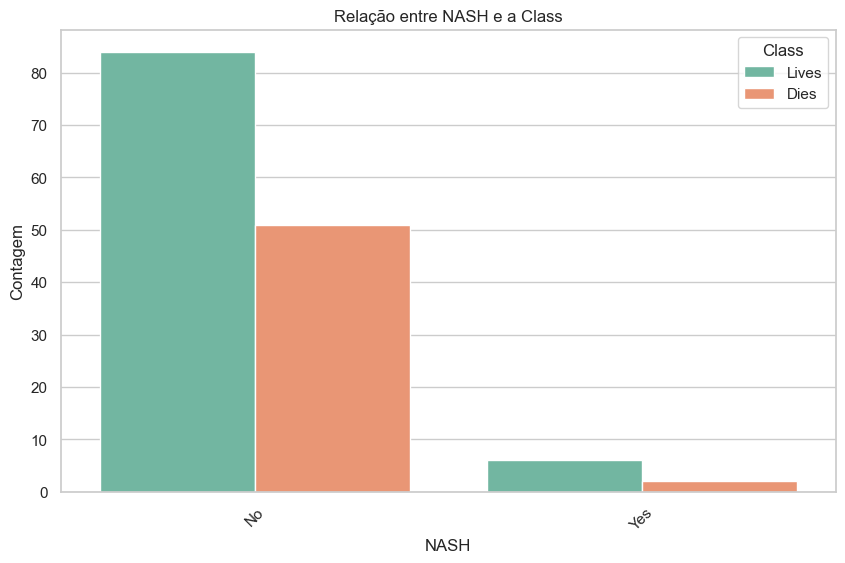

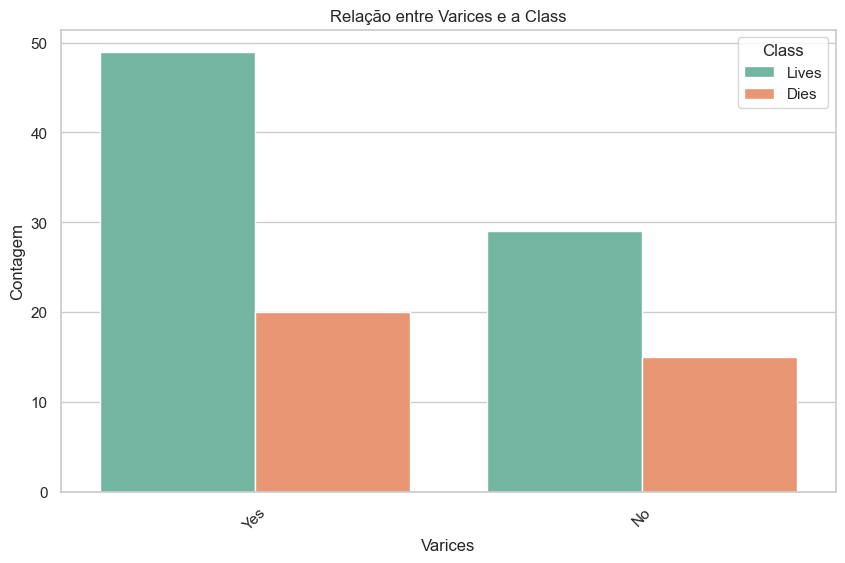

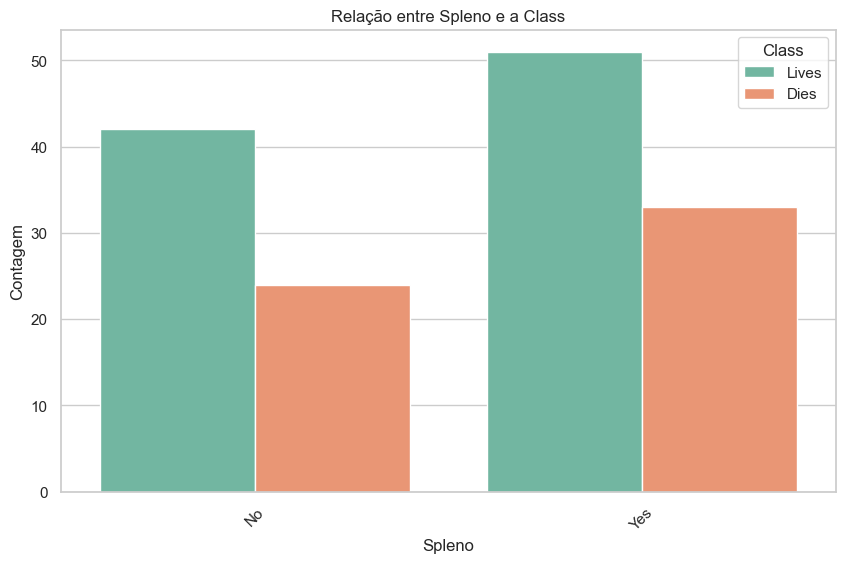

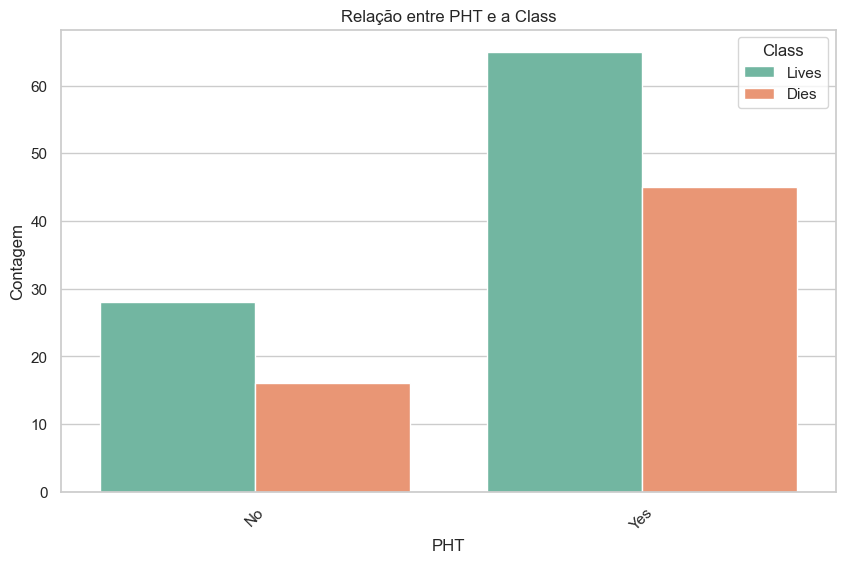

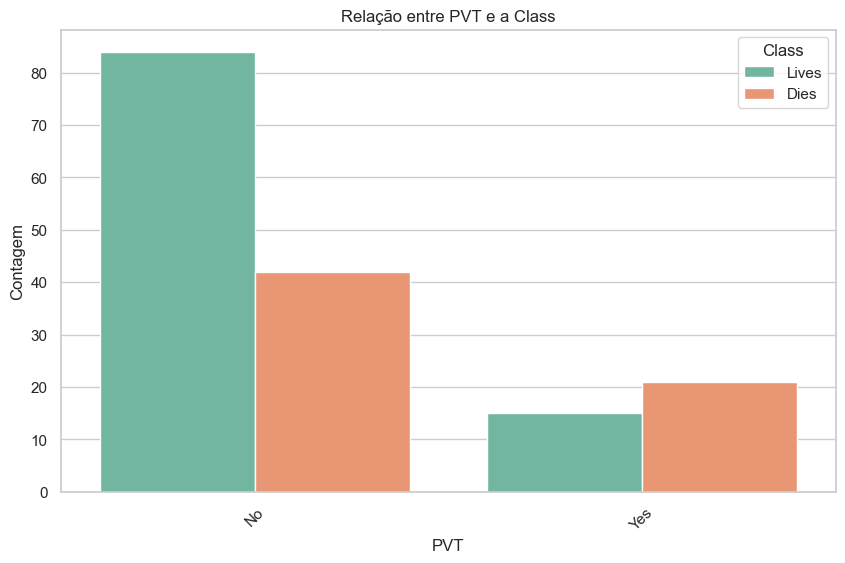

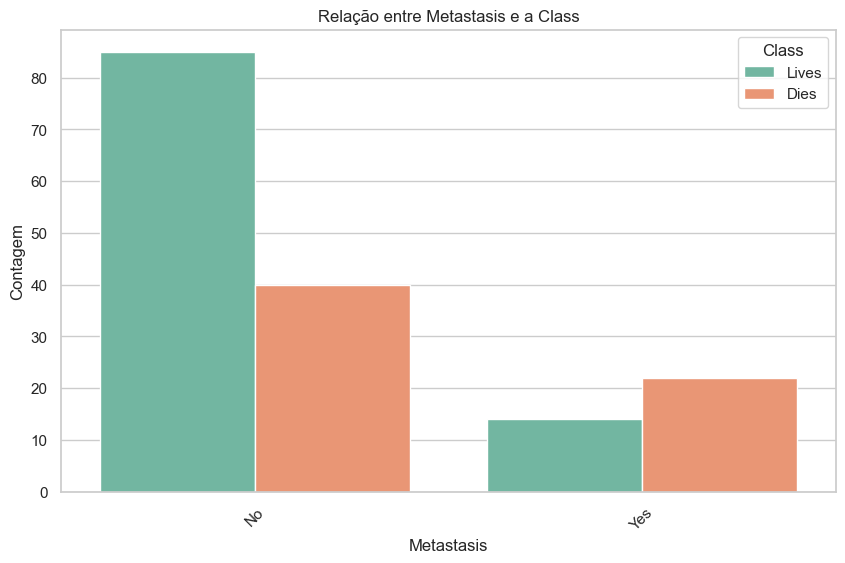

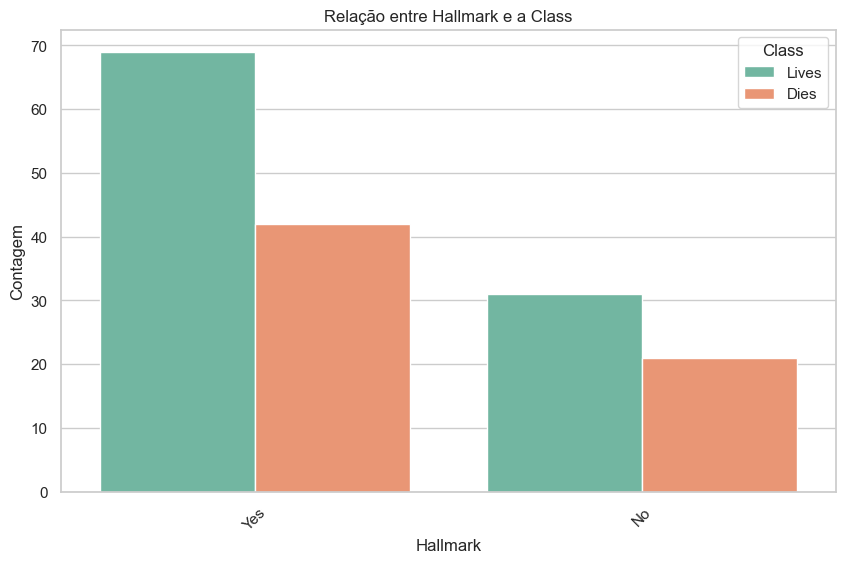

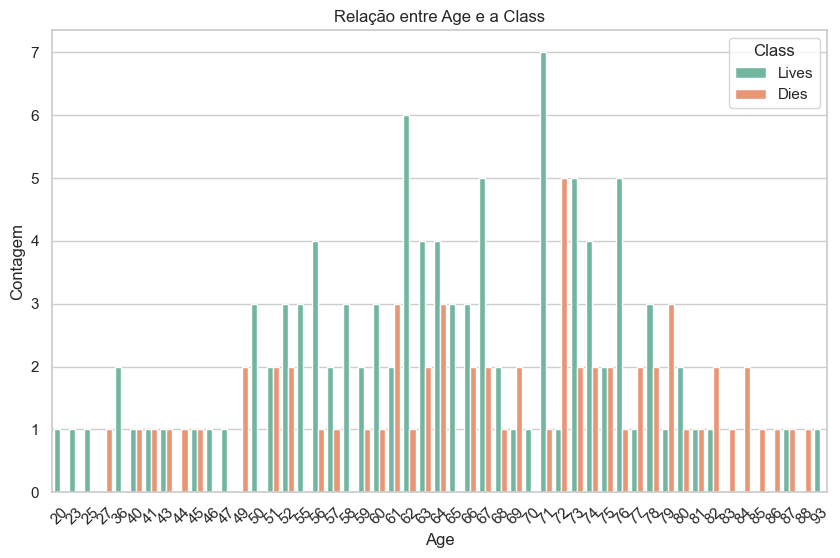

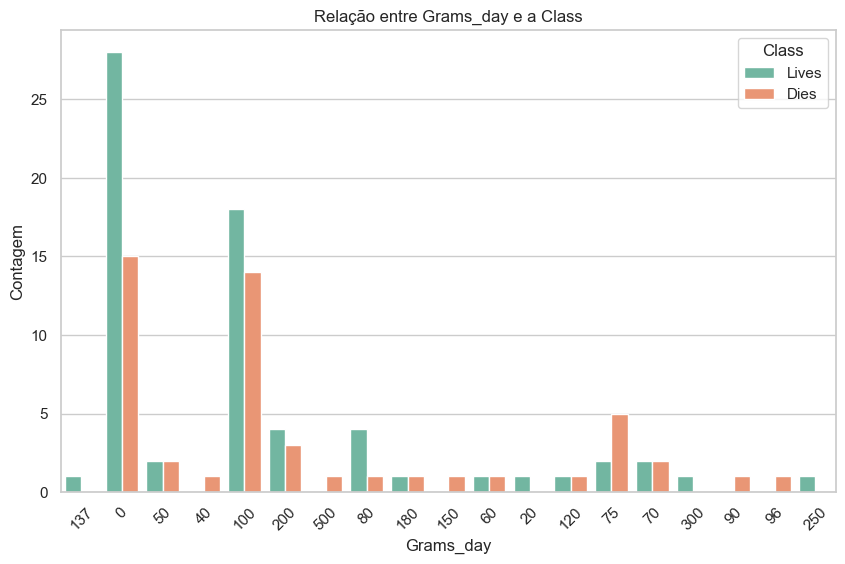

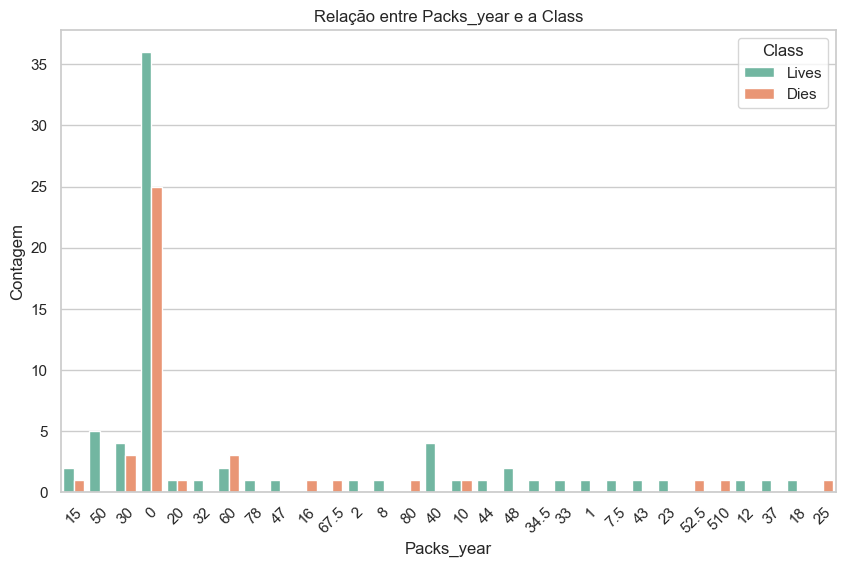

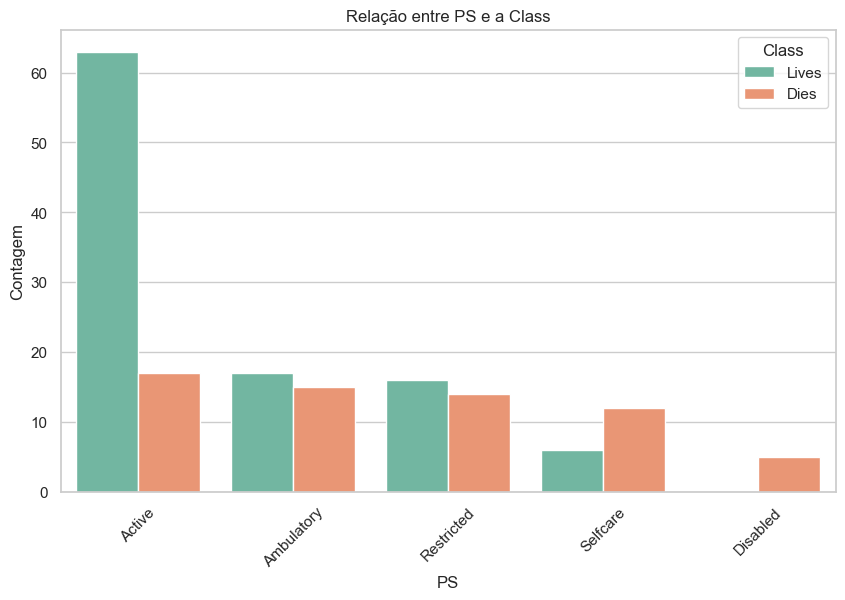

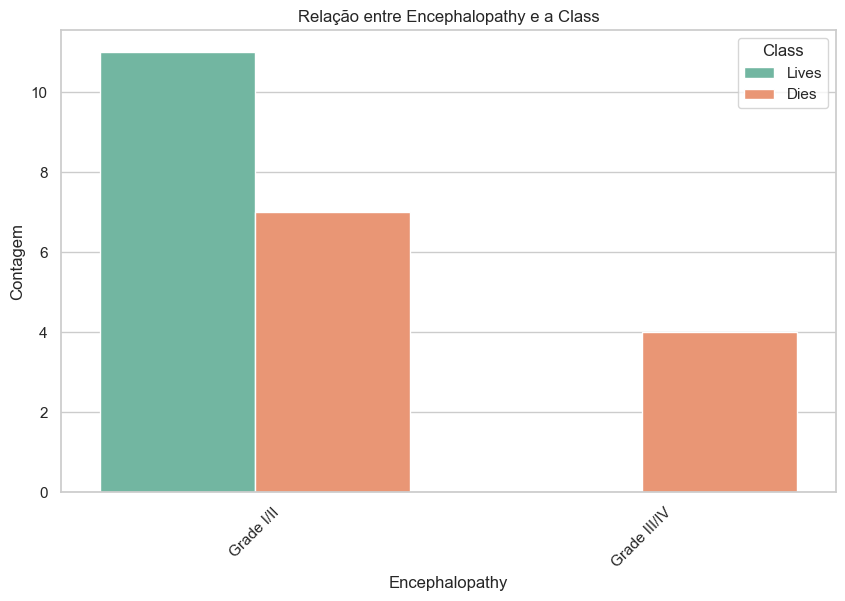

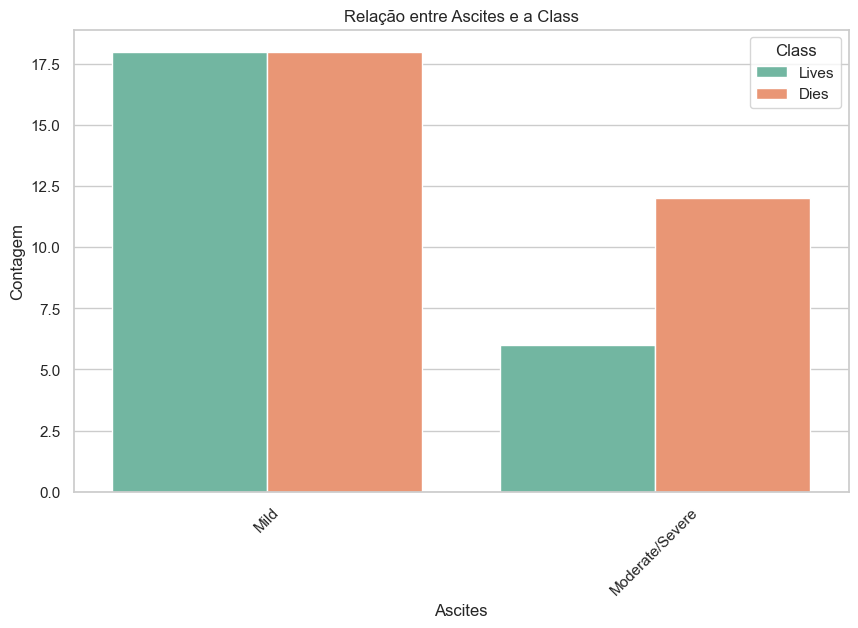

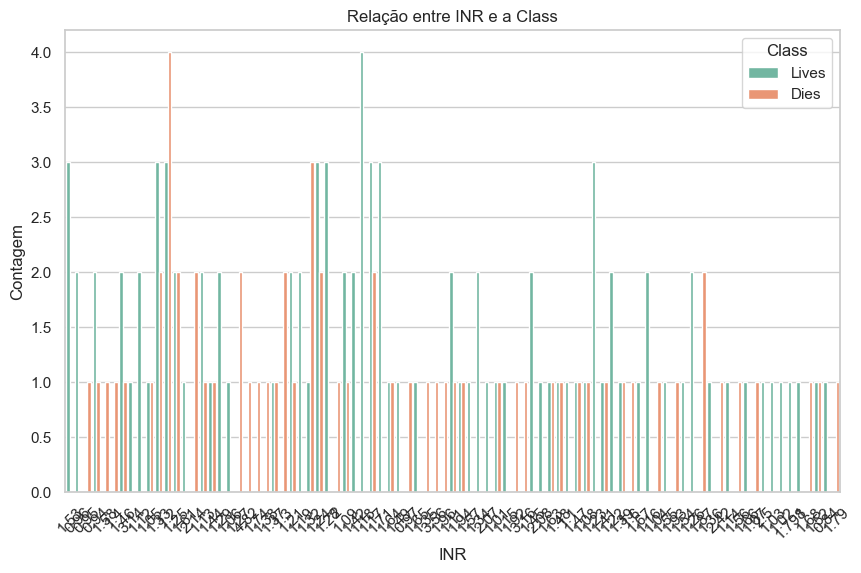

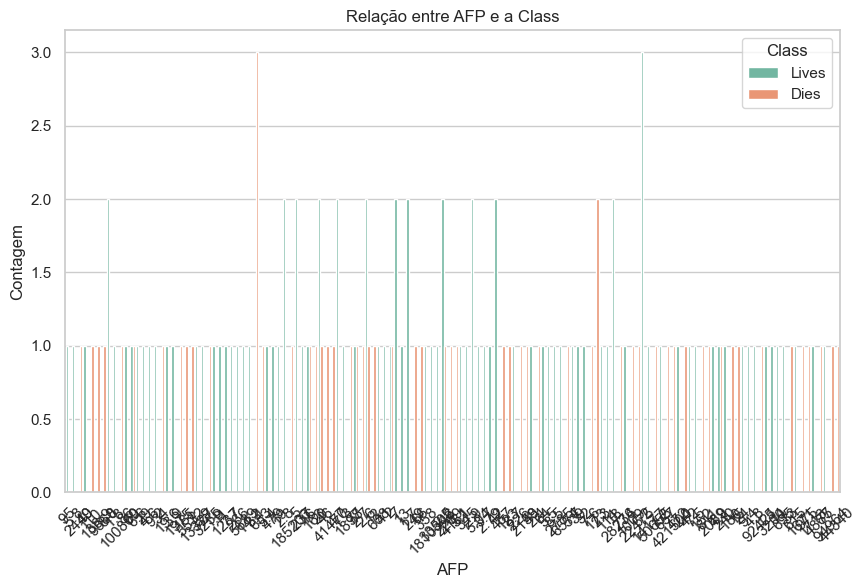

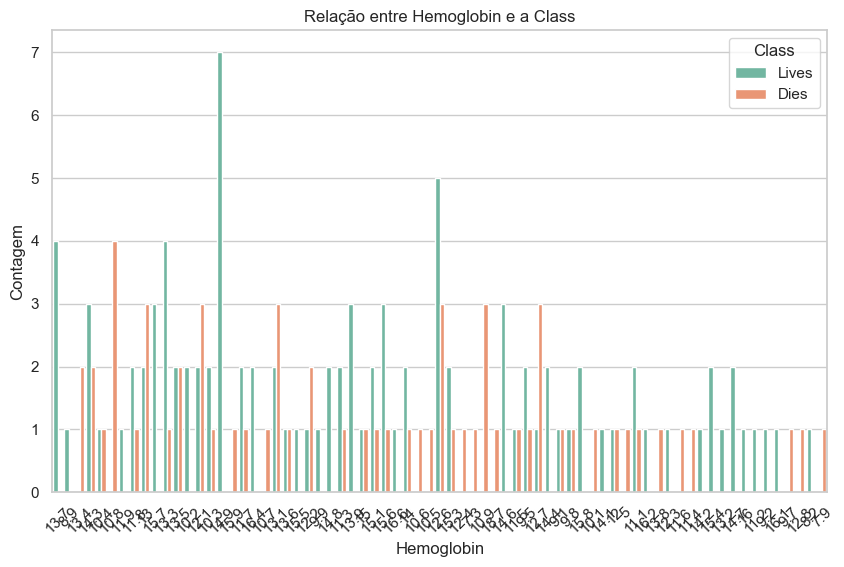

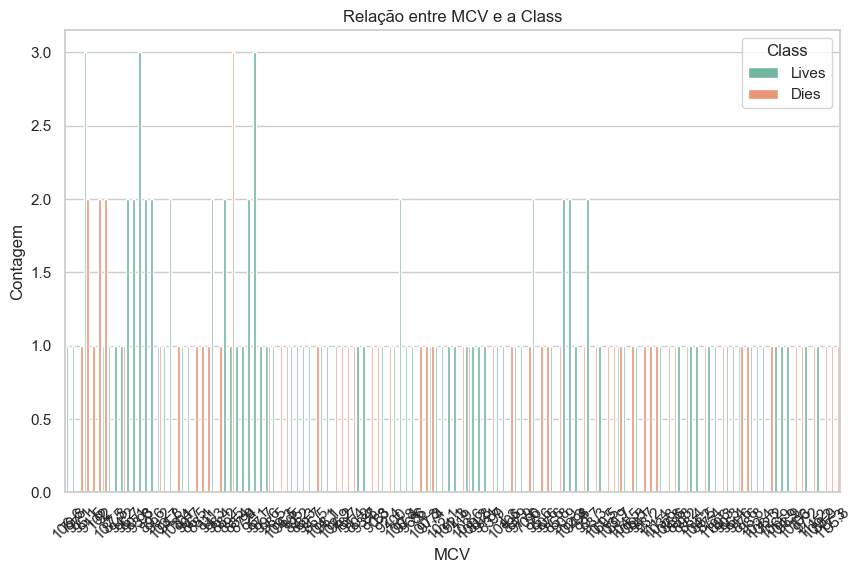

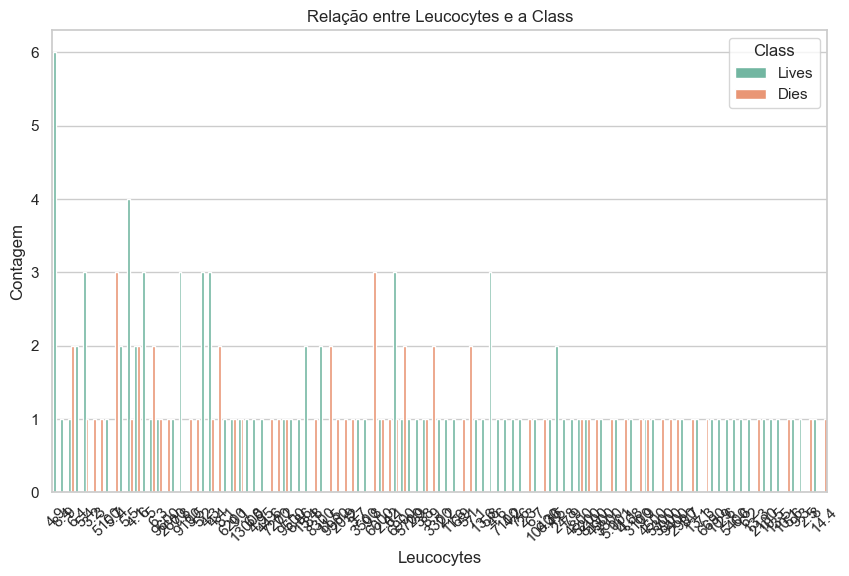

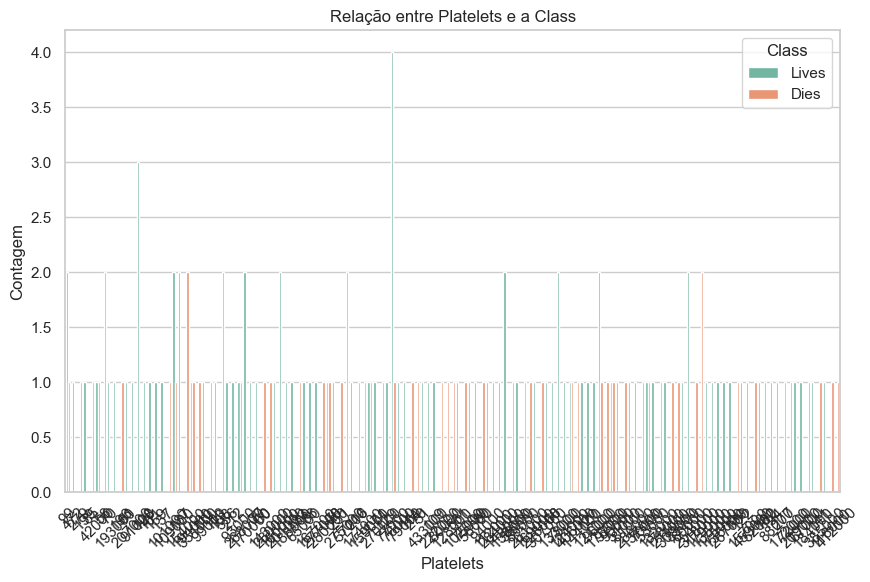

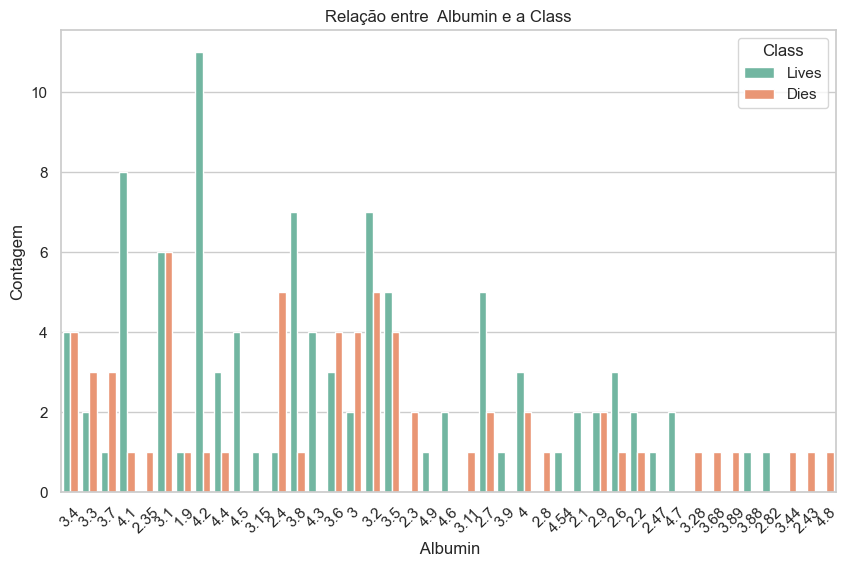

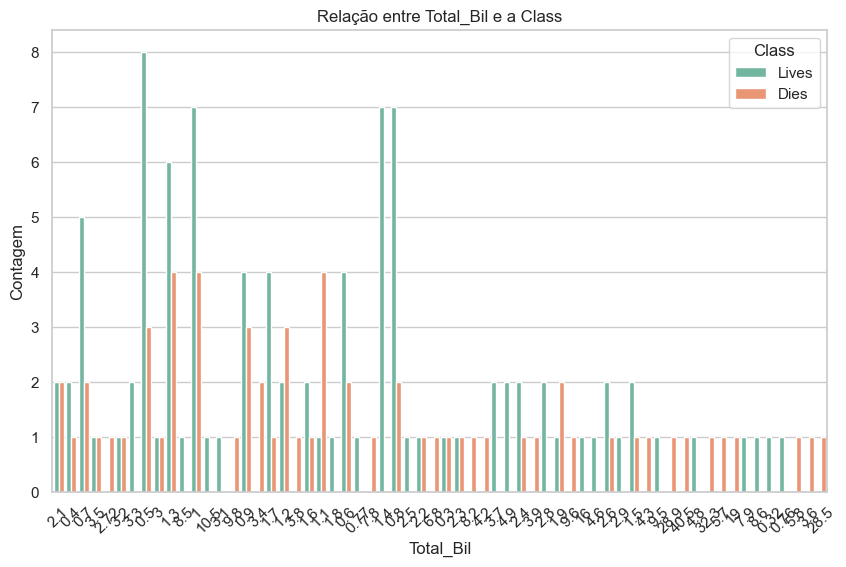

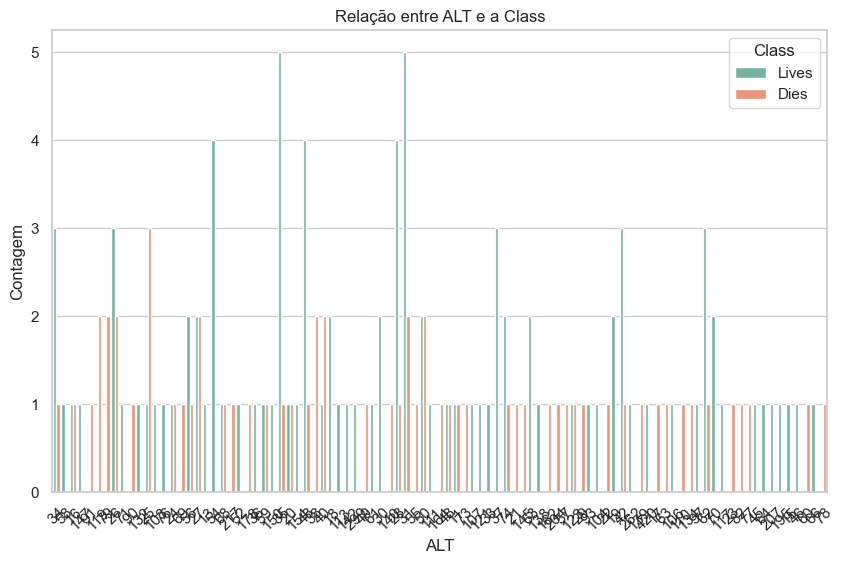

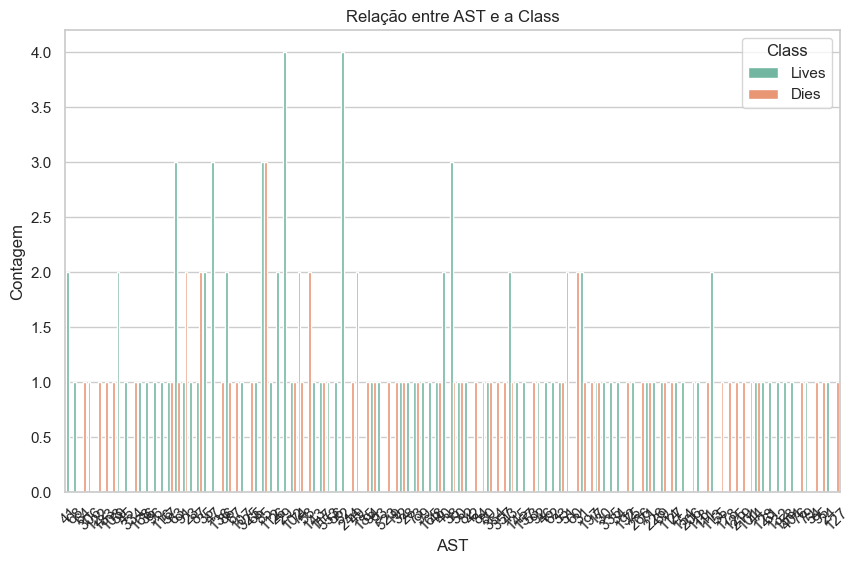

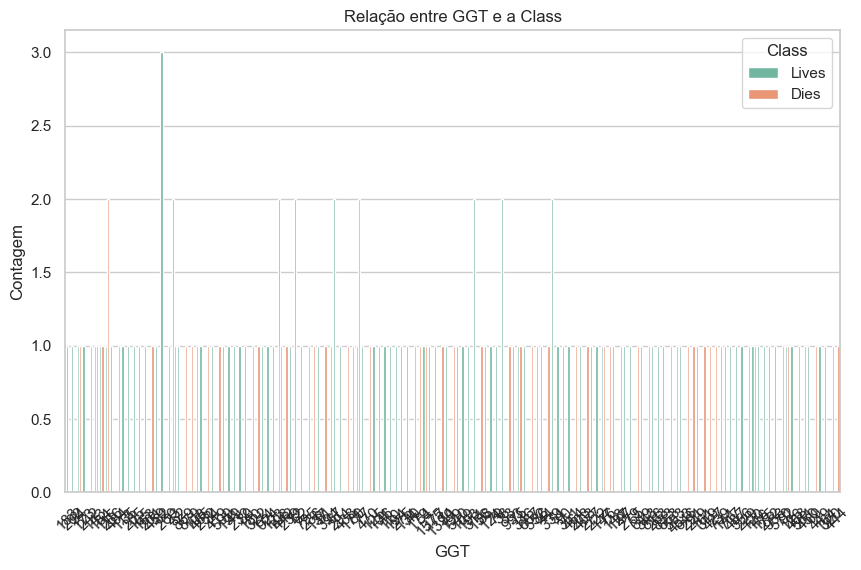

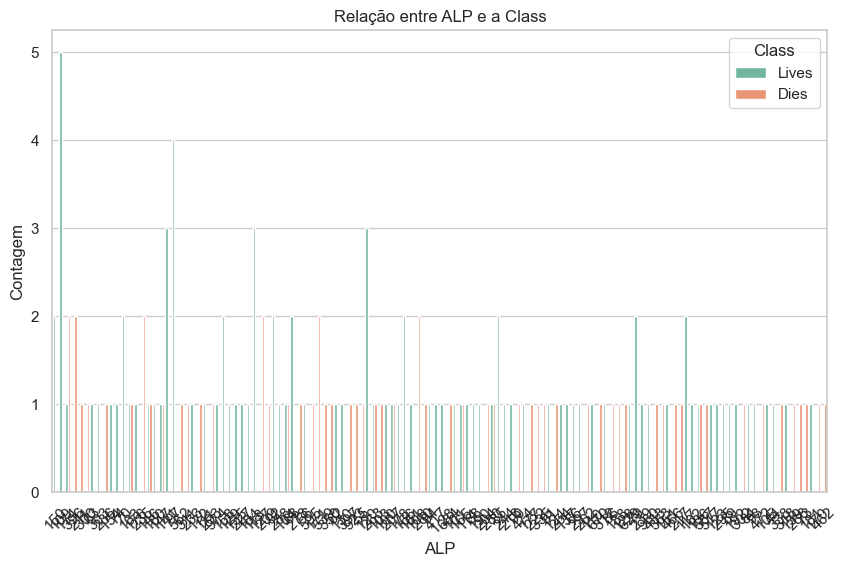

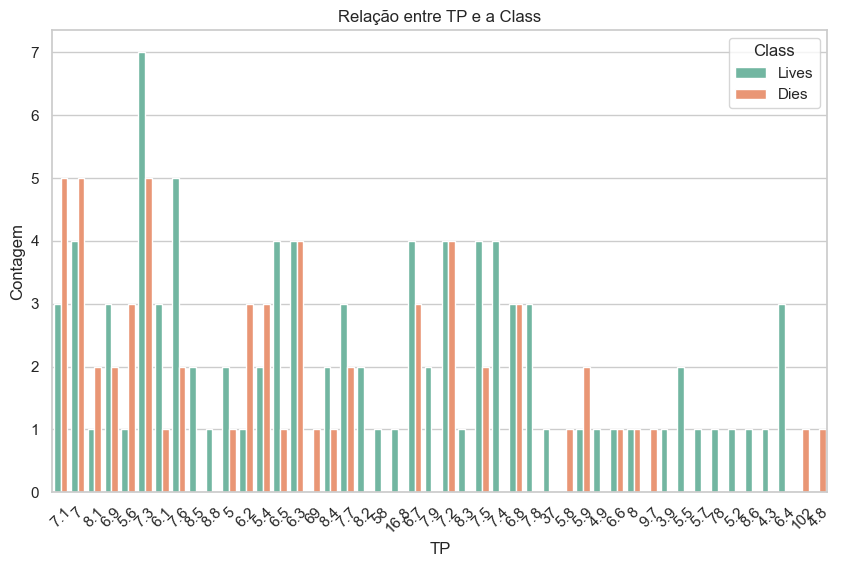

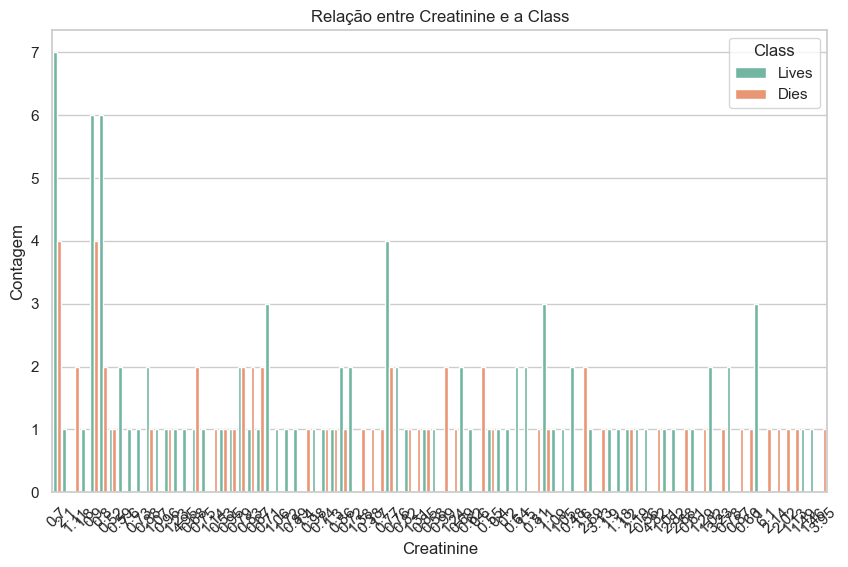

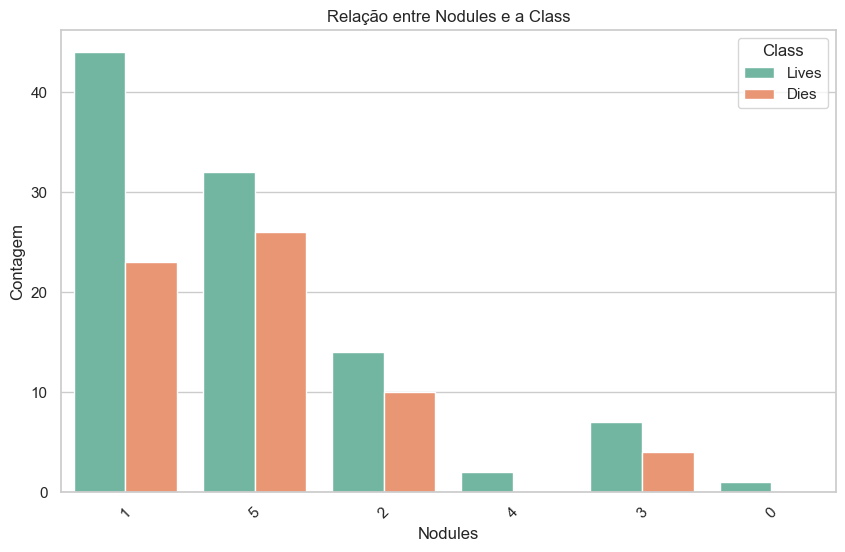

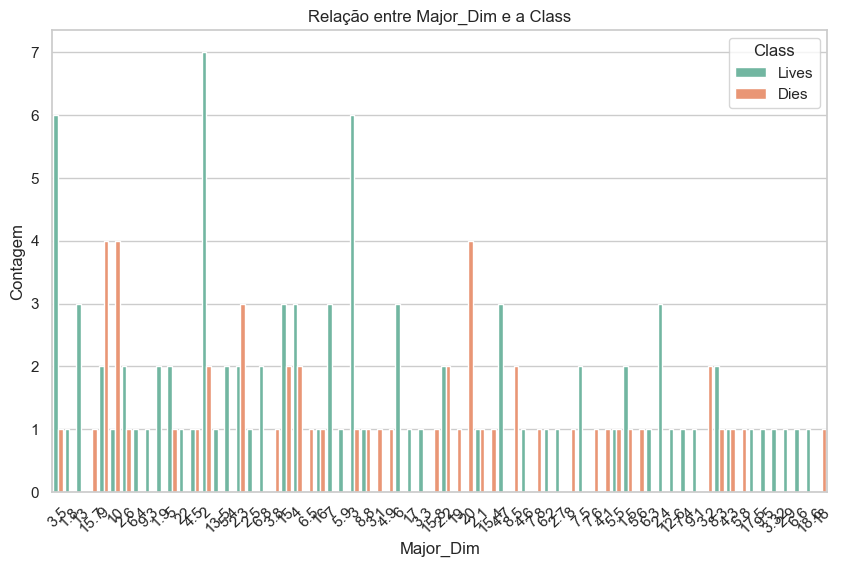

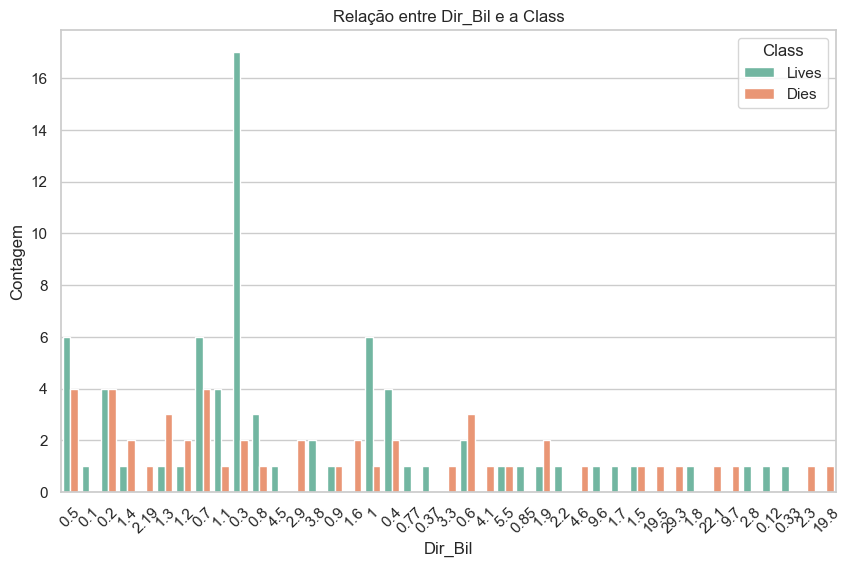

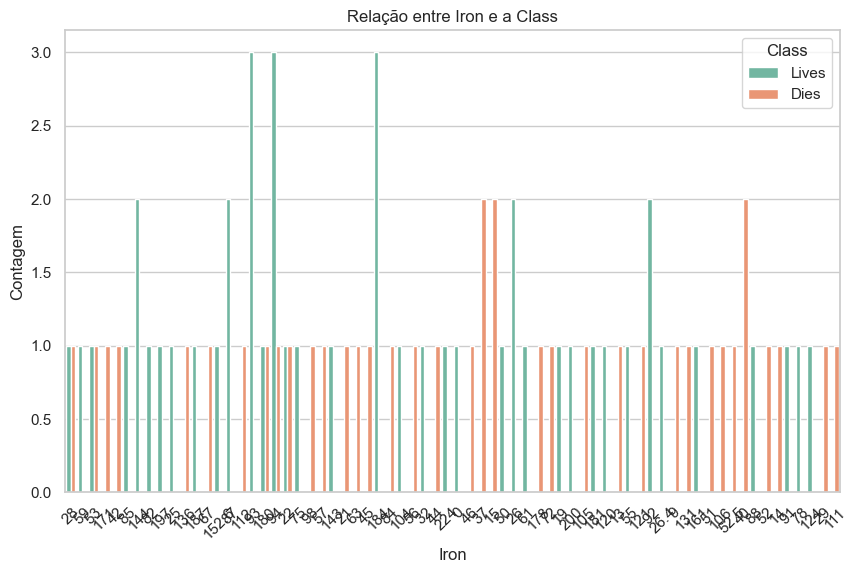

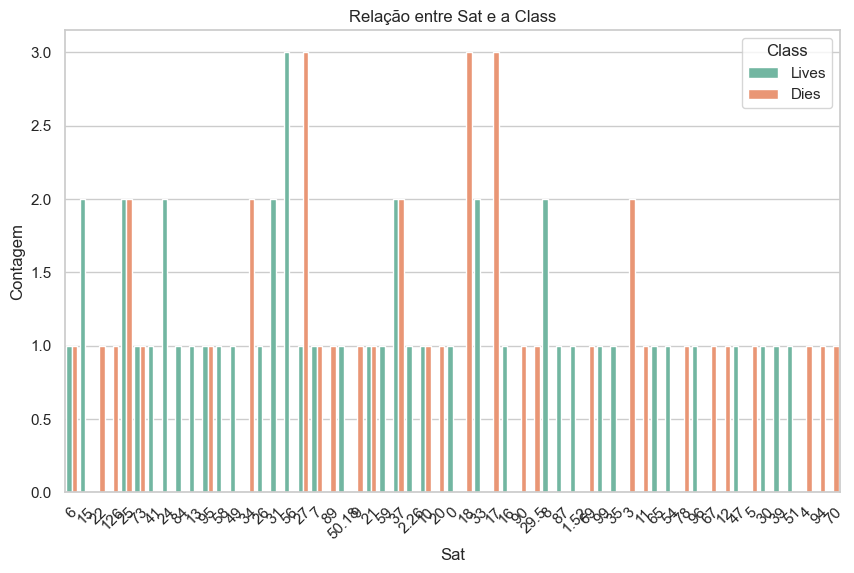

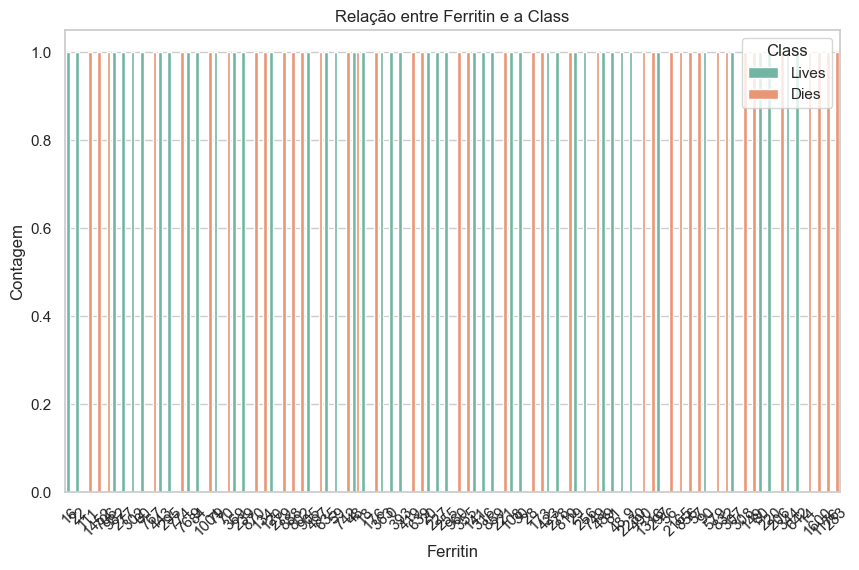

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definir o tamanho da figura
plt.figure(figsize=(12, 8))

# Iterar sobre cada coluna e criar um gráfico de barras empilhadas
for col_name in dados.columns[:-1]:  # Excluir a coluna "Class"
    plt.figure(figsize=(10, 6))
    sns.countplot(data=dados, x=col_name, hue='Class', palette='Set2')
    plt.title(f'Relação entre {col_name} e a Class')
    plt.xlabel(col_name)
    plt.ylabel('Contagem')
    plt.legend(title='Class')
    plt.xticks(rotation=45)
    plt.show()

Por fim, é importante então refletirmos sobre os resultados obtidos.

Em primeiro lugar, observamos e corrigimos um erro inicial na interpretação de '?'.

Em segundo lugar, é necessário ter em conta que muitos dos valores numéricos estão representados como tipo 'object' causando uma incompatibilidade nos cálculos de correlação, já que a correlação é uma medida estatística que só pode ser calculada entre variáveis numéricas. Isso destaca a necessidade de converter corretamente os tipos de dados antes de realizar análises estatísticas, sendo uma das principais coisas a fazer no pré-processamento dos dados.

Desta forma, iremos passar à proxima fase, fazendo um tratamento dos dados eficaz para os deixar prontos para a fase de Modelagem.

## Passo 2: Pré-processamento


[[ Voltar ao topo ]](#Índice)

Nesta parte, dedicamo-nos ao pré-processamente de Dados, dada que esta é uma etapa crucial no pipeline de aprendizado de máquina, pois prepara os dados para serem utilizados pelos modelos de forma eficiente e eficaz. 

Vamos seguir alguns passos comuns no pré-processamento de dados, incluindo imputação de valores ausentes, transformação de dados, dimensionamento de dados e engenharia de recursos. 

1. Numa parte inicial, vamos começar por tratar dos dados ausentes numa perspetiva mais avançada, ou seja começando por analisar a percentagem de valores ausentes por coluna.

In [82]:
# Calcular a porcentagem de valores ausentes por coluna
missing_percent = dados.isnull().mean() * 100
print(missing_percent)

Gender             0.000000
Symptoms          10.909091
Alcohol            0.000000
HBsAg             10.303030
HBeAg             23.636364
HBcAb             14.545455
HCVAb              5.454545
Cirrhosis          0.000000
Endemic           23.636364
Smoking           24.848485
Diabetes           1.818182
Obesity            6.060606
Hemochro          13.939394
AHT                1.818182
CRI                1.212121
HIV                8.484848
NASH              13.333333
Varices           31.515152
Spleno             9.090909
PHT                6.666667
PVT                1.818182
Metastasis         2.424242
Hallmark           1.212121
Age                0.000000
Grams_day         29.090909
Packs_year        32.121212
PS                 0.000000
Encephalopathy    86.666667
Ascites           67.272727
INR                2.424242
AFP                4.848485
Hemoglobin         1.818182
MCV                1.818182
Leucocytes         1.818182
Platelets          1.818182
 Albumin           3

Fazendo uma avaliação dos resultados, podemos concluir que existem variáveis com elevadas percentagens de valores ausentes, o que merece um especial cuidado. 

Desta forma iremos atribuir um critério definido por nós, para maximizar a precisão, que estará sujeito a testes:
> Menos de 15%: Vamos substituir os valores em falta pela média (em variáveis numéricas) e pela moda (em variáveis categóricas).

> 15% a 45%: Tentaremos usar uma técnica de imputação mais avançada, como a imputação múltipla que preserva a variabilidade dos dados, levando a estimativas mais precisas visto que a percentagem de valores em falta é significativa.

> Mais de 45%: Vamos proceder à exclusão destas variáveis, pois estas não irão fornecer informações suficientes para o modelo.

2. Começando pela remoção das variáveis com percentagens acima de 45%:

In [83]:
# Definir um limite de porcentagem de valores ausentes para remoção
limite_remocao = 45

# Remover colunas com mais de 45% de valores ausentes
colunas_remover = missing_percent[missing_percent > limite_remocao].index
dados.drop(columns=colunas_remover, inplace=True)

Agora, vamos verificar as alterações:

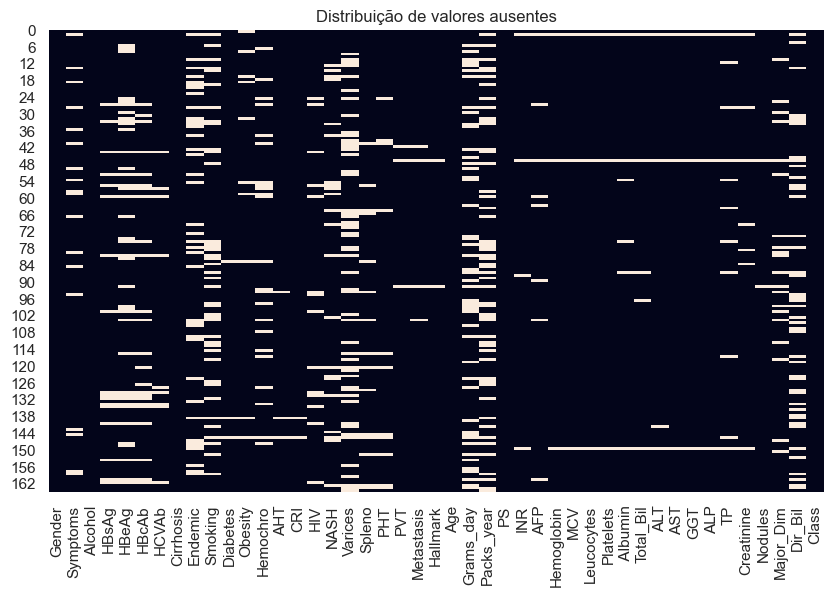

In [84]:
# Visualização da distribuição de valores ausentes
plt.figure(figsize=(10, 6))
sns.heatmap(dados.isnull(), cbar=False)
plt.title('Distribuição de valores ausentes')
plt.show()

Comparando este gráfico com o [[ anterior ]](#Distribuição-de-valores-ausentes), podemos notar diferenças signficativas e positivas para o projeto.

3. Neste momento, poderiamos passar para a imputação dos valores ausentes pela sua média ou moda mas é importante realçar que isto não seria possível visto que, como concluimos no final da exploração de dados, temos variáveis representadas com números que são do tipo 'object' ou seja, são vistos como uma string. Assim, a abordagem a ter é fazer essa transformação para inteiro, ou melhor, para float que permite uma maior precisão, visto que, por outro lado, também possuimos números em vírgula flutuante:

In [85]:
# Selecionar colunas de 'age' até 'Packs_year'
colunas_a_converter = dados.loc[:, 'Age':'Packs_year'].columns

# Converter as colunas especificadas de 'object' para 'int64'
for coluna in colunas_a_converter:
    dados[coluna] = pd.to_numeric(dados[coluna], errors='coerce').astype('Float32')
    
# Selecionar colunas de 'age' até 'class'
colunas_a_converter = dados.loc[:, 'INR':'Dir_Bil'].columns

# Converter as colunas especificadas de 'object' para 'int64'
for coluna in colunas_a_converter:
    dados[coluna] = pd.to_numeric(dados[coluna], errors='coerce').astype('Float32')

# Vamos verificar
print(dados.dtypes)

Gender         object
Symptoms       object
Alcohol        object
HBsAg          object
HBeAg          object
HBcAb          object
HCVAb          object
Cirrhosis      object
Endemic        object
Smoking        object
Diabetes       object
Obesity        object
Hemochro       object
AHT            object
CRI            object
HIV            object
NASH           object
Varices        object
Spleno         object
PHT            object
PVT            object
Metastasis     object
Hallmark       object
Age           Float32
Grams_day     Float32
Packs_year    Float32
PS             object
INR           Float32
AFP           Float32
Hemoglobin    Float32
MCV           Float32
Leucocytes    Float32
Platelets     Float32
 Albumin      Float32
Total_Bil     Float32
ALT           Float32
AST           Float32
GGT           Float32
ALP           Float32
TP            Float32
Creatinine    Float32
Nodules       Float32
Major_Dim     Float32
Dir_Bil       Float32
Class          object
dtype: obj

Prontos... Temos já todos os tipos das variáveis bem definidos e os dados prontos para serem usados da melhor forma.

4. Vamos então verificar se existem valores negativos que possam estar erradamente atribuidos, precisando de uma alteração.

In [86]:
#Verificando se existem valores negativos apenas nas colunas numéricas senão dá erro
valores_negativos = dados.select_dtypes(include=[np.number]).lt(0).sum()

#Imprimindo o número de valores negativos por coluna
print(valores_negativos)

Age           0
Grams_day     0
Packs_year    0
INR           0
AFP           0
Hemoglobin    0
MCV           0
Leucocytes    0
Platelets     0
 Albumin      0
Total_Bil     0
ALT           0
AST           0
GGT           0
ALP           0
TP            0
Creatinine    0
Nodules       0
Major_Dim     0
Dir_Bil       0
dtype: Int32


Ótimo! Está tudo perfeito para o trabalho.

5. Vamos, então prosseguir com a alteração das colunas com percentagem de valores ausentes de até 15%, com a sua substituição pela sua média, no caso de valores numéricos.

In [87]:
from sklearn.impute import SimpleImputer

# Definir um limite de porcentagem de valores ausentes para imputação
limite_imputacao = 15

# Selecionar colunas com até 15% de valores ausentes
colunas_imputacao = missing_percent[missing_percent <= limite_imputacao].index
print("\nColunas para imputação (até 15% de valores ausentes):\n", colunas_imputacao)

# Imputar valores ausentes nas colunas numéricas com a média
imputer_media = SimpleImputer(strategy='mean')
dados_numericos = dados[colunas_imputacao].select_dtypes(include=[np.number])
dados[dados_numericos.columns] = imputer_media.fit_transform(dados_numericos)

dados.head()


Colunas para imputação (até 15% de valores ausentes):
 Index(['Gender', 'Symptoms', 'Alcohol', 'HBsAg', 'HBcAb', 'HCVAb', 'Cirrhosis',
       'Diabetes', 'Obesity', 'Hemochro', 'AHT', 'CRI', 'HIV', 'NASH',
       'Spleno', 'PHT', 'PVT', 'Metastasis', 'Hallmark', 'Age', 'PS', 'INR',
       'AFP', 'Hemoglobin', 'MCV', 'Leucocytes', 'Platelets', ' Albumin',
       'Total_Bil', 'ALT', 'AST', 'GGT', 'ALP', 'TP', 'Creatinine', 'Nodules',
       'Major_Dim', 'Class'],
      dtype='object')


Gender Symptoms Alcohol HBsAg HBeAg HBcAb HCVAb Cirrhosis Endemic Smoking  \
0    Male       No     Yes    No    No    No    No       Yes      No     Yes   
1  Female      NaN      No    No    No    No   Yes       Yes     NaN     NaN   
2    Male       No     Yes   Yes    No   Yes    No       Yes      No     Yes   
3    Male      Yes     Yes    No    No    No    No       Yes      No     Yes   
4    Male      Yes     Yes   Yes    No   Yes    No       Yes      No     Yes   

   ...         ALT         AST         GGT         ALP        TP Creatinine  \
0  ...   34.000000   41.000000  183.000000  150.000000  7.100000   0.700000   
1  ...   67.093168   96.382716  268.026543  212.211605  8.961039   1.127089   
2  ...   58.000000   68.000000  202.000000  109.000000  7.000000   2.100000   
3  ...   16.000000   64.000000   94.000000  174.000000  8.100000   1.110000   
4  ...  147.000000  306.000000  173.000000  109.000000  6.900000   1.800000   

  Nodules Major_Dim Dir_Bil  Class  
0     1.0       3.5     0.5  Lives  
1     1.0       1.8    <NA>  Lives  
2     5.0      13.0     0.1  Lives  
3     2.0      15.7     0.2   Dies  
4     1.0       9.0    <NA>  Lives  

[5 rows x 45 columns]

Uma visão gráfica da alteração feita:

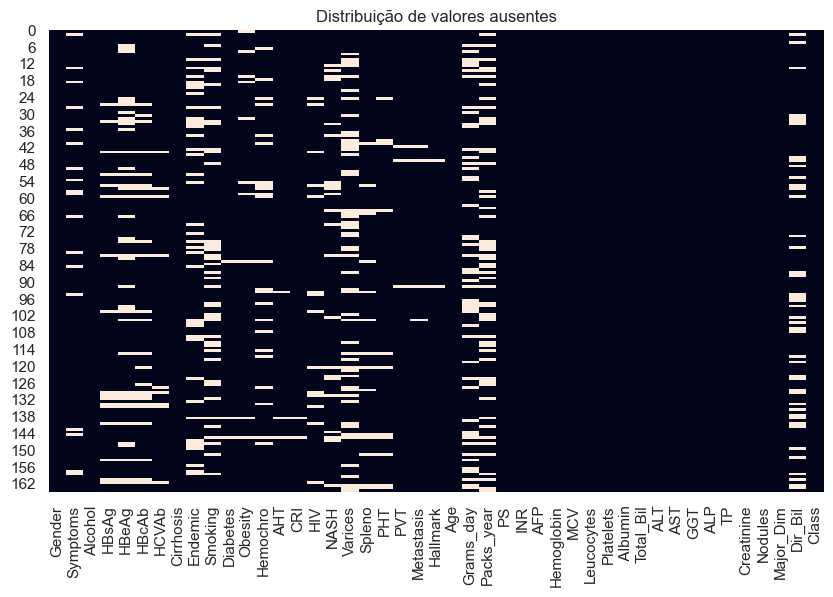

In [88]:
# Visualização da distribuição de valores ausentes
plt.figure(figsize=(10, 6))
sns.heatmap(dados.isnull(), cbar=False)
plt.title('Distribuição de valores ausentes')
plt.show()

Ou pela sua moda, em caso de strings:

In [89]:
# Imputar valores ausentes nas colunas categóricas com a moda
imputer_moda = SimpleImputer(strategy='most_frequent')
dados_categoricos = dados[colunas_imputacao].select_dtypes(include=[object])
dados[dados_categoricos.columns] = imputer_moda.fit_transform(dados_categoricos)

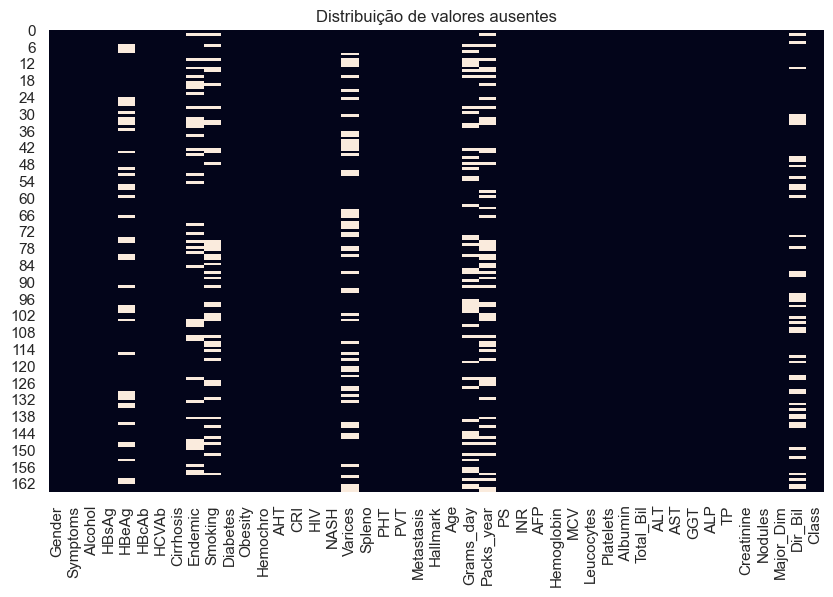

In [90]:
# Visualização da distribuição de valores ausentes
plt.figure(figsize=(10, 6))
sns.heatmap(dados.isnull(), cbar=False)
plt.title('Distribuição de valores ausentes')
plt.show()

Como podemos ver, o gráfico já se encontra com menos espaços em branco, o que signfica que já tratamos de muitas das variáveis ausentes. Contudo, as que as percentagens variam entre 15% e 45% necessitam de uma abordagem diferente pois estes valores já são um pouco tanto signficativos, podendo influenciar a precisão do modelo.

6. Iremos usar uma estratégia mais avançada: Imputação Iterativa, apenas para variáveis numéricas.

In [91]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Definir limites de porcentagem de valores ausentes
limite_inferior = 15
limite_superior = 45

# Selecionar colunas para imputação avançada (entre 15% e 45% de valores ausentes)
colunas_imputacao = missing_percent[(missing_percent > limite_inferior) & (missing_percent <= limite_superior)].index
colunas_imputacao_numericas = dados[colunas_imputacao].select_dtypes(include=np.number).columns
print("\nColunas para imputação avançada (entre 15% e 45% de valores ausentes):\n", colunas_imputacao)

# Exemplo de Iterative Imputer para colunas selecionadas
iter_imputer = IterativeImputer()

# Aplicar Iterative Imputer às colunas selecionadas
dados_iter_imputed = iter_imputer.fit_transform(dados[colunas_imputacao_numericas])
dados[colunas_imputacao_numericas] = dados_iter_imputed


Colunas para imputação avançada (entre 15% e 45% de valores ausentes):
 Index(['HBeAg', 'Endemic', 'Smoking', 'Varices', 'Grams_day', 'Packs_year',
       'Dir_Bil'],
      dtype='object')


Observando os resultados:

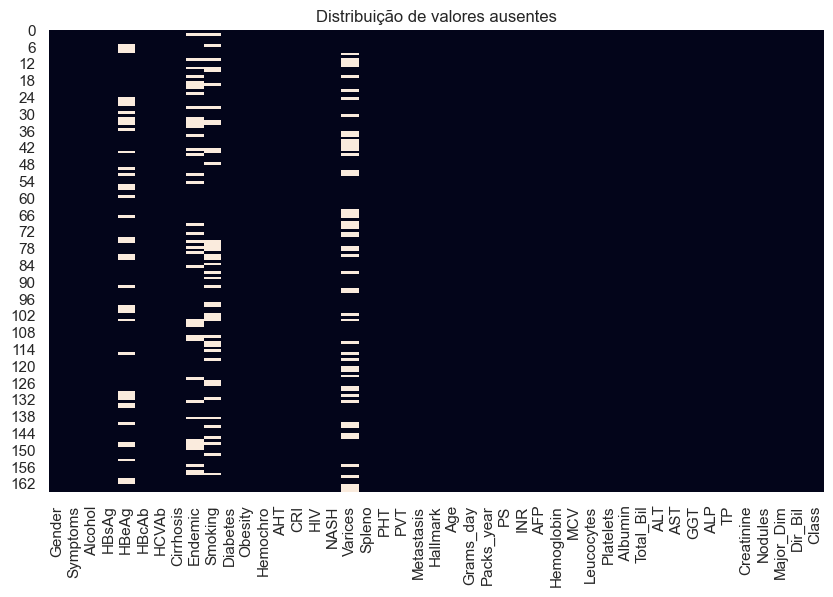

In [92]:
# Visualização da distribuição de valores ausentes
plt.figure(figsize=(10, 6))
sns.heatmap(dados.isnull(), cbar=False)
plt.title('Distribuição de valores ausentes')
plt.show()

Reparamos que faltam as variáveis representadas por strings serem imputadas, mas não podemos usar nenhum método pois estes só funcionam com variáveis numéricas. 

7. Desta forma, vamos proceder a um passo importante no pré-processamente que é a codificação dos nossos dados, que é importante para trazer maior compatabilidade como neste caso, e para preservar o significado de cada categoria.

In [93]:
from sklearn.preprocessing import LabelEncoder

# Selecionar apenas as colunas categóricas
dados_categoricos = dados.select_dtypes(include=['object'])

# Inicializar o LabelEncoder
label_encoder = LabelEncoder()

# Aplicar o LabelEncoder a cada coluna categórica
dados[dados_categoricos.columns] = dados_categoricos.apply(lambda col: label_encoder.fit_transform(col))

# Exibir o DataFrame com as colunas codificadas
print(dados)

     Gender  Symptoms  Alcohol  HBsAg  HBeAg  HBcAb  HCVAb  Cirrhosis  \
0         1         0        1      0      0      0      0          1   
1         0         1        0      0      0      0      1          1   
2         1         0        1      1      0      1      0          1   
3         1         1        1      0      0      0      0          1   
4         1         1        1      1      0      1      0          1   
..      ...       ...      ...    ...    ...    ...    ...        ...   
160       0         0        1      0      2      0      1          1   
161       0         1        0      0      2      0      0          1   
162       1         0        1      0      0      0      0          1   
163       1         0        1      1      0      1      1          1   
164       1         1        1      0      0      0      1          1   

     Endemic  Smoking  ...         ALT         AST         GGT         ALP  \
0          0        1  ...   34.000000   41.0

Espetáculo! Codificamos as variáveis com sucesso.

8. Agora, vamos concluir o que estavamos a fazer, que era o método de imputação interativo, mas agora para as strings.

In [94]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

colunas_imputacao = missing_percent[(missing_percent > limite_inferior) & (missing_percent <= limite_superior)].index

# Exemplo de Iterative Imputer para colunas selecionadas
iter_imputer = IterativeImputer()

# Aplicar Iterative Imputer às colunas selecionadas
dados_iter_imputed = iter_imputer.fit_transform(dados[colunas_imputacao])
dados[colunas_imputacao] = dados_iter_imputed


Observando os resultados...

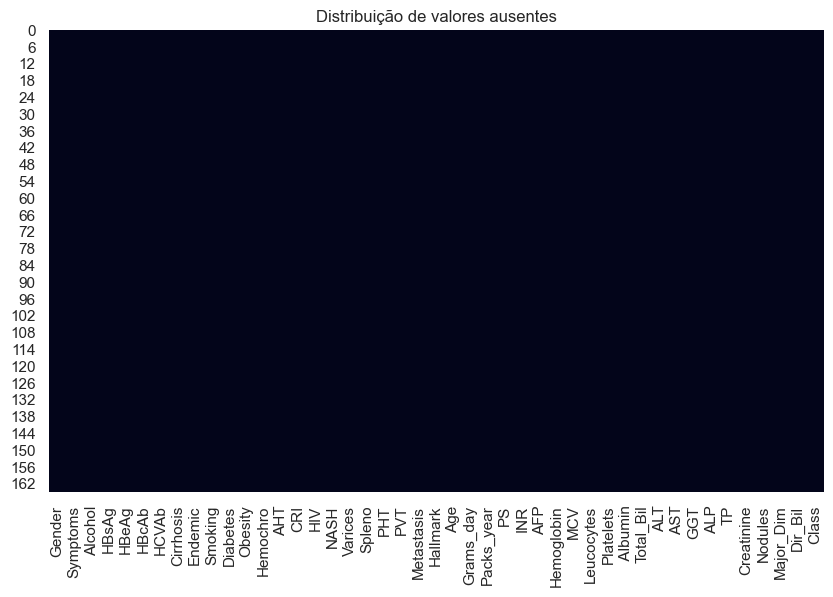

In [95]:
# Visualização da distribuição de valores ausentes
plt.figure(figsize=(10, 6))
sns.heatmap(dados.isnull(), cbar=False)
plt.title('Distribuição de valores ausentes')
plt.show()

Podemos verificar que todos os valores ausentes foram tratados.

9. Agora fazendo uma pequena análise dos nossos dados:

Observando e relacionando todas as variáveis.

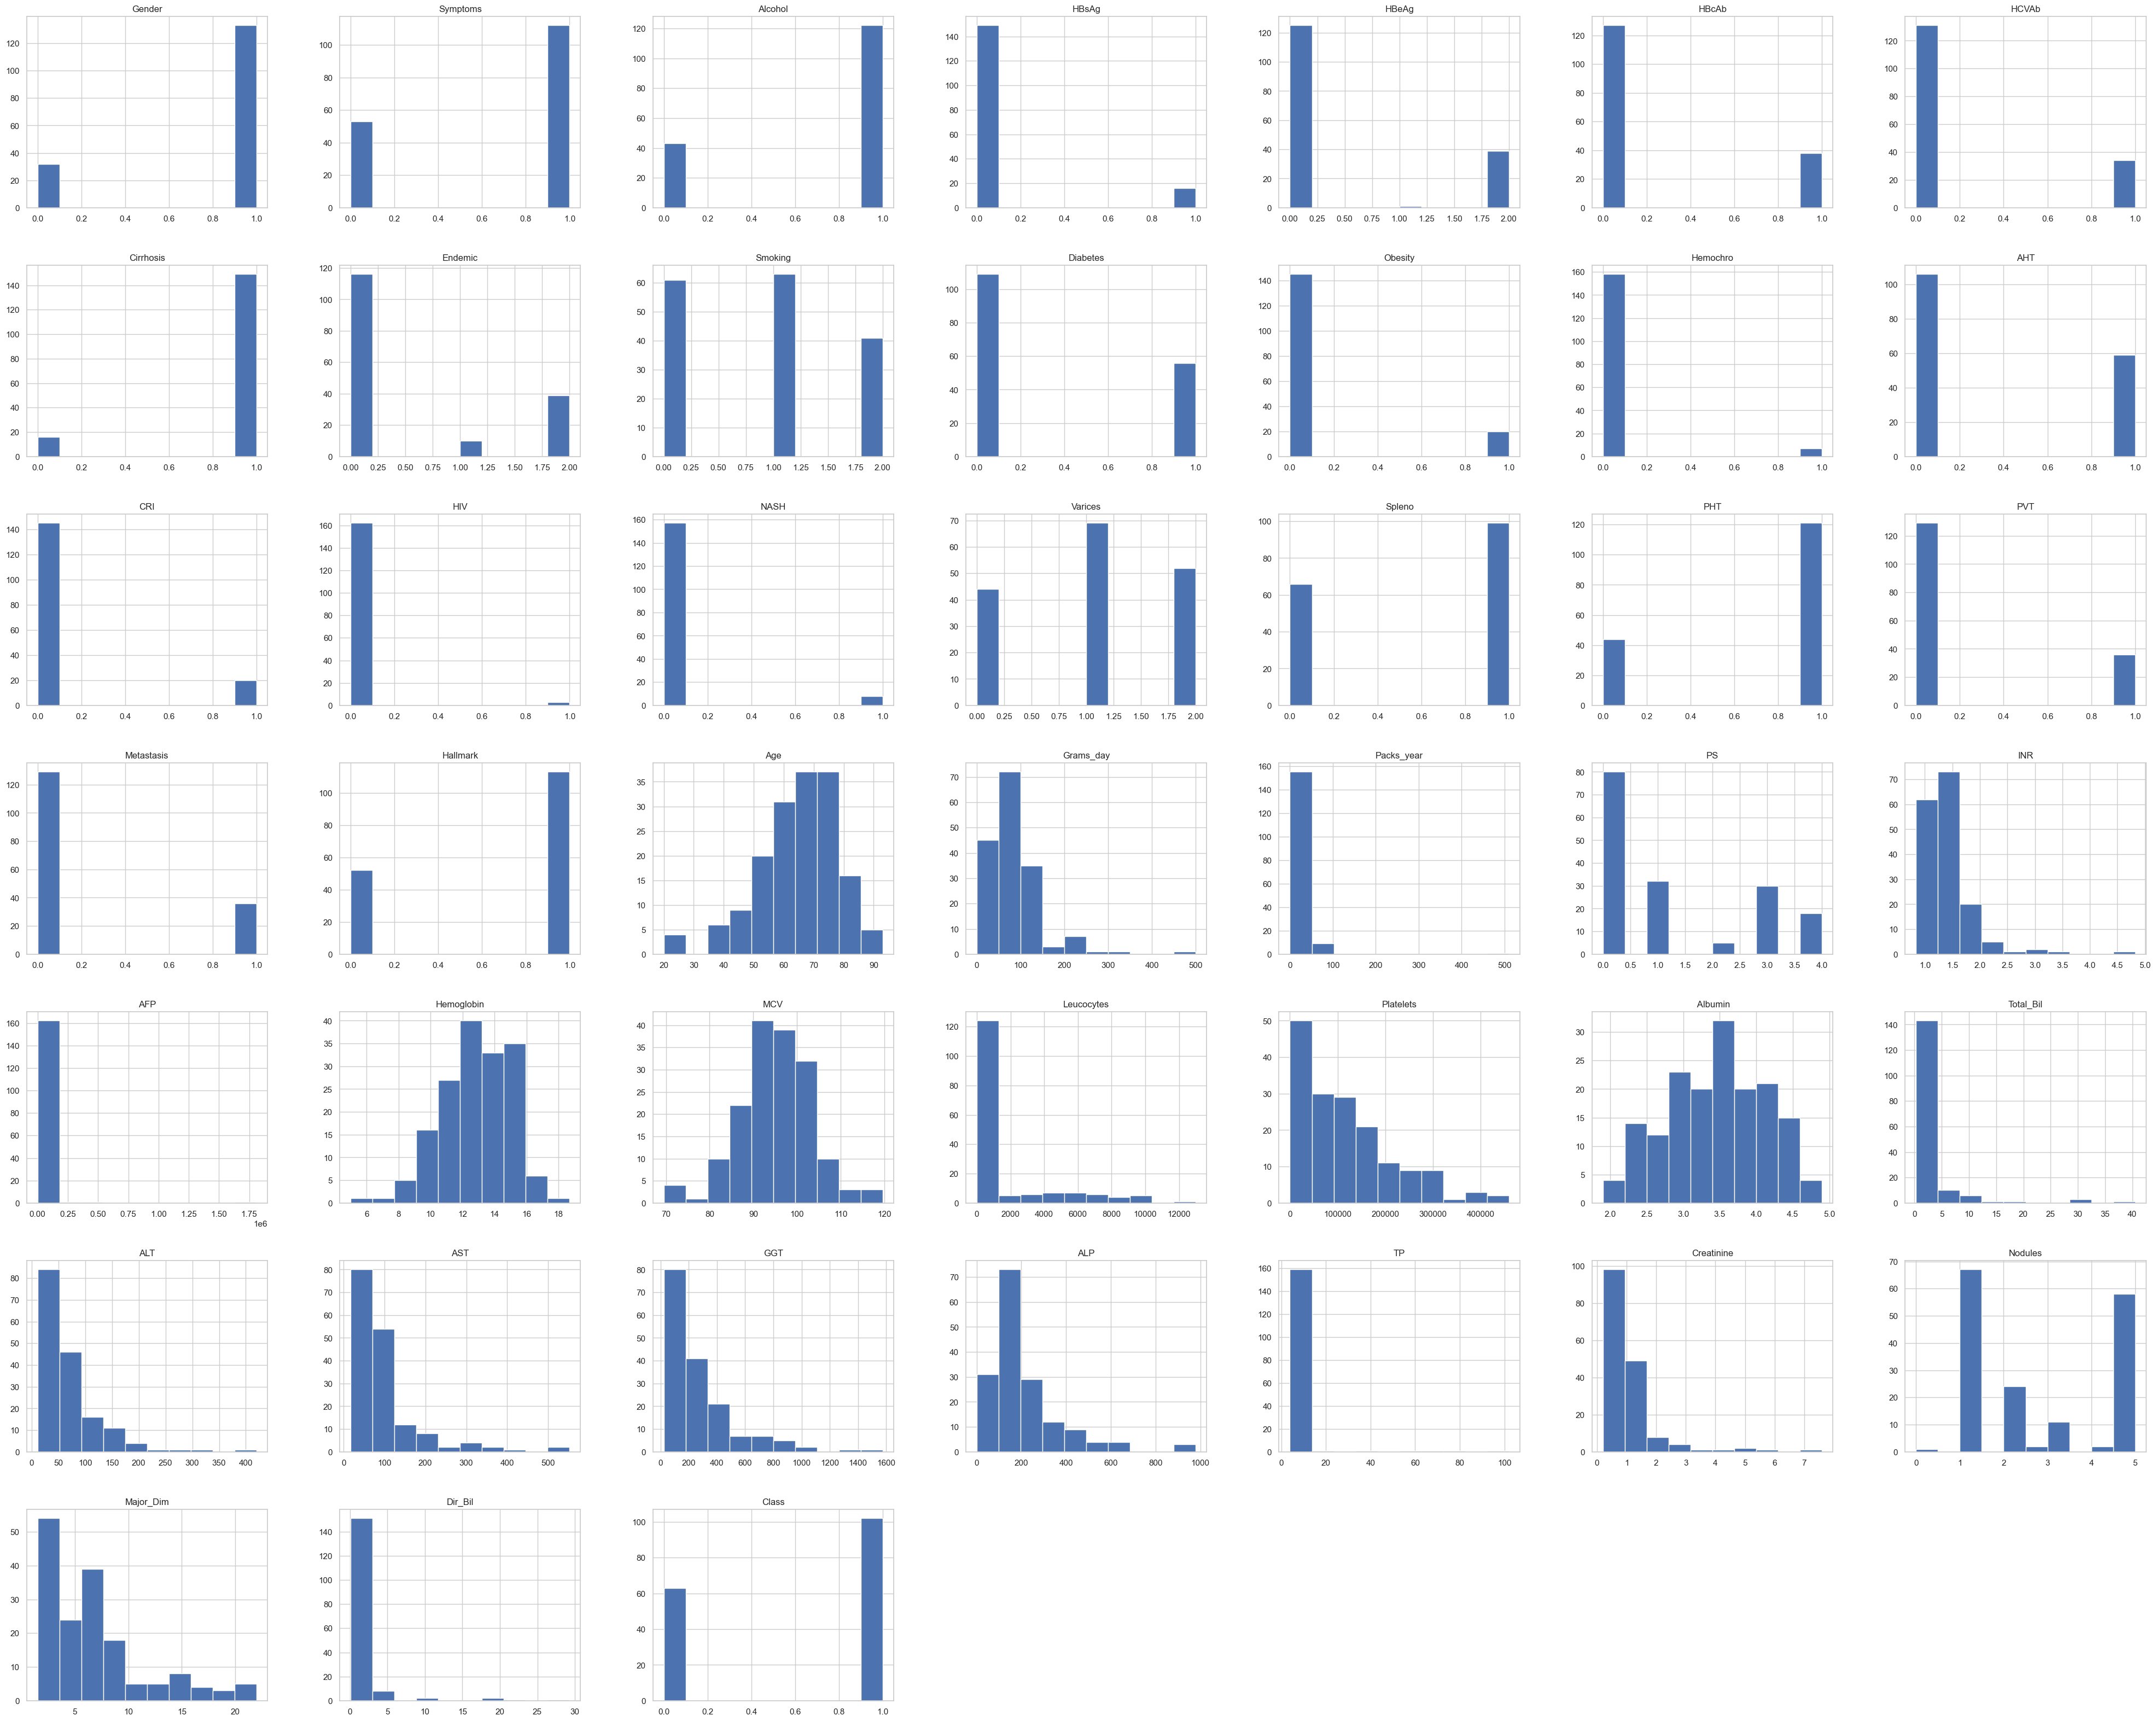

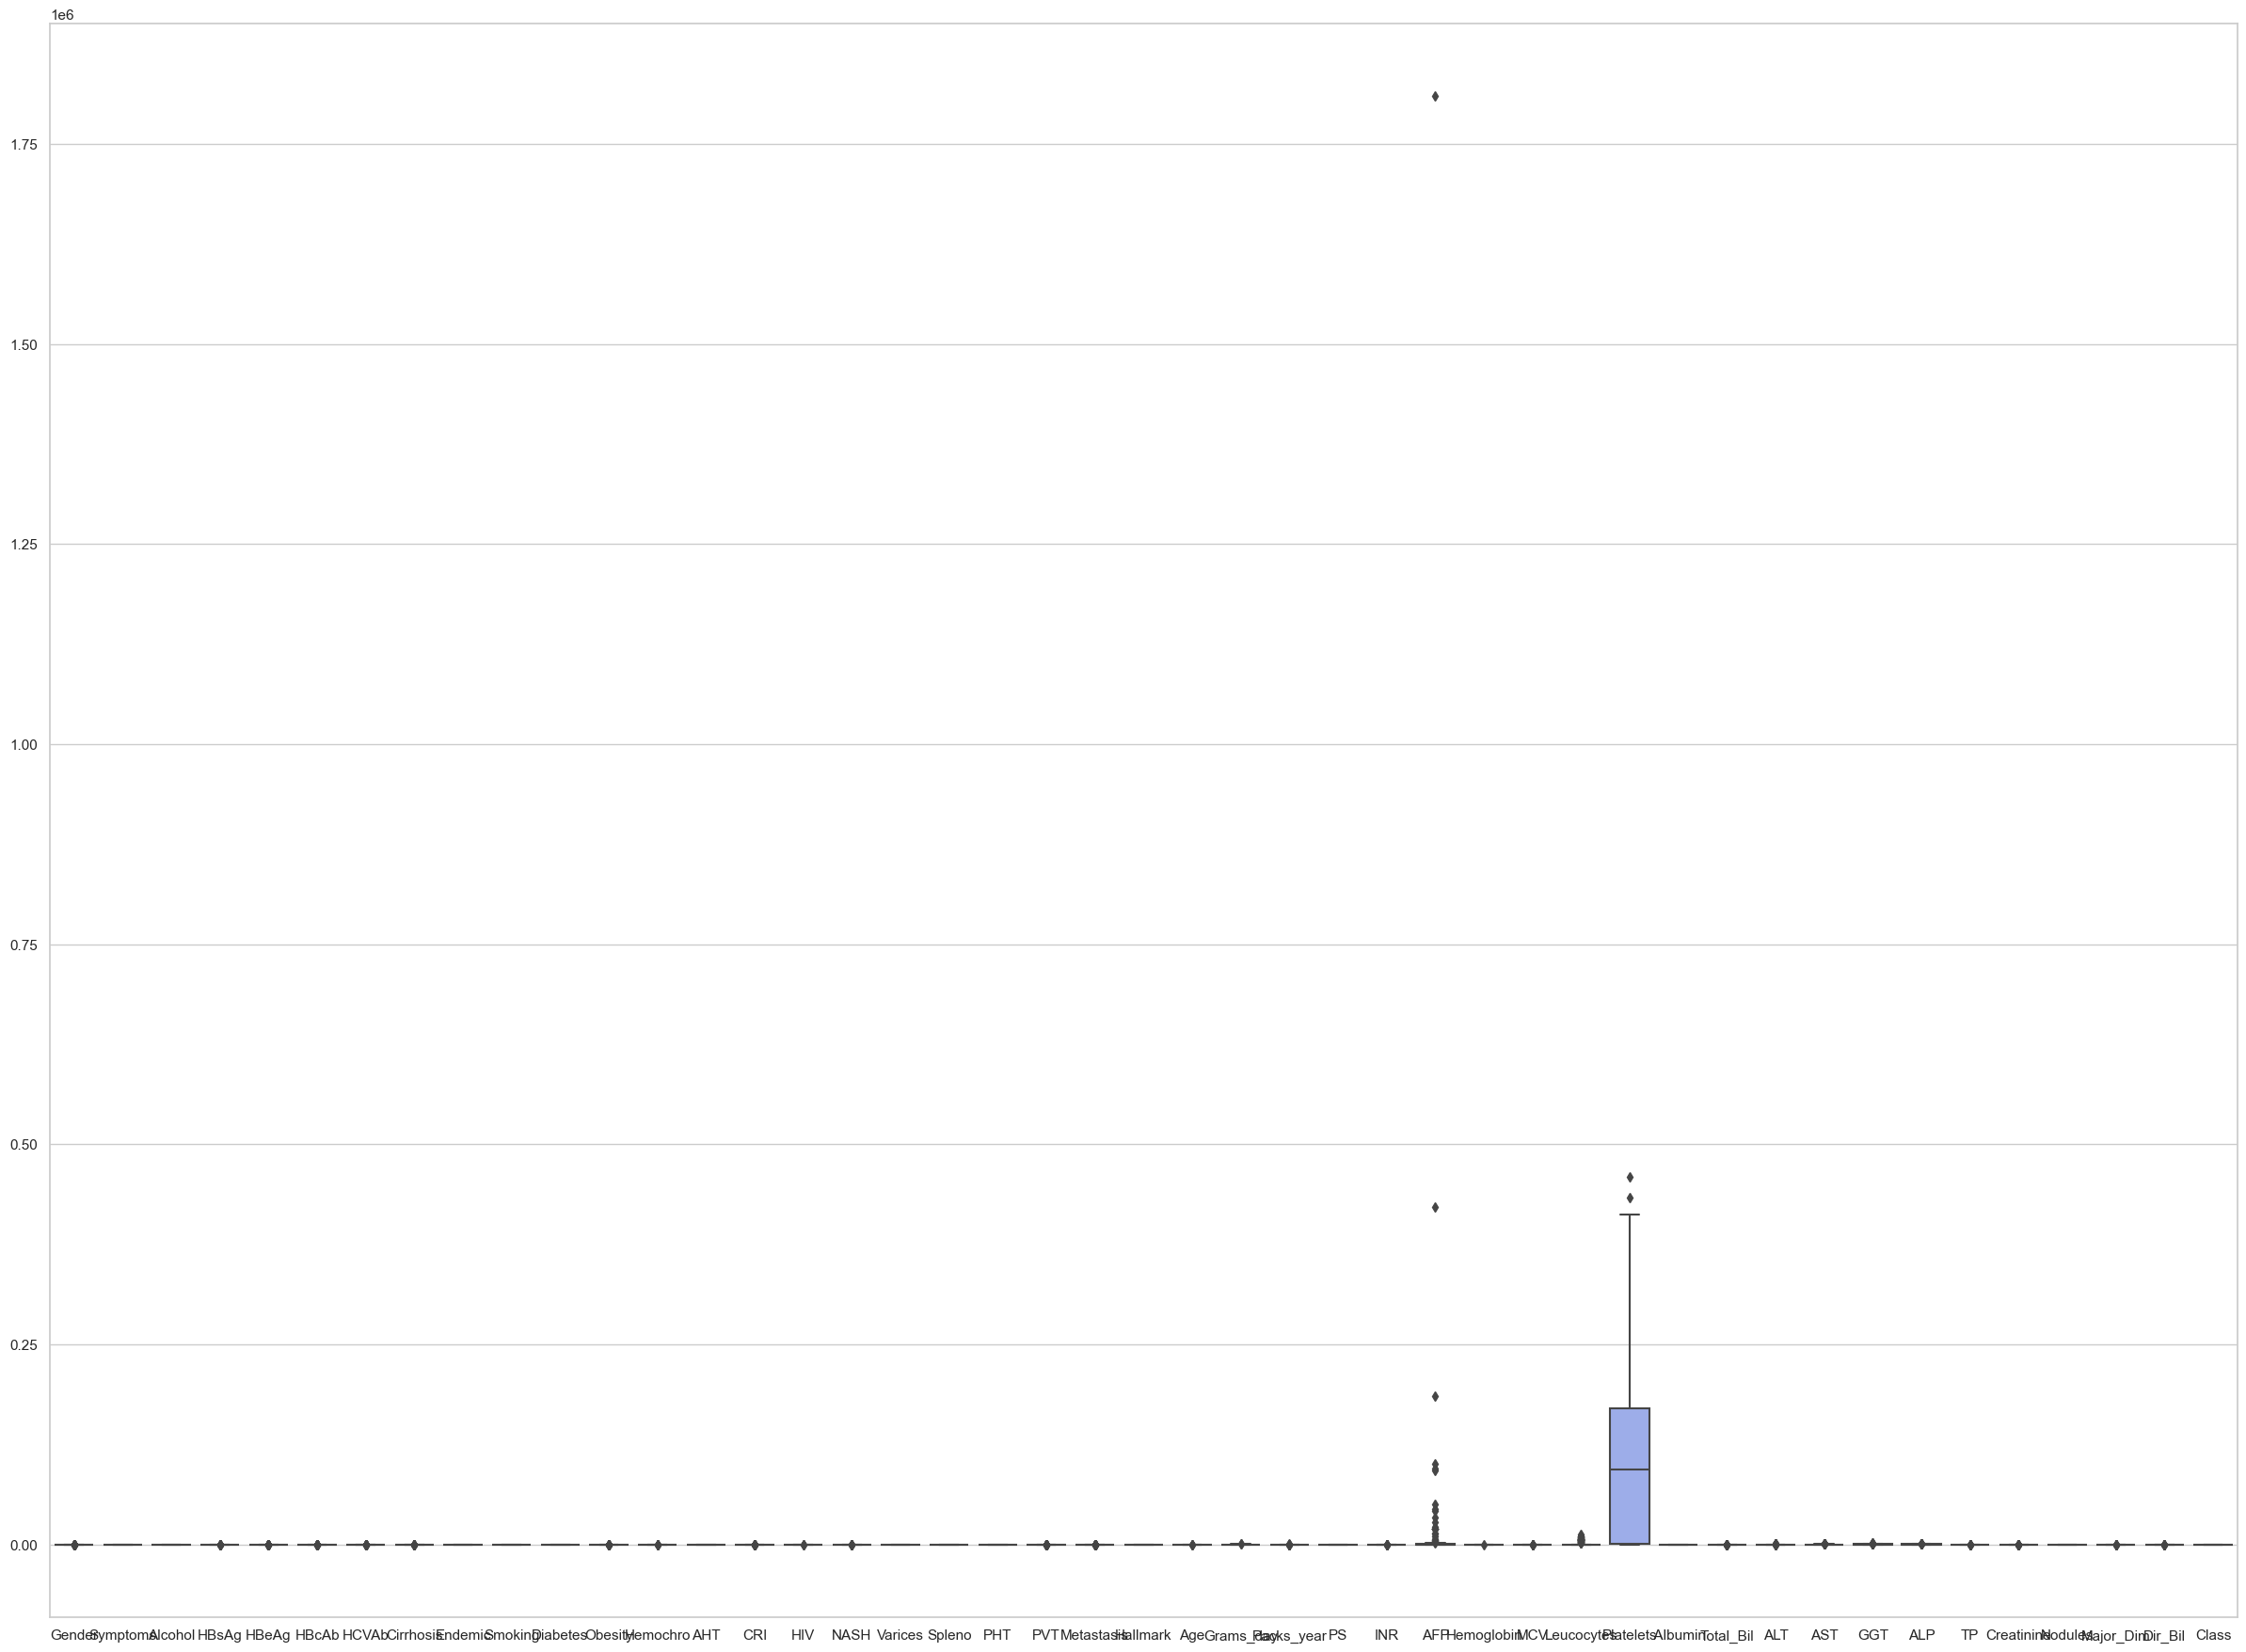

In [96]:
# Histograma para as variáveis
dados.hist(figsize=(50, 40))
plt.show()

# Boxplot para identificar outliers 
plt.figure(figsize=(30, 22))
sns.boxplot(data=dados)
plt.show()

Parece que a variável 'Platelets' pode possuir irregularidades, mas observando:

count       165.000000
mean     113206.442654
std      106134.366901
min           1.710000
25%         270.000000
50%       94000.000000
75%      170000.000000
max      459000.000000
Name: Platelets, dtype: float64


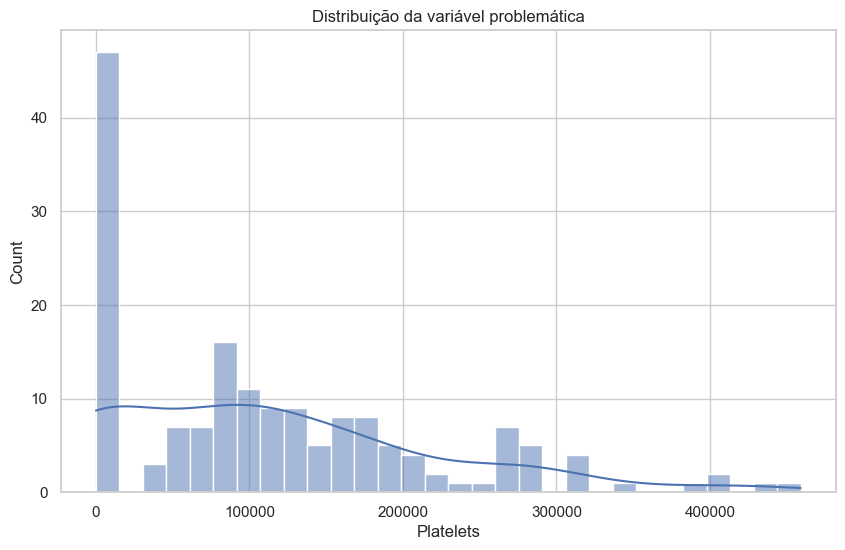

In [97]:
# Exibir estatísticas descritivas da variável problemática
print(dados['Platelets'].describe())

# Plotar um histograma da variável problemática para ver a distribuição
plt.figure(figsize=(10, 6))
sns.histplot(dados['Platelets'], bins=30, kde=True)
plt.title('Distribuição da variável problemática')
plt.show()


Parecem ser valores aceitáveis pois o números de Plaquetas normalmente variam entre 150 000 e 450 000 e ter muito a menos pode insinuar anomalias no corpo, devido à doença que possuem.

Correlacionando todos os valores, que era uma das coisas que não conseguiamos fazer na Exploração dos Dados mas que neste momento já é possível, pois já codificamos e transformamos todas as variáveis, podemos verificar:

#### Correlação de variáveis

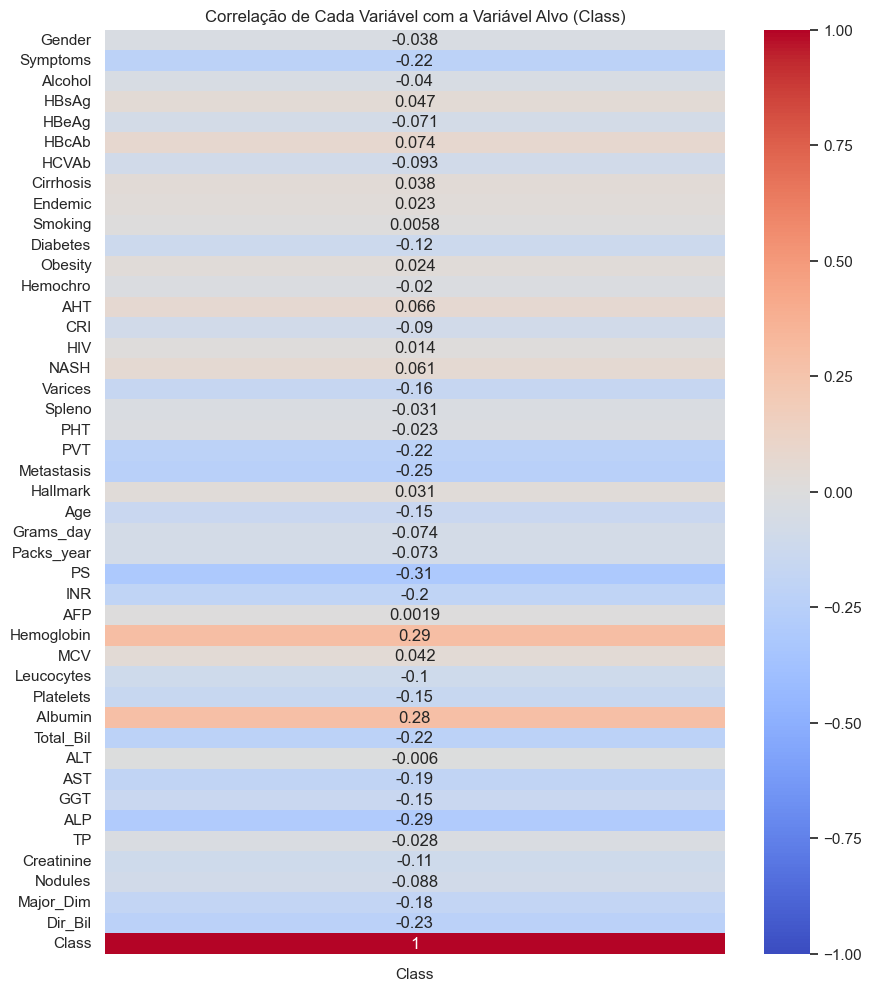

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que 'dados' é o DataFrame e 'Class' é a variável alvo
correlation_matrix = dados.corr()

# Selecionando apenas a coluna 'Class'
target_correlation = correlation_matrix[['Class']]

# Redefinindo o tamanho da figura
plt.figure(figsize=(10, 12))

# Criando o heatmap para a correlação com a variável alvo
sns.heatmap(target_correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=True)

# Adicionando título
plt.title('Correlação de Cada Variável com a Variável Alvo (Class)')

# Exibindo o gráfico
plt.show()


E também a relação da presença ou ausência de cada "sintoma" com a chance de sobreviver.

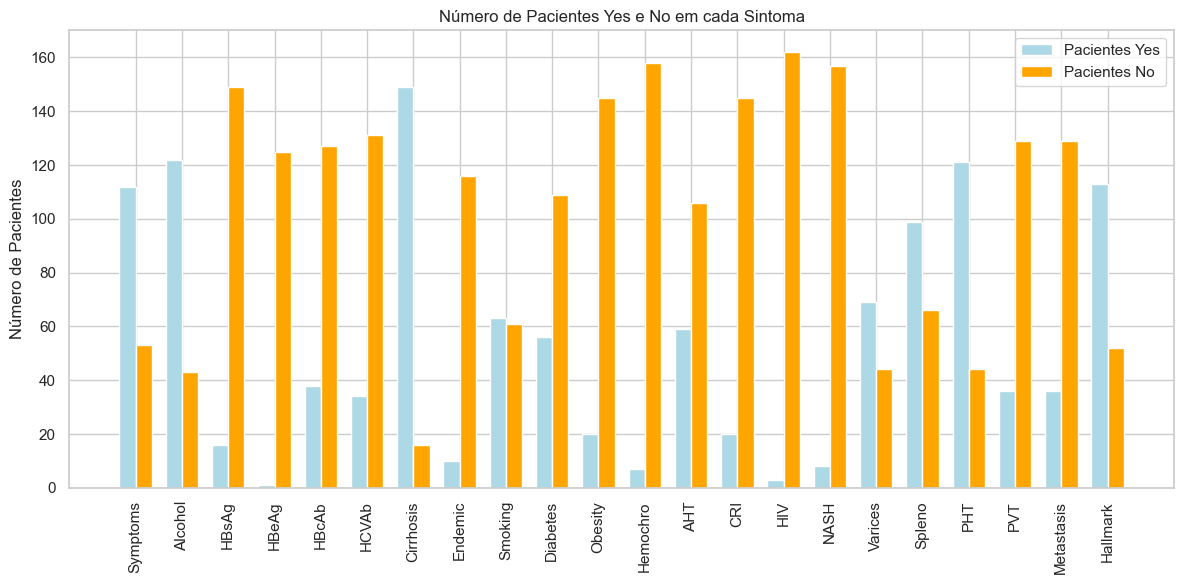

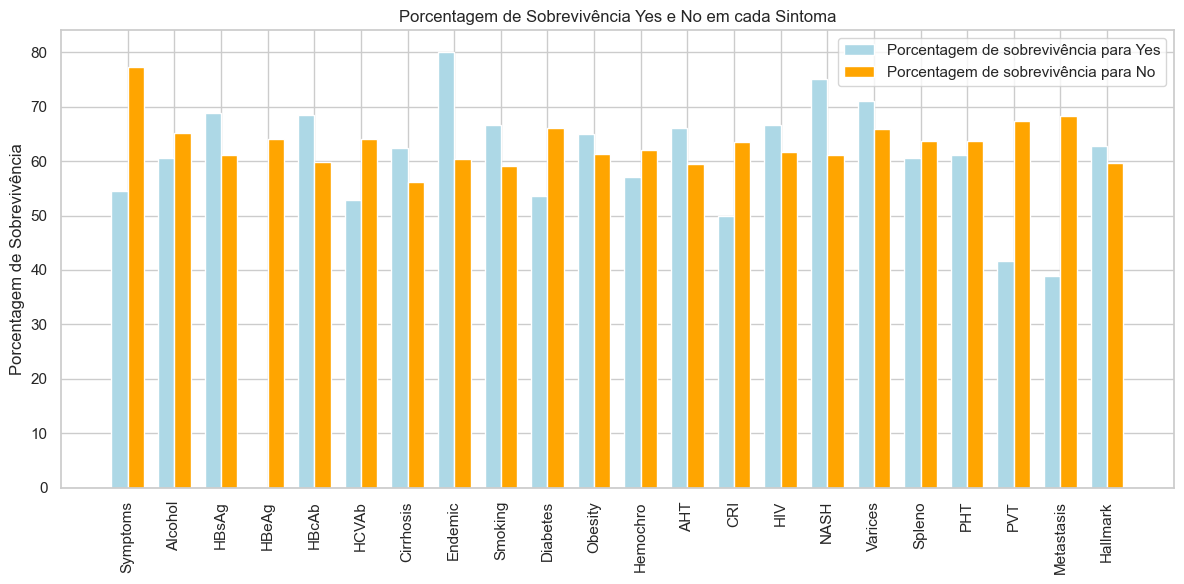

In [99]:
# Encontrar o intervalo de colunas entre 'Symptoms' e 'Hallmark'
start_col = 'Symptoms'
end_col = 'Hallmark'
colunas_categoricas = dados.loc[:, start_col:end_col].columns

# Preparar dados para visualização
sintomas = []
pacientes_yes = []
pacientes_no = []

for coluna in colunas_categoricas:
    # Calcular o número total de pacientes para 'Yes' e 'No'
    count_yes = dados[dados[coluna] == 1].shape[0]
    count_no = dados[dados[coluna] == 0].shape[0]

    sintomas.append(coluna)
    pacientes_yes.append(count_yes)
    pacientes_no.append(count_no)

# Preparar gráfico
fig, ax = plt.subplots(figsize=(12, 6))

# Definir cores das barras
color_yes = 'lightblue'
color_no = 'orange'

# Gráfico de barras para número de pacientes 'Yes' e 'No' em cada sintoma
x = np.arange(len(sintomas))
bar_width = 0.35

ax.bar(x - bar_width/2, pacientes_yes, bar_width, label='Pacientes Yes', color=color_yes)
ax.bar(x + bar_width/2, pacientes_no, bar_width, label='Pacientes No', color=color_no)
ax.set_xticks(x)
ax.set_xticklabels(sintomas, rotation=90)
ax.set_ylabel('Número de Pacientes')
ax.set_title('Número de Pacientes Yes e No em cada Sintoma')
ax.legend()

plt.tight_layout()
plt.show()


###################################################################################################


# Encontrar o intervalo de colunas entre 'Symptoms' e 'Hallmark'
start_col = 'Symptoms'
end_col = 'Hallmark'
colunas_categoricas = dados.loc[:, start_col:end_col].columns

# Preparar dados para visualização
sintomas = []
sobrevivencia_yes = []
sobrevivencia_no = []

for coluna in colunas_categoricas:
    # Calcular porcentagem de sobrevivência para pacientes com o valor 'Yes'
    yes_group = dados[(dados[coluna] == 1) & (dados[coluna].notna()) & (dados['Class'].notna())]
    if yes_group.shape[0] > 0:
        survival_rate_yes = yes_group[yes_group['Class'] == 1].shape[0] / yes_group.shape[0] * 100
    else:
        survival_rate_yes = 0
    
    # Calcular porcentagem de sobrevivência para pacientes com o valor 'No'
    no_group = dados[(dados[coluna] == 0) & (dados[coluna].notna()) & (dados['Class'].notna())]
    if no_group.shape[0] > 0:
        survival_rate_no = no_group[no_group['Class'] == 1].shape[0] / no_group.shape[0] * 100
    else:
        survival_rate_no = 0

    sintomas.append(coluna)
    sobrevivencia_yes.append(survival_rate_yes)
    sobrevivencia_no.append(survival_rate_no)

# Preparar gráfico
fig, ax = plt.subplots(figsize=(12, 6))

# Gráfico de barras para porcentagem de sobrevivência 'Yes' e 'No' em cada sintoma
x = np.arange(len(sintomas))
width = 0.35

ax.bar(x - width/2, sobrevivencia_yes, width, label='Porcentagem de sobrevivência para Yes', color='lightblue')
ax.bar(x + width/2, sobrevivencia_no, width, label='Porcentagem de sobrevivência para No', color='orange')
ax.set_xticks(x)
ax.set_xticklabels(sintomas, rotation=90)
ax.set_ylabel('Porcentagem de Sobrevivência')
ax.set_title('Porcentagem de Sobrevivência Yes e No em cada Sintoma')
ax.legend()

plt.tight_layout()
plt.show()

10. Com estes dois últimos gráficos, o de [[ correlação ]](#Correlação-de-variáveis) e também este último, podemos concluir que seria de uma certa forma interessante atribuir importâncias às variáveis, visto que estas não aparentam ter uma proporção e um peso uniforme em relação à sobrevivência ou morte dos pacientes, para que, desta forma, na modelagem, tenhamos uma melhor distribuição dos resultados, melhorando a precisão.

Contudo fazê-lo manualmente seria muito exaustivo devido a termos um dataset com 50 variáveis, então iremos adotar um método de Machine Learning, RandomForest, que irá nos ditar a importância de cada variável, analisando as que são mais influentes na previsão do resultado.

O algoritmo RandomForest determina a importância das características (ou variáveis) com base em quão bem elas melhoram a pureza dos nós nas árvores de decisão. Aqui estão os passos básicos:

1- Construção das árvores de decisão: O RandomForest constrói várias árvores de decisão. Cada árvore é construída usando um subconjunto aleatório dos dados de treinamento e um subconjunto aleatório das características.

2- Divisão dos nós: Em cada nó de uma árvore, o algoritmo escolhe a característica e o ponto de divisão que maximizam a melhoria na pureza do nó. A pureza é geralmente medida usando o índice Gini ou a entropia.

3- Cálculo da importância das características: A importância de uma característica é calculada como a soma total das melhorias na pureza que essa característica proporciona em todas as árvores. Isso é ponderado pelo número de amostras que são classificadas por cada nó.

Portanto, se uma característica frequentemente resulta em nós que são muito puros, ela será considerada importante. Se uma característica raramente é usada, ou quando é usada, os nós resultantes não são muito puros, então ela será considerada menos importante.

{'Gender': 0.01167486276975098, 'Symptoms': 0.011479594490408989, 'Alcohol': 0.0046142215198862946, 'HBsAg': 0.0058790550388983474, 'HBeAg': 0.0037988783773122096, 'HBcAb': 0.006437202003546449, 'HCVAb': 0.002456211598395314, 'Cirrhosis': 0.005072886411770797, 'Endemic': 0.007137260038618204, 'Smoking': 0.010003493403476784, 'Diabetes': 0.009533632595238484, 'Obesity': 0.0015038322696859284, 'Hemochro': 0.002022172622674917, 'AHT': 0.008976056187245039, 'CRI': 0.008392867803486496, 'HIV': 0.0007975726335624231, 'NASH': 0.0009858744481226662, 'Varices': 0.014242106151212006, 'Spleno': 0.003977964095155697, 'PHT': 0.005596050145528698, 'PVT': 0.0074704011687945744, 'Metastasis': 0.012131046200535674, 'Hallmark': 0.008492898904193373, 'Age': 0.04225746492223328, 'Grams_day': 0.019779618087735176, 'Packs_year': 0.02482934180918616, 'PS': 0.04635596728160018, 'INR': 0.03960098550653822, 'AFP': 0.06312349394228758, 'Hemoglobin': 0.07031682162684011, 'MCV': 0.031201694986928805, 'Leucocytes':

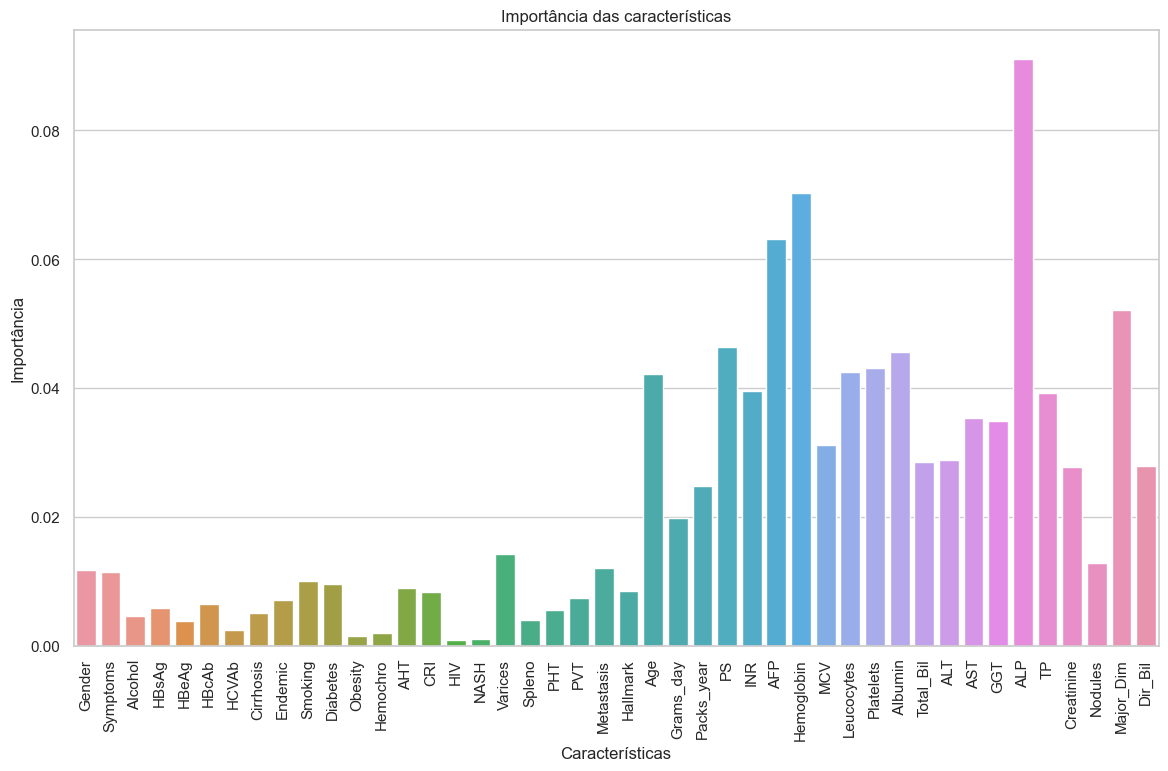

In [100]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Separar as características e a variável alvo
X = dados.drop('Class', axis=1)  # Supondo que 'Class' é a coluna alvo
y = dados['Class']

# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinar o modelo RandomForest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Obter as importâncias das características
importancias = model.feature_importances_

# Exibir as importâncias das características
pesos_automaticos = dict(zip(X.columns, importancias))
print(pesos_automaticos)

# Plotar as importâncias das características
plt.figure(figsize=(14, 8))
sns.barplot(x=list(pesos_automaticos.keys()), y=list(pesos_automaticos.values()))
plt.title('Importância das características')
plt.xlabel('Características')
plt.ylabel('Importância')
plt.xticks(rotation=90)
plt.show()


Em síntese, neste pré-processamento: 
1. Transformamos todos os números definidos com strings ('object') para float; 
2. Tratamos dos valores ausentes com métodos diferentes, respeitando um critério que tem em conta o peso que esses valores poderiam refletir na precisão dos resultados; 
3. Codificamos as strings para uma melhor manipulação dos dados;
4. Analisamos os pesos das nossas variáveis, para uma possível utilização futura.

Esta foi uma das partes mais importantes neste projeto, requerendo muita atenção e trabalho.

## Passo 3: Modelagem de Dados


[[ Voltar ao topo ]](#Índice)

Definimos um limiar para selecionar as variáveis mais importantes e depois adotamos os variados modelos de aprendizagem para chegar da forma mais precisa à solução.

In [101]:
# Definir um limiar para selecionar as variáveis mais importantes
limiar = 0.002
variaveis_selecionadas = [var for var, importancia in pesos_automaticos.items() if importancia > limiar]

print("Variáveis selecionadas:", variaveis_selecionadas)

Variáveis selecionadas: ['Gender', 'Symptoms', 'Alcohol', 'HBsAg', 'HBeAg', 'HBcAb', 'HCVAb', 'Cirrhosis', 'Endemic', 'Smoking', 'Diabetes', 'Hemochro', 'AHT', 'CRI', 'Varices', 'Spleno', 'PHT', 'PVT', 'Metastasis', 'Hallmark', 'Age', 'Grams_day', 'Packs_year', 'PS', 'INR', 'AFP', 'Hemoglobin', 'MCV', 'Leucocytes', 'Platelets', ' Albumin', 'Total_Bil', 'ALT', 'AST', 'GGT', 'ALP', 'TP', 'Creatinine', 'Nodules', 'Major_Dim', 'Dir_Bil']


Ou numa segunda opção, definimos pesos para as variáveis de acordo com o gráfico que temos acima, para analisar as diferenças de precisão.

In [102]:
# Definir um limiar para selecionar as variáveis mais importantes
limiar1 = 0.02
variaveis_selecionadas1 = [var for var, importancia in pesos_automaticos.items() if importancia > limiar1]
limiar2 = 0.002
variaveis_selecionadas2 = [var for var, importancia in pesos_automaticos.items() if importancia > limiar2 and importancia <= limiar1]
print("Variáveis selecionadas1:", variaveis_selecionadas1)
print("Variáveis selecionadas2:", variaveis_selecionadas2)
variaveis_maisimp = 4*variaveis_selecionadas1
print("Variáveis mais imp:", variaveis_maisimp)
# Unir as duas listas
variaveis_selecionadas = variaveis_maisimp + variaveis_selecionadas2

print("Todas as variáveis:", variaveis_selecionadas)

Variáveis selecionadas1: ['Age', 'Packs_year', 'PS', 'INR', 'AFP', 'Hemoglobin', 'MCV', 'Leucocytes', 'Platelets', ' Albumin', 'Total_Bil', 'ALT', 'AST', 'GGT', 'ALP', 'TP', 'Creatinine', 'Major_Dim', 'Dir_Bil']
Variáveis selecionadas2: ['Gender', 'Symptoms', 'Alcohol', 'HBsAg', 'HBeAg', 'HBcAb', 'HCVAb', 'Cirrhosis', 'Endemic', 'Smoking', 'Diabetes', 'Hemochro', 'AHT', 'CRI', 'Varices', 'Spleno', 'PHT', 'PVT', 'Metastasis', 'Hallmark', 'Grams_day', 'Nodules']
Variáveis mais imp: ['Age', 'Packs_year', 'PS', 'INR', 'AFP', 'Hemoglobin', 'MCV', 'Leucocytes', 'Platelets', ' Albumin', 'Total_Bil', 'ALT', 'AST', 'GGT', 'ALP', 'TP', 'Creatinine', 'Major_Dim', 'Dir_Bil', 'Age', 'Packs_year', 'PS', 'INR', 'AFP', 'Hemoglobin', 'MCV', 'Leucocytes', 'Platelets', ' Albumin', 'Total_Bil', 'ALT', 'AST', 'GGT', 'ALP', 'TP', 'Creatinine', 'Major_Dim', 'Dir_Bil', 'Age', 'Packs_year', 'PS', 'INR', 'AFP', 'Hemoglobin', 'MCV', 'Leucocytes', 'Platelets', ' Albumin', 'Total_Bil', 'ALT', 'AST', 'GGT', 'ALP', 

1. Vamos então implementar o modelo da árvore de decisão e do knn:

Começamos por importar as bibliotecas necessárias.

In [103]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import randint

Criar um conjunto de treino e um de teste:

In [104]:
# create a train/test dataset
SEED = 123
test_size = 0.2  #tamanho do conjunto de teste como 30% do conjunto total

# leave out the name of the car since it may be irrelevant; consider the age?
# Separando as features (X) e a target (y)
X = dados[variaveis_selecionadas]
#.drop('Class', axis=1)  # features
Y = dados['Class']       # target

# create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state = SEED)

Analisar a proporção de cada classe no conjunto de dados.

In [105]:
# test the proportion of each origina class in the datasets
y_train.value_counts() / len(y_train) * 100
y_test.value_counts() / len(y_test) * 100

Class
1    57.575758
0    42.424242
Name: count, dtype: float64

Garantir que a divisão dos dados em conjuntos de treinamento e teste mantenha a mesma proporção de classes  na variável de destino ('Class').

In [106]:
# create datasets mainting the representation of the output labels --> stratify = Yes
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state = SEED, stratify=Y)

Importamos as bibliotecas específicas para estes modelos.

In [107]:
# Decission Tree and K-N classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

>Criar e treinar um modelo knn:

Começamos por definir um método de pesquisa Grid search para determinar quais os melhores parâmetros a usar no nosso modelo de classificação knn.

In [108]:
# Grid Search para KNN
param_grid_knn = {'n_neighbors': range(1, 20)}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=10, scoring='accuracy')
grid_knn.fit(X_train, y_train)
print("Melhores hiperparâmetros para KNN:", grid_knn.best_params_)


Melhores hiperparâmetros para KNN: {'n_neighbors': 11}


O Grid search indica-nos o melhor parâmetro a usar que é '11' e após alguns testes é visível que é verdade, então será este o valor usado para a variável n_neighbors.

O modelo em si:

In [109]:
# create and train a KNN model
knn = KNeighborsClassifier(n_neighbors = 11)
knn.fit(X_train, y_train)   #treina o modelo KNN usando os dados de treinamento
# prediction of the training set
knn_preds_train = knn.predict(X_train)   #usa o modelo treinado para prever os rótulos de classe para os dados de treinamento
# calculate the percentage of cases correctly classified
knn_acc_train = sum(knn_preds_train == y_train)/ len(y_train) #calcula a precisão do modelo nos dados de treinamento
# prediction of the test set
knn_preds_test = knn.predict(X_test) #usa o modelo treinado para prever os rótulos de classe para os dados de teste
# calculate the percentage of cases correctly classified
knn_acc_test = sum(knn_preds_test == y_test)/ len(y_test) #calcula a precisão do modelo nos dados de teste

>Criar e treinar um modelo de Árvore de Decisão:

Fazemos aqui também o método do Grid search para nos indicar a profundidade máxima ideal.

In [110]:
# Grid Search para Decision Tree
param_grid_dt = {'max_depth': range(1, 10), 'min_samples_split': range(2, 10)}
grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid_dt, cv=10, scoring='accuracy')
grid_dt.fit(X_train, y_train)
print("Melhores hiperparâmetros para Decision\ Tree:", grid_dt.best_params_)

Melhores hiperparâmetros para Decision\ Tree: {'max_depth': 4, 'min_samples_split': 2}


Interessante refletir que o Grid search dá-nos uma sugestão aproximada da profundidade máxima, sendo '4' a sua sugestão e depois de fazer vários testes, vimos que dava uma precisão muito baixa. Então...

Outra forma de analisar qual a profundidade máxima a usar no modelo da decisão de árvore, seria a seguinte, tal como ilustrado num exemplo do notebook 'Auto', deixado pelo professor no Moodle.

Após testar, concluimos que este método teve um melhor desempenho e deu-nos uma resposta mais precisa do que o Grid Search, sendo estes os valores que iremos usar na nossa árvore de decisão para uma melhor eficácia do modelo. 

In [111]:
from sklearn.metrics import accuracy_score

# List of values to try for max_leaf_nodes
max_leaf_nodes_values = [2, 3, 4, 5, 10, 20, 50, 100]

# Initialize variables to store the best score and corresponding max_leaf_nodes value
best_score = 0
best_max_leaf_nodes = None

# Iterate over all possible max_leaf_nodes values
for max_leaf_nodes in max_leaf_nodes_values:
    # Train the Decision Tree model
    dt = DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes, criterion="entropy", random_state=0)
    dt.fit(X_train, y_train)
    
    # Make predictions on the test set
    dt_preds_test = dt.predict(X_test)
    
    # Calculate the accuracy of the model on the test set
    dt_acc_test = accuracy_score(y_test, dt_preds_test)
    
    # If the current model's accuracy is better than the best seen so far, update best_score and best_max_leaf_nodes
    if dt_acc_test > best_score:
        best_score = dt_acc_test
        best_max_leaf_nodes = max_leaf_nodes

print(f"Best max_leaf_nodes: {best_max_leaf_nodes}")
print(f"Best score: {best_score}")

Best max_leaf_nodes: 50
Best score: 0.8181818181818182


O modelo em si:

In [112]:
# create and train a Decision Tree model
# maximum depth of the tree is 4
dt = DecisionTreeClassifier(max_leaf_nodes = 50, criterion="entropy", random_state=0)
dt.fit(X_train, y_train)   #treina o modelo de árvore de decisão
# prediction o the training set
dt_preds_train = dt.predict(X_train)
# calculate the percentage of cases correctly classified
dt_acc_train = sum(dt_preds_train == y_train)/ len(y_train)
# prediction of the test set
dt_preds_test = dt.predict(X_test)
# calculate the percentage of cases correctly classified
dt_acc_test = sum(dt_preds_test == y_test)/ len(y_test)

O critério usado "entropy", significa que o algoritmo usa a entropia como métrica para medir a desordem ou a impureza de um nó1. A entropia é uma métrica que vem da teoria da informação e é usada para quantificar a incerteza ou a impureza em um conjunto de exemplos.

A entropia é mínima (0) quando todos os exemplos pertencem a uma única classe, o que significa que o nó é perfeitamente puro. A entropia é máxima (1) quando os exemplos estão igualmente divididos entre as classes, o que significa que o nó é o mais impuro possível.

Analisando os resultados.

In [113]:
print ("Decision Tree Train Accuracy: %.3f" % dt_acc_train)
print ("Decision Tree Test Accuracy: %.3f" % dt_acc_test)
print ("KNN Train Accuracy: %.3f" % knn_acc_train)
print ("KNN Test Accuracy: %.3f" % knn_acc_test)

Decision Tree Train Accuracy: 1.000
Decision Tree Test Accuracy: 0.818
KNN Train Accuracy: 0.720
KNN Test Accuracy: 0.727


>Implementando mais dois métodos para analisar a sua precisão, o do RandomForest e do GradientBoosting.

In [114]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

rf = RandomForestClassifier(random_state=0)
gb = GradientBoostingClassifier(random_state=0)

rf.fit(X_train, y_train)
gb.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_pred_gb = gb.predict(X_test)

print("Random Forest Test Accuracy:", rf.score(X_test, y_test))
print("Gradient Boosting Test Accuracy:", gb.score(X_test, y_test))

Random Forest Test Accuracy: 0.6363636363636364
Gradient Boosting Test Accuracy: 0.696969696969697


Desta forma, terminamos a nossa terceira etapa, com a execução de diversos modelos de classificação interessantes.

In [115]:
X_test_df = X_test.copy()
X_test_df['Class'] = y_test
X_test_df['DT_Prediction'] = dt_preds_test
X_test_df['KNN_Prediction'] = knn_preds_test
X_test_df['RF_Prediction'] = y_pred_rf
X_test_df['GB_Prediction'] = y_pred_gb

X_test_df.head()

Age  Packs_year  PS   INR      AFP  Hemoglobin         MCV  Leucocytes  \
92   79.0    0.000000   4  1.01    226.0        11.5   95.599998         6.3   
150  36.0    0.000000   0  1.12   3204.0        16.1   92.000000        10.5   
131  55.0   20.477220   1  2.50      7.5        11.3  119.599998        13.1   
90   69.0    0.000000   1  1.41    123.0        10.1   89.500000         2.3   
114  60.0   20.477162   4  1.87  28274.0        10.3   94.699997        11.1   

     Platelets   Albumin  ...  PVT  Metastasis  Hallmark  Grams_day  Nodules  \
92       108.0       4.2  ...    0           0         1       70.0      1.0   
150      182.0       4.3  ...    0           0         0        0.0      1.0   
131   135000.0       3.2  ...    0           0         1      100.0      5.0   
90     89000.0       4.0  ...    0           1         0      100.0      3.0   
114   109000.0       2.4  ...    1           0         1      100.0      1.0   

     Class  DT_Prediction  KNN_Prediction  RF_Prediction  GB_Prediction  
92       0              0               0              1              0  
150      1              1               0              1              1  
131      1              1               1              0              1  
90       0              0               1              1              1  
114      0              1               1              1              0  

[5 rows x 103 columns]

## Passo 4: Avaliação de Dados


[[ Voltar ao topo ]](#Índice)

Nesta parte, vamos analisar os nossos resultados das mais variadas formas para que possamos tirar as melhores conclusões.

1. Começamos por importar as bibliotecas necessárias.

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score,
                             recall_score, f1_score, roc_curve, roc_auc_score, auc)

2. Vamos calcular várias métricas para todos os modelos.

In [117]:
# Função para calcular métricas
def calculate_metrics(y_true, y_pred):
    return {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred, average='binary'),
        'recall': recall_score(y_true, y_pred, average='binary'),
        'f1_score': f1_score(y_true, y_pred, average='binary')
    }

# Métricas para Decision Tree
dt_metrics = calculate_metrics(y_test, dt_preds_test)

# Métricas para KNN
knn_metrics = calculate_metrics(y_test, knn_preds_test)

# Métricas para RandomForest
rf_metrics = calculate_metrics(y_test,y_pred_rf)

# Métricas para GradientBoosting
gd_metrics = calculate_metrics(y_test,y_pred_gb)

# Tabela de métricas (Armazenamos em um DataFrame para fácil visualização)
metrics_df = pd.DataFrame([dt_metrics, knn_metrics, rf_metrics, gd_metrics], index=['Decision Tree', 'KNN', 'Rf', 'Gd'])
print(metrics_df)

               accuracy  precision  recall  f1_score
Decision Tree  0.818182   0.850000    0.85  0.850000
KNN            0.727273   0.739130    0.85  0.790698
Rf             0.636364   0.681818    0.75  0.714286
Gd             0.696970   0.727273    0.80  0.761905


É importante definir cada uma destas métricas para percebemos a sua relação e importância para a interpretação dos resultados:
- Acurácia: É a proporção de previsões corretas feitas pelo modelo em relação ao total de previsões. É uma métrica útil quando as classes do conjunto de dados estão bem balanceadas. 
- Precisão: É a proporção de previsões positivas que foram corretamente identificadas. Em outras palavras, é a capacidade do modelo de não rotular como positiva uma amostra que é negativa.
- Recall (ou Sensibilidade): É a proporção de positivos reais que foram corretamente identificados. Em outras palavras, é a capacidade do modelo encontrar todas as amostras positivas.
- F1_score: É a média harmônica entre precisão e recall. É uma métrica útil quando se deseja balancear precisão e recall e é mais útil que a acurácia em situações onde as classes do conjunto de dados estão desbalanceadas.

Porém a precisão e recall serem parecidos, na prática, podem ser fáceis de perceber, como por exemplo, em um problema de deteção de spam (emails indesejados), podemos querer maximizar a precisão (para não classificar erroneamente os emails legítimos como spam), enquanto em um problema de detecção de doenças, podemos querer maximizar o recall (para não perder nenhum paciente doente).


Analisando graficamente para uma melhor visualização:

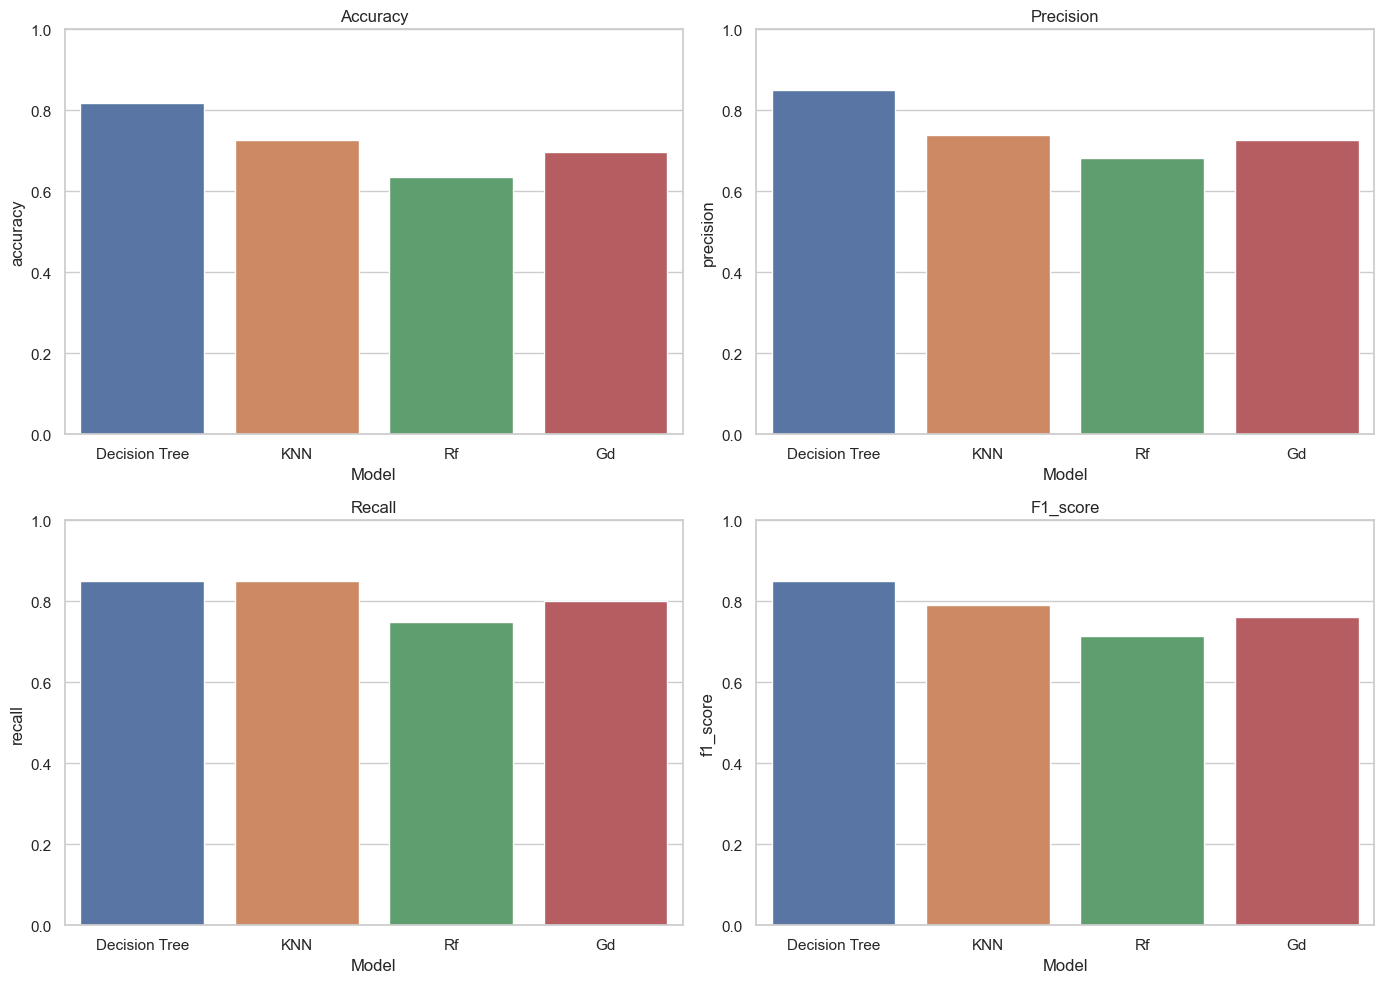

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração do estilo do seaborn
sns.set(style="whitegrid")

# Listas para as métricas e os modelos
metrics = ['accuracy', 'precision', 'recall', 'f1_score']
models = ['Decision Tree', 'KNN', 'Rf', 'GB']

# Criando uma figura com subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Flattening the axes array for easy iteration
axes = axes.flatten()

# Gerando gráficos de barras individuais para cada métrica
for idx, metric in enumerate(metrics):
    sns.barplot(x=metrics_df.index, y=metrics_df[metric], ax=axes[idx])
    axes[idx].set_title(metric.capitalize())
    axes[idx].set_ylim(0, 1)  # Definindo os limites do eixo y para ser de 0 a 1
    axes[idx].set_ylabel(metric)
    axes[idx].set_xlabel('Model')

# Ajustando o layout para que os gráficos não se sobreponham
plt.tight_layout()
plt.show()


Ou de uma forma mais compacta:

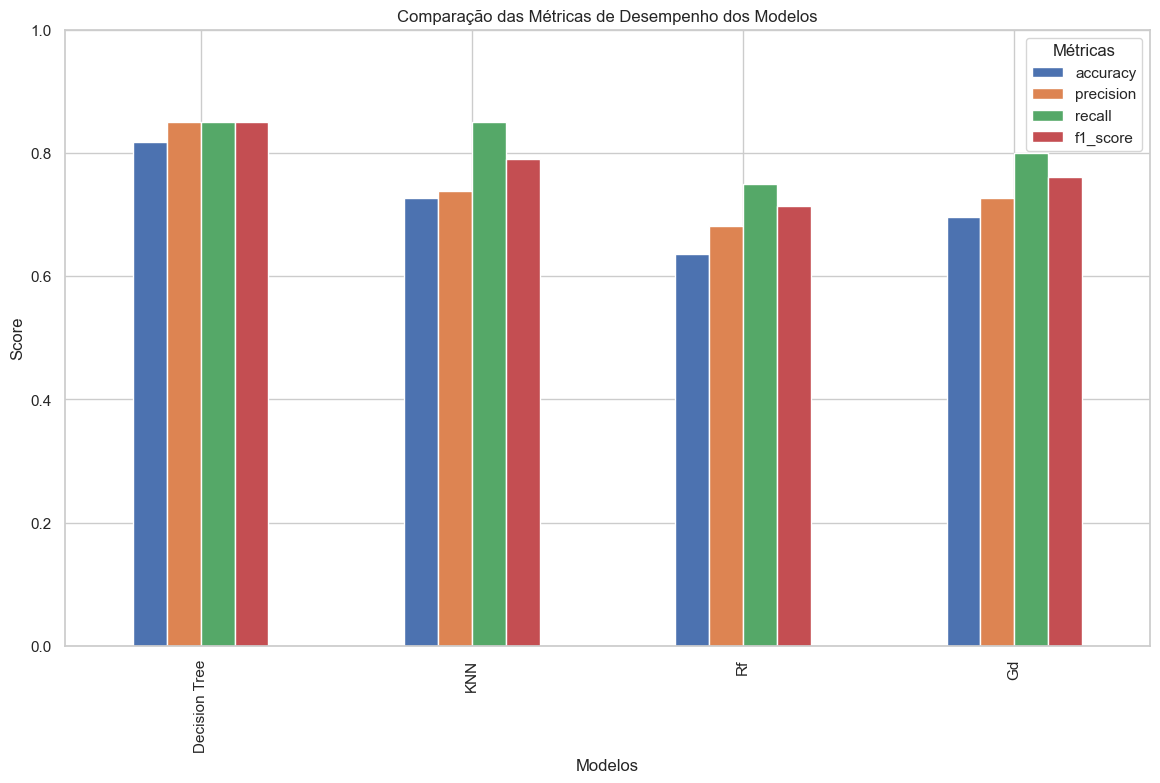

In [119]:
import matplotlib.pyplot as plt

# Criando um gráfico de barras agrupadas
metrics_df.plot(kind='bar', figsize=(14, 8))

# Adicionando título e rótulos aos eixos
plt.title('Comparação das Métricas de Desempenho dos Modelos')
plt.ylabel('Score')
plt.xlabel('Modelos')
plt.ylim(0, 1)  # Definindo os limites do eixo y para ser de 0 a 1

# Exibindo a legenda
plt.legend(title='Métricas')

# Exibindo o gráfico
plt.show()


3. Matriz de confusão.

In [120]:
# Função para plotar matriz de confusão
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    print(cm)

>Para a árvore de decisão:

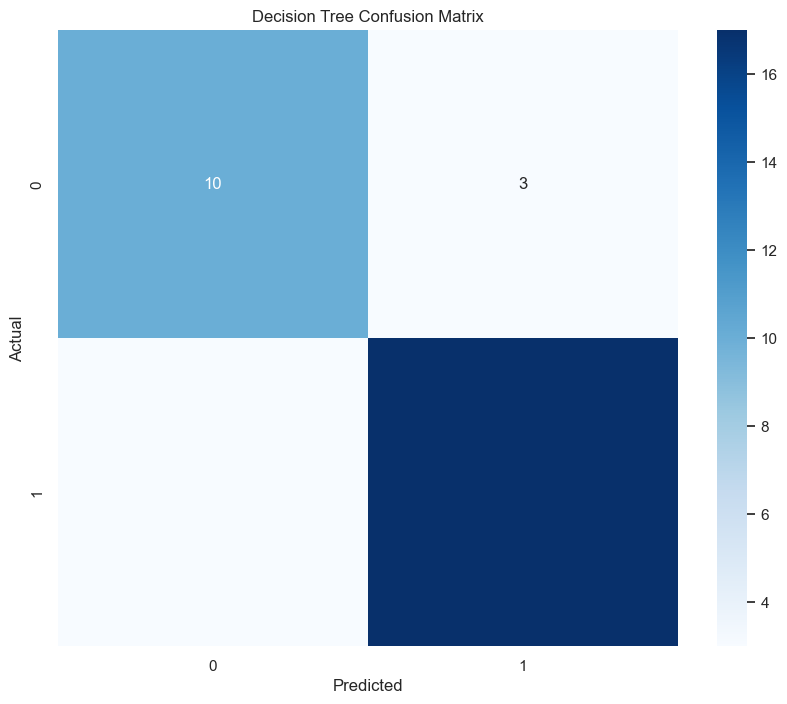

[[10  3]
 [ 3 17]]


In [121]:
# Matriz de Confusão para Decision Tree
plot_confusion_matrix(y_test, dt_preds_test, 'Decision Tree Confusion Matrix')

Estes últimos valores indicam que nestes testes houve:

- 10 verdadeiros negativos (realmente sobreviveram)
- 3 falsos positivos (morriam mas foi previsto que sobreviviam)
- 3 falsos negativos (sobreviviam mas foi previsto que morriam)
- 17 verdadeiros positivos (realmente morriam)

>Para método knn:

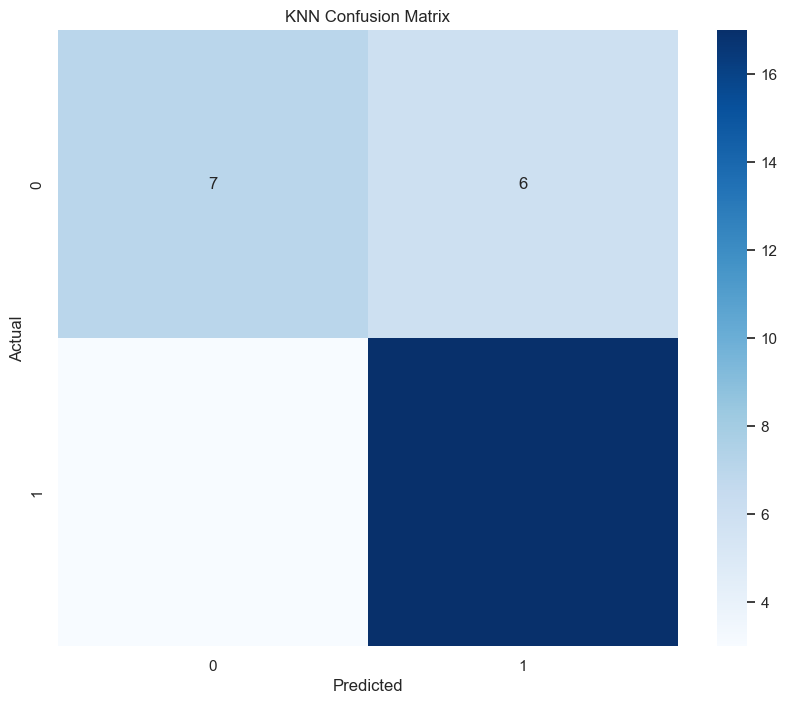

[[ 7  6]
 [ 3 17]]


In [122]:
# Matriz de Confusão para KNN
plot_confusion_matrix(y_test, knn_preds_test, 'KNN Confusion Matrix')

Estes últimos valores indicam que nestes testes houve:

- 7 verdadeiros negativos (realmente sobreviveram)
- 6 falsos positivos (morriam mas foi previsto que sobreviviam)
- 3 falsos negativos (sobreviviam mas foi previsto que morriam)
- 17 verdadeiros positivos (realmente morriam)

>Para método RadomForest:

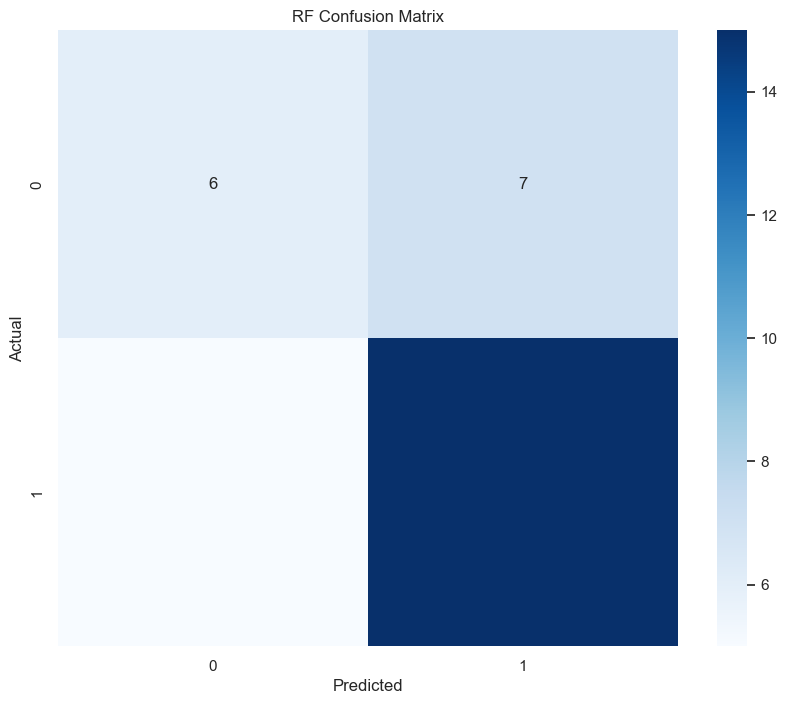

[[ 6  7]
 [ 5 15]]


In [123]:
# Matriz de Confusão para RF
plot_confusion_matrix(y_test, y_pred_rf, 'RF Confusion Matrix')

Estes últimos valores indicam que nestes testes houve:

- 6 verdadeiros negativos (realmente sobreviveram)
- 7 falsos positivos (morriam mas foi previsto que sobreviviam)
- 5 falsos negativos (sobreviviam mas foi previsto que morriam)
- 15 verdadeiros positivos (realmente morriam)

>Para método GradientBoosting:

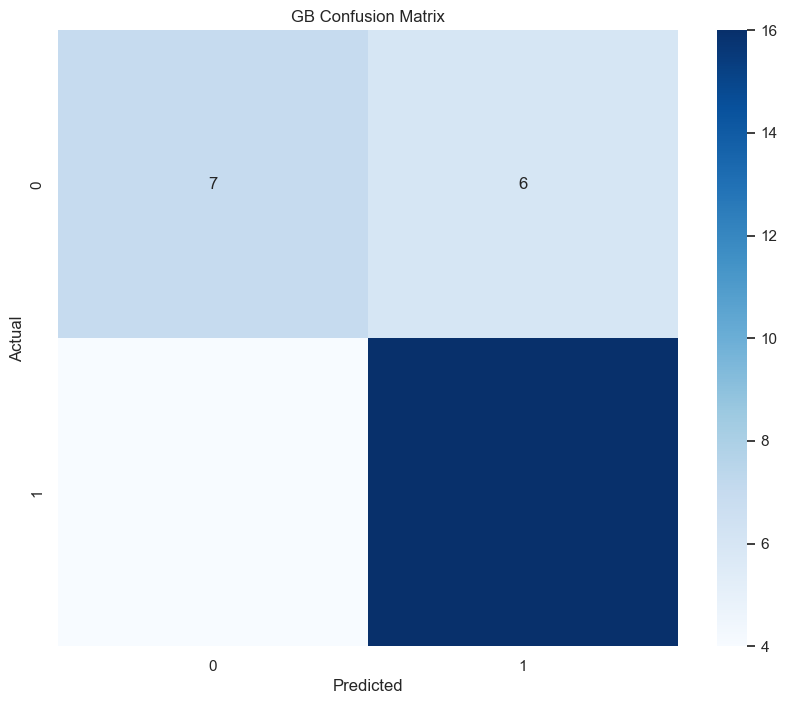

[[ 7  6]
 [ 4 16]]


In [124]:
# Matriz de confusão para GB
plot_confusion_matrix(y_test, y_pred_gb, 'GB Confusion Matrix')

Estes últimos valores indicam que nestes testes houve:

- 7 verdadeiros negativos (realmente sobreviveram)
- 6 falsos positivos (morriam mas foi previsto que sobreviviam)
- 4 falsos negativos (sobreviviam mas foi previsto que morriam)
- 16 verdadeiros positivos (realmente morriam)

4. Curva ROC/AUC:

- A curva ROC é um gráfico que mostra a relação entre a Taxa de Falsos Positivos (False Positive Rate - FPR) no eixo X e a Taxa de Verdadeiros Positivos (True Positive Rate - TPR) no eixo Y para diferentes valores de limiar de classificação.

- A AUC é a área sob a curva ROC. É uma medida da habilidade do modelo de distinguir entre classes positivas e negativas.

Dica: quanto maior o valor da AUC, melhor é o desempenho do modelo em discriminar entre classes positivas e negativas.
- Aspetos a ter em conta durante a análise:

A linha diagonal indica o desempenho de um modelo aleatório. Portanto, qualquer ponto acima dessa linha é considerado um bom resultado.

Uma curva ROC suave e próxima ao canto superior esquerdo sugere um bom desempenho do modelo.

A AUC é uma medida agregada da qualidade do modelo. Um valor de AUC próximo a 1 indica um bom desempenho do modelo, enquanto um valor próximo a 0,5 indica um desempenho aleatório.

In [125]:
# Função para plotar curva ROC
def plot_roc_curve(y_true, y_proba, title):
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

# Probabilidades para curva ROC (exemplo para binary classification)
dt_proba = dt.predict_proba(X_test)[:, 1]
knn_proba = knn.predict_proba(X_test)[:, 1]
rf_proba = rf.predict_proba(X_test)[:, 1]
gb_proba = gb.predict_proba(X_test)[:, 1]

Em relação à árvore de decisão:

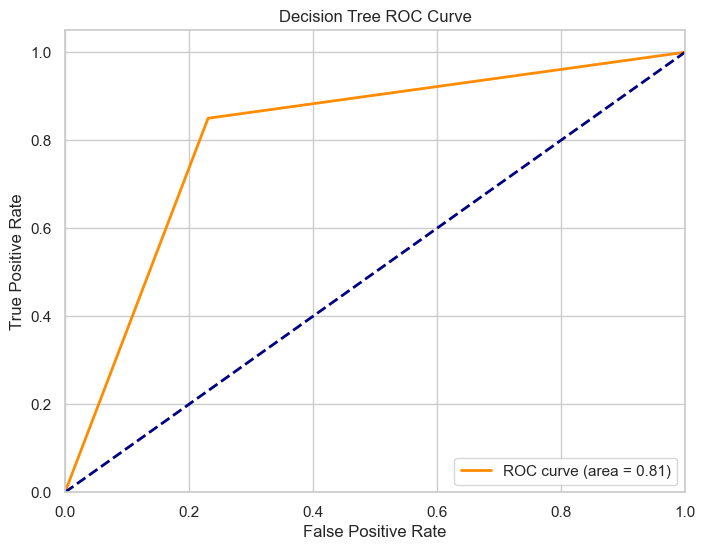

In [126]:
# Curva ROC para Decision Tree
plot_roc_curve(y_test, dt_proba, 'Decision Tree ROC Curve')

Em relação ao método knn:

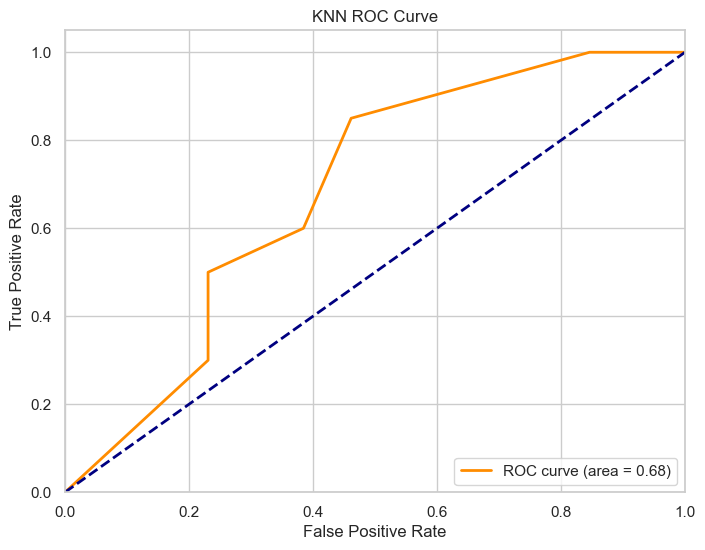

In [127]:
# Curva ROC para KNN
plot_roc_curve(y_test, knn_proba, 'KNN ROC Curve')

Em relação ao RandomForest:

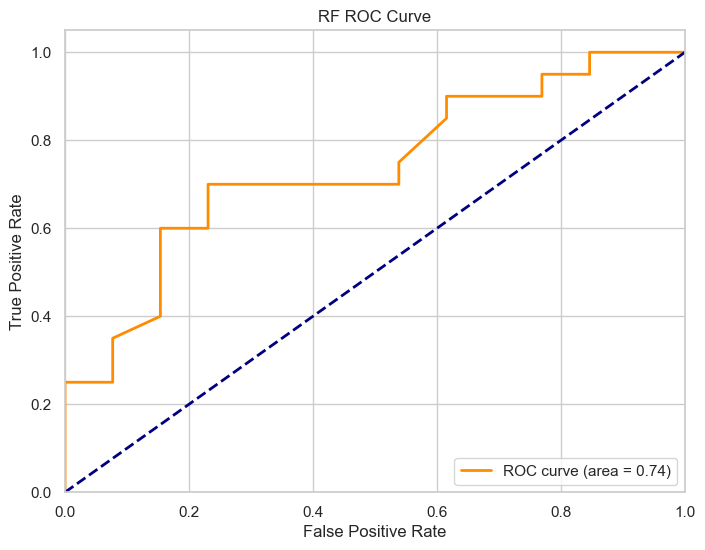

In [128]:
# Curva ROC para RF
plot_roc_curve(y_test, rf_proba, 'RF ROC Curve')

Em relação ao GradientBoosting:

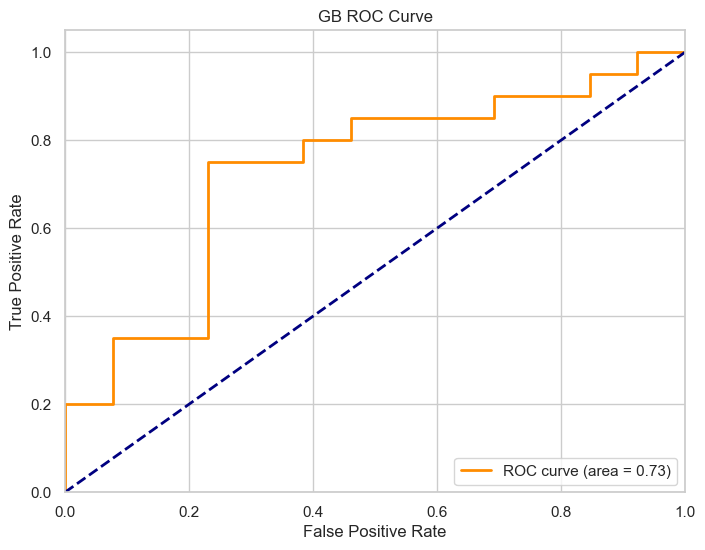

In [129]:
# Curva ROC para GB
plot_roc_curve(y_test, gb_proba, 'GB ROC Curve')

De acordo com as dicas dadas de como interpretar este tipo de gráficos presentes no ínicio deste tópico, podemos ver, como já sabiamos que a árvore de decisão possui o melhor desempenho, tendo a sua área, AUC, um valor alto, muito próximo de 1 (0,81). Por outro lado, se formos a comparar os gráficos, este também é o que se aproxima mais do canto superior esquerdo, presumindo assim uma boa performance.

É importante refletir que todos os gráficos apresentam-se acima da linha tracejada, que representa um modelo aleatório, ou seja, estes modelos são considerados, no geral, bons resultados.

## Passo 5: Interpretação de Resultados


[[ Voltar ao topo ]](#Índice)

1. Comportamento dos modelos:


Após a implementação e análise dos vários modelos, podemos tirar várias conclusões.

- Árvore de decisão: Este foi o melhor método, com os índices de sucesso maiores, tendo assim uma acurácia de 82% e precisão de 85%. Usamos dois algoritmos para calcular a melhor profundidade, um dado num exemplo do Notebook 'auto' dado pelo professor no moodle, e outro chamado GridSearch (testa todas as combinações possíveis para encontrar. Podemos concluir que o melhor foi o do professor, dando uma sugestão de profundidade máxima de 50, o que trouxe a maior e melhor acurácia do projeto.

O algoritmo começa com o nó raiz, que usa um dos atributos do conjunto de dados para fazer uma decisão.
Seguidamente, o conjunto de dados é dividido em subconjuntos. Cada subconjunto então passa por um novo nó de decisão, onde outro atributo é usado para tomar uma decisão e dividir o subconjunto ainda mais. Este processo é repetido até que os nós folha sejam alcançados, no qual vão representar as previsões ou saídas do modelo.
- KNN: Este foi o segundo melhor método obtendo-se uma acurácia de 73%. Tal como a árvore de decisão, este modelo esteve sujeito a um algoritmo de pesquisa Grid search para encontrar o melhor número de vizinhos a usar, dando-nos uma resposta muito agradável, e que corresponde com as expectativas, trazendo uma boa acurácia e uma precisão de 74%.

Este faz uma "pesquisa pelos vizinhos" mais próximos para fazer suas previsões e, para problemas de classificação, atribui ao ponto não classificado a classe que é mais comum entre seus k vizinhos mais próximos.
- RandomForest: Este foi o pior método utilizado, trazendo uma acurácia de apenas 64%. Como este método combina várias árvores de decisão, seria expectável uma boa eficácia contudo, esta discrepância em relação à árvore de decisão pode ser devida à profundidade não ser a mais correta e à possibilidade de as árvores estarem sobreajustadas.
- GradientBoosting: Cria modelos que fazem poucas suposições sobre os dados, árvores de decisão simples, e junta-os num modelo forte de maneira iterativa, trazendo-nos uma acurácia de 70%, sendo o terceiro melhor método usado.


2. Em relação ao pré-processamento:

Testamos inicialmente várias formas que afetaram a precisão dos modelos. No que diz respeito ao valores ausentes, eliminamos os que tinham uma grande percentagem de valores em falta (+45%), substituimos pela média (em variáveis numéricas) e pela moda (em variáveis categóricas) os que os que tinham uma percentagem reduzida (<15%) e entre 15 e 45% usamos um método de imputação avançado, chamado imputação iterativa, no qual, é um processo iterativo que utiliza informações das outras características para estimar os valores ausentes de forma mais precisa. Isto foi eficaz para a precisão dos resultados, visto que testamos várias percentagens e vários métodos, como substituir até aos 45% pela unicamente pela média ou fazer a média dos sobreviventes e substituir no valores que o corresponde, e nos mortos a mesma coisa, mas não trouxe melhorias nenhumas, pelo contrário, piorou a acurácia do modelo.

Também foi feito uma avaliação da importância de cada variável com vários gráficos, e posteriormente foi feito testes analisando como os modelos se comportavam usando todas as variáveis da mesma forma, ou atribuindo um peso a elas de acordo com a sua importância, e podemos concluir que a atribuição destes pesos foi imprescindivel para uma melhor precisão e acurácia.

3. Por outro lado, um dos objetivos do projeto era minimizar os falsos negativos e os falsos positivos, o que foi algo concluído com sucesso pois, por exemplo, na árvore de decisão tivemos 3 casos de falsos positivos e falsos negativos contra 10 e 17 verdadeiros positivos e negativos. Os outros modelos, como também possuem uma acurácia menor, é de esperar que possuem uma maior discrepância nestes valores.

Isto pode ser visível com recuso aos gráficos ROC e área AUC, como já foi analisado acima, no qual as linhas de todos os gráficos estão acima da linha aleatória, refletindo um bom resultado. A nível individual, a árvore de decisão possui uma maior área e mais próxima de 1, e o seu gráfico é o mais próximo ao cantor superior esquerdo em relação aos restantes, sendo a mais precisa.

4. Para análises futuras, com base neste projeto, iremos ter vários aspetos em conta. Por exemplo, começando por fazer uma boa exploração do problema em si e dos dados, para refletir e perceber bem o que é suposto fazer e como fazê-lo, como também, quais os dados que possuimos e como o computador está a lhes tratar.

Outro aspeto, talvez o mais importante é o Pré-processamento. Teremos sempre em consideração fazer um bom Pré-processamento, tratando bem dos dados ausentes, eliminando os desnecessários e avaliando as importâncias das variáveis para que, desta forma, possamos criar um modelo de classificação eficaz e com elevada precisão.


Por fim, será interessante refletir que teremos de possuir vários modelos para analisar as suas diferenças, como também métodos de pesquisa que nos permitam maximizar a acurácia destes modelos.

Não desmerecer também que uma boa reflexão sobre os resultados é importante, tanto para melhorar o projeto e os erros que possam existir, como também para uma melhor interpretação do que foi feito.

## Conclusão


[[ Voltar ao topo ]](#Índice)

Espero que tenha achado este Notebook útil, aprimorado os seus conhecimentos ou aprendido um novo truque através da sua leitura. 

Obrigado :)